<span style="font-size:36px;">Анализ покупательской активности клиентов интернет-магазина «В один клик»</span>

**Описание проекта:**<br>
Интернет-магазин «В один клик» продаёт разные товары.<br>
Отчёт магазина за прошлый период показал, что **активность покупателей начала снижаться**.<br>
Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории.<br>
Возможный выход — **удерживать активность постоянных клиентов**.<br>
Сделать это можно с помощью персонализированных предложений. 

**Цели исследования:**<br>
Разработать модель машинного обучения, которая позволит прогнозировать покупательскую активность клиентов, в том числе ее снижение, в целях разработки рекомендаций, позволяющих персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность, а также в целях управления рисками и принития владельцеми сервиса объективных решений в части развития бизнеса. 

**Этапы (ход) исследования:**<br>
_**Этап 1**_. Изучение основной информации _(загрузка и изучение общей информации, содержащейся в датафреймах - исходниках: знакомство с предметной областью исследования)_;<br>
_**Этап 2**_. Предобработка данных _(выявление и обработка аномальных значений, пропусков данных, явных и неявных дубликатов, корректировка типа данных при необходимости)_;<br>
_**Этап 3**_. Исследовательский анализ данных _(статистический и графический анализ всех показателей)_;<br>
_**Этап 4**_. Объединение датасетов-исходников для последующих корреляционного анализа данных и настройки модели машинного обучения.<br>
_**Этап 5**_. Корреляционный анализ показателей в целях выявления наличия взаимосвязий между ними для последующей обоснованной настройки моделей машинного обучения _(подготовка данных для моделей)_;<br>
_**Этап 6**_. Обучение моделей, выявление лучшей модели и прогноз целевых показателей (статуса покупательской активности клиентов);<br>
_**Этап 7**_. Анализ важности признаков лучшей модели с помощью метода SHAP;<br>
_**Этап 8**_. Дополнительный анализ двух сегментов клиентов с учетом результатов моделирования в целях выработки рекомендаций по сохранению их покупательской активности; <br>
_**Этап 9**_. Оформление **вывода** по результатам исследования и прогнозирования целевых показателей _(резюмирование полученных результатов, формулировка ключевых тезисов и рекомендаций для сервиса)_.

С учетом выделенных этапов работы **план дальнейшего исследования** выглядит вледующим образом:<br>
1) По результатам работы на этапах 1-2: будет сформировано представление о тех данных, которые предоставлены для целей исследования, проанализирована их полнота (достаточность и статистическая значимость), а также получены "очищенные" данные (устранение явных и неявных дубликатов, приведение данных к необходимому для дальнейшей работы типу, выявлены, проанализированы и устранены (при необходимости) аномальные значения, которые могут повлиять на ход исследования);<br>
2) По результатам работы на этапах 3-5: даные будут проанализированы, будут определена специфика каждого показателя (его распределение, процентное соотношения и пр.), а также определены зависимости между данными, - все это необходио для корректной настройки моделей при их обучении (определение значимых для обучения модели показателей);<br>
3) По результатам работы на этапе 6: будут обучены несколько моделей в целях выявления лучшей модели (с учетом преобразований данных для целей прогноза), который дает наиболее оптимальный результат;<br>
4) Далее (этап 7) будет осуществлен анализ важности признаков лучшей модели с помощью метода SHAP в целях определения признаков, имеющих наибольшее влияние на целевой показатель;<br>
5) Далее будет осуществлен дополнительный анализ двух сегментов клиентов с учетом результатов моделирования в целях выработки рекомендаций по сохранению их покупательской активности;<br>
6) Завершающим действием станет подготовка выводов и рекомендаций, отвечающих требованиям заказчика: будут представлены результаты моделирования, а также их интерпритация и применение к анализу сегментов клиентов.

> В целях корректной работы библиотек после обновления matplotlib параллельно были обновлены прочие библиотеки во избежание конфликтов версий.

In [1]:
!pip install numpy==1.22.4 pandas==1.5.1 -q
!pip install -U scipy -q
!pip install matplotlib==3.5 -q
!pip install -U seaborn -q
!pip install -U phik -q
!pip install -U shap -q
!pip install -U scikit-learn -q

In [2]:
# Импорт/установка библиотек и вспомогательных модулей:

import pandas as pd # инструменты работы с табличными данными;
import numpy as np # инструменты работы с многомерными массивами и выполнения математических операций над ними;
import matplotlib.pyplot as plt # инструменты графической визуализации данных;
import seaborn as sns # инструменты графической визуализации данных;
!pip install phik -q
import phik # инструменты построения матрицы корреляций для всех входных признаков в датасете;
!pip install shap -q
import shap # инструменты метода SHAP

from sklearn.model_selection import train_test_split # импорт функции для разделения датасета на выборки
from sklearn.pipeline import Pipeline # загружаем класс pipeline

# Загружаем классы для подготовки данных:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import roc_auc_score # загружаем функцию для работы с метриками
from sklearn.model_selection import RandomizedSearchCV # импортируем класс RandomizedSearchCV
from sklearn.impute import SimpleImputer # загружаем класс для работы с пропусками

# Загружаем нужные модели:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Шаг 1. Загрузка и чтение данных, их первичная предобработка и анализ: 

### Загрузка и чтение датасетов - исходников:

Предметная область исследования представлена **четырьмя датасетами**:
- market_file.csv - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
- market_money.csv - данные о выручке, которую получает магазин с покупателя _(то есть сколько покупатель всего потратил за период взаимодействия с сайтом)_;
- market_time.csv - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода;
- money.csv - данные о среднемесячной прибыли продавца за последние 3 месяца (какую прибыль получает магазин от продаж каждому покупателю).

In [3]:
pd.set_option('display.max_columns', None) # вывод всех столбцов на экран

market_file = pd.read_csv('market_file.csv') # данные о поведении покупателей

display(market_file.head()) # вывод первых 5-ти строк датасета

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_money = pd.read_csv('market_money.csv') # данные о выручке от каждого покупателя

display(market_money.head())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5]:
market_time = pd.read_csv('market_time.csv') # данные о проведенном времени на сайте

display(market_time.head())

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [6]:
money = pd.read_csv('money.csv') # данные о среднемесячной прибыли продавца

display(money.head())

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


**Данные всех датасетов-исходников успешно загружены и прочтены.**

---

### Первичная предобработка и анализ данных:

In [8]:
# Создание функции, возвращающей основную ("стартовую") информацию о датасете:
def data_total_info(df):
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Основная информация о датасете:'))
    display(df.head())
    print()
    df.info()
    print()
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Количество пропущенных значений для каждого столбца:'))
    print(df.isna().sum())
    print()
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Количество явных дубликатов:'), df.duplicated().sum())
    print()
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Гистограммы распредления для всех числовых показателей датасета:'))
    df.hist(figsize=(15, 10));
    return

Основная информация о датасете:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса               

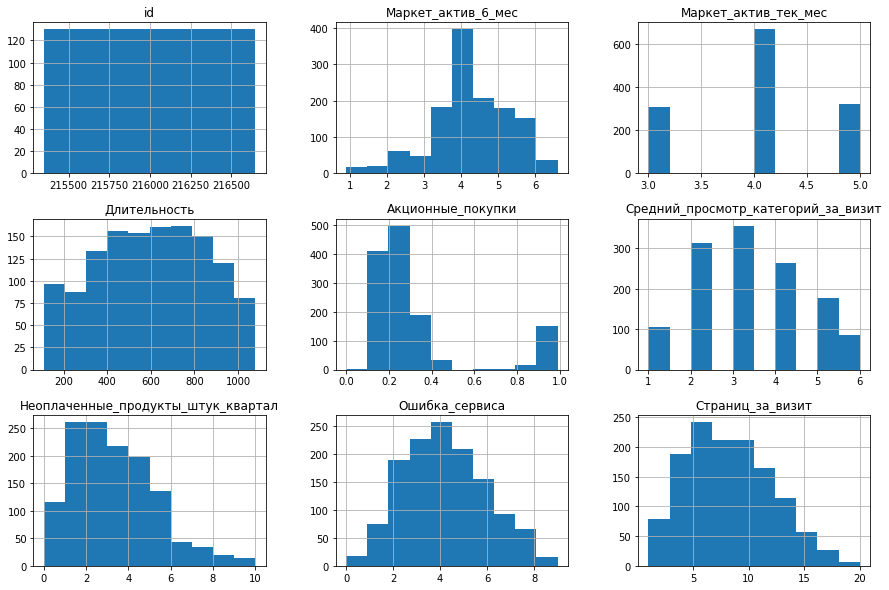

In [9]:
data_total_info(market_file)

**Датасет "market_file"**, содержащий информацию о поведении покупателей, содержит **1 300 записей в разрезе 13 показателей**, что соответсвует описанию датасета.<br>
**Первичный анализ данных выявил**:
- пропуски данных в показателях отсутствуют;
- явные дубликаты не обнарудены;
- типы данных в показателях оцениваются как соответсвующие;
- необходимо дополнительное изучение показателей в целях определения и обработки неявных дубликатов и аномальных значений _(при необходимости)_;
- **целесообразность переименования ряда показателей** в целях их приведения в соответствие с наименованиями прочих столбцов (применен "змеиный регистр"), а также упрощения восприятия.

In [10]:
# Приведение наименования ряда столбцов в соответствие с наименованиями прочих столбцов ("змеиный регистр"
# и упрощение восприятия):
market_file.columns = market_file.columns.str.lower().str.replace(' ', '_')

market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

---

Основная информация о датасете:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB

Количество пропущенных значений для каждого столбца:
id         0
Период     0
Выручка    0
dtype: int64

Количество явных дубликатов: 0

Гистограммы распредления для всех числовых показателей датасета:


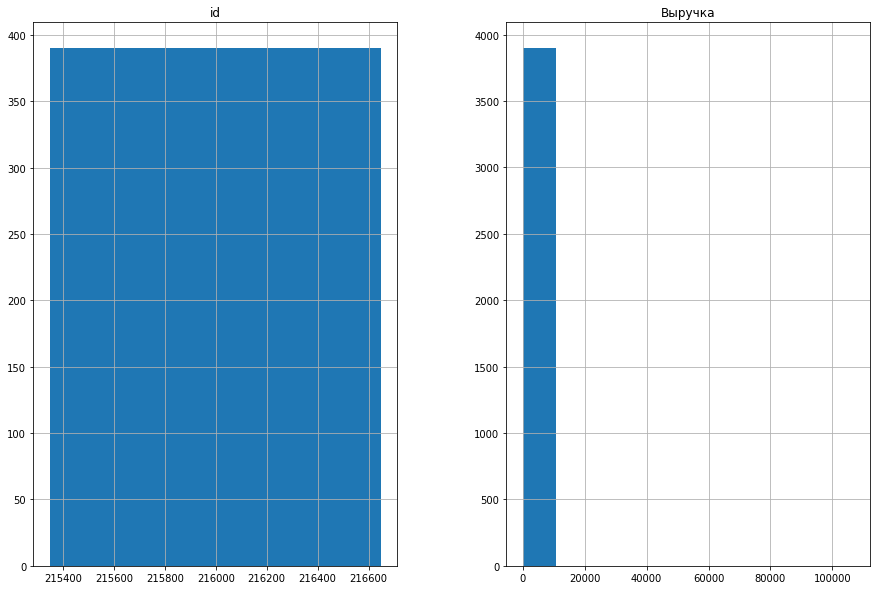

In [11]:
data_total_info(market_money)

**Датасет "market_money"**, содержащий информацию о выручке от каждого покупателя, содержит **3 900 записей в разрезе 3 показателей**, что соответсвует описанию датасета.<br>
**Первичный анализ данных выявил**:
- пропуски данных в показателях отсутствуют;
- явные дубликаты не обнарудены;
- типы данных в показателях оцениваются как соответсвующие;
- необходимо дополнительное изучение показателей в целях определения и обработки неявных дубликатов и аномальных значений _(при необходимости)_;
- **целесообразность переименования ряда показателей** в целях их приведения в соответствие с наименованиями прочих столбцов (применен "змеиный регистр"), а также упрощения восприятия.

In [12]:
# Приведение наименования ряда столбцов в соответствие с наименованиями прочих столбцов ("змеиный регистр"
# и упрощение восприятия):
market_money.columns = market_money.columns.str.lower()

market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


---

Основная информация о датасете:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB

Количество пропущенных значений для каждого столбца:
id        0
Период    0
минут     0
dtype: int64

Количество явных дубликатов: 0

Гистограммы распредления для всех числовых показателей датасета:


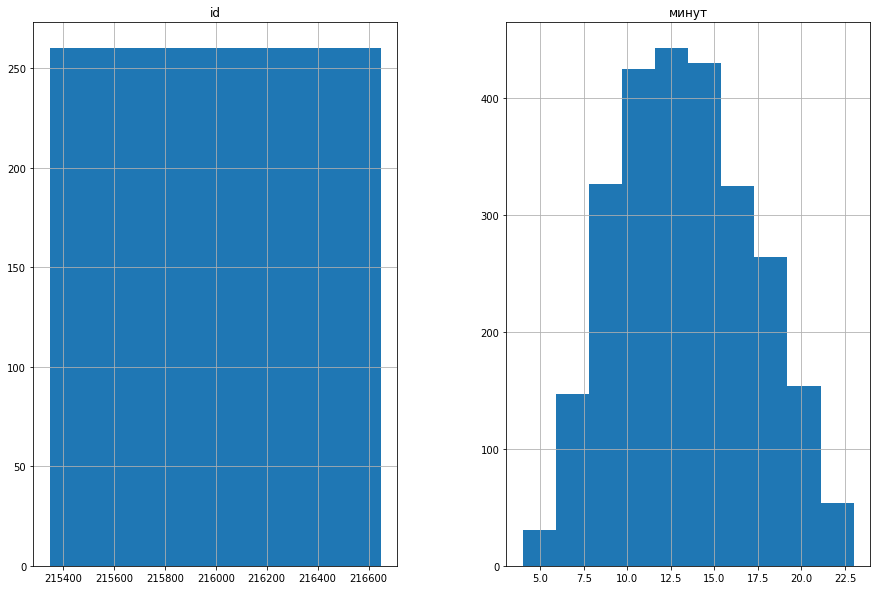

In [13]:
data_total_info(market_time)

**Датасет "market_time"**, содержащий информацию о времени (в минутах), которое покупатель провёл на сайте в течение периода, содержит **2 600 записей в разрезе 3 показателей**, что соответсвует описанию датасета.<br>
**Первичный анализ данных выявил**:
- пропуски данных в показателях отсутствуют;
- явные дубликаты не обнарудены;
- типы данных в показателях оцениваются как соответсвующие;
- необходимо дополнительное изучение показателей в целях определения и обработки неявных дубликатов и аномальных значений _(при необходимости)_;
- **целесообразность переименования ряда показателей** в целях их приведения в соответствие с наименованиями прочих столбцов (применен "змеиный регистр"), а также упрощения восприятия.

In [14]:
# Приведение наименования ряда столбцов в соответствие с наименованиями прочих столбцов ("змеиный регистр"
# и упрощение восприятия):
market_time.columns = market_time.columns.str.lower()

market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


---

Основная информация о датасете:


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB

Количество пропущенных значений для каждого столбца:
id         0
Прибыль    0
dtype: int64

Количество явных дубликатов: 0

Гистограммы распредления для всех числовых показателей датасета:


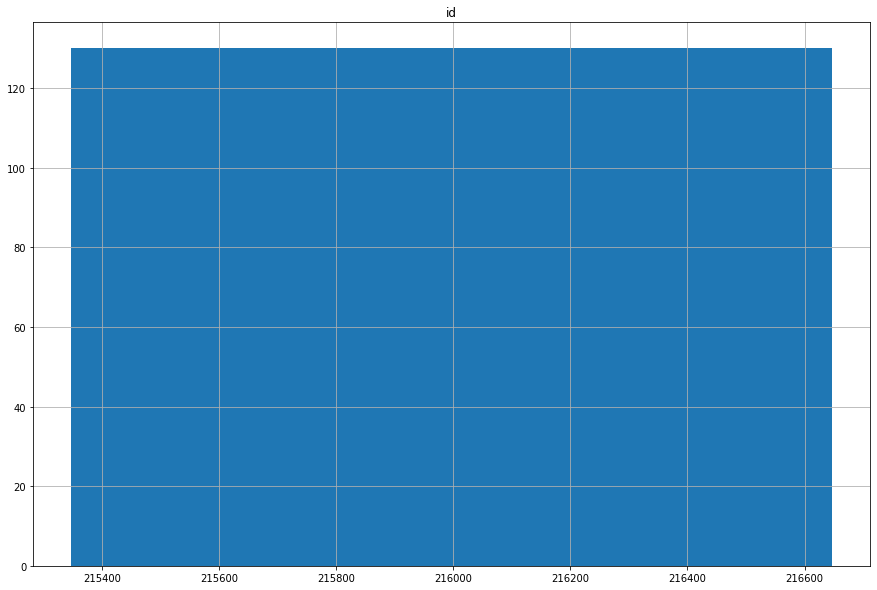

In [15]:
data_total_info(money)

**Датасет "money"**, содержащий информацию о среднемесячной прибыли продавца за последние 3 месяца, содержит **1 300 записей в разрезе 2 показателей**, что соответсвует описанию датасета.<br>
**Первичный анализ данных выявил**:
- пропуски данных в показателях отсутствуют;
- явные дубликаты не обнарудены;
- <span style='color: red;'>тип данных показателя "прибыль" оценивается как не соответсвующий</span> - необходимо изменение типа данных;
- необходимо дополнительное изучение показателей в целях определения и обработки неявных дубликатов и аномальных значений _(при необходимости)_;
- **целесообразность переименования ряда показателей** в целях их приведения в соответствие с наименованиями прочих столбцов (применен "змеиный регистр"), а также упрощения восприятия.

In [16]:
# Приведение наименования ряда столбцов в соответствие с наименованиями прочих столбцов ("змеиный регистр"
# и упрощение восприятия):
money.columns = money.columns.str.lower()

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


### Выводы по результатам загрузки и чтения данных, их первичной предобработки и анализа: 

**По результатам загрузки и чтения данных датасетов-исходников, их первичной предобработки и анализа резюмирую:**<br>
1) Предметная область исследования представлена **четырьмя датасетами**:
- **market_file**.csv - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении: датасет содержит **1 300 записей в разрезе 13 показателей**;
- **market_money**.csv - данные о выручке, которую получает магазин с покупателя _(то есть сколько покупатель всего потратил за период взаимодействия с сайтом)_: датасет содержит **3 900 записей в разрезе 3 показателей**;
- **market_time**.csv - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода: датасет содержит **2 600 записей в разрезе 3 показателей**;
- **money**.csv - данные о среднемесячной прибыли продавца за последние 3 месяца (какую прибыль получает магазин от продаж каждому покупателю): датасет содержит **1 300 записей в разрезе 2 показателей**.

2) Загрузка и чтение датасетов-исходников осуществлена успешна, - к данным датасета "money" применен разделитель значений данных при загрузке.

3) Данные в датасетах оцениваются как **соответсвующие описанию**.

4) **Наименования ряда ряда показателей изменены** в целях их приведения в соответствие с наименованиями прочих столбцов (применен "змеиный регистр"), а также упрощения восприятия.

5) **Пропуски данных в показателях, а также неявные дубликаты, в датасетах отсутствуют**.

6) **Типи данных** в показателях оцениваются как **соответствующие**, при этом <span style='color: red;'>тип данных показателя "прибыль" датасета "money" оценивается как не соответсвующий</span> - необходимо изменение типа данных в указанном показателе.

7) Необходимо дополнительное изучение показателей датасетов в целях определения и обработки неявных дубликатов и аномальных значений _(при необходимости)_.

---

## Шаг 2. Предобработка данных: 

In [17]:
# Создадим функцию для вывода упорядоченного (sorted) списка (list) уникальных значений (set) для выбранного столбца
# и определенного количества элементов списка (n) при необходимости:
def unique_meaning(df,n=None):
    return sorted(list(set(df))[:n])

### Предобработка данных датасета "market_file" - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении: 

#### Оценка значений показателя "id" - номер покупателя в корпоративной базе данных:

In [18]:
market_file['id'].dtype # вывод типа данных для объекта Series

dtype('int64')

In [19]:
unique_meaning(market_file['id'],10) # вывод упорядочного списка первых 10-ти уникальных значений столбца

[215348,
 215349,
 215350,
 215351,
 215352,
 215353,
 215354,
 215355,
 215356,
 215357]

**Оценка значений показателя "id" - номер покупателя в корпоративной базе данных: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "покупательская_активность" - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»:

In [20]:
market_file['покупательская_активность'].dtype

dtype('O')

In [21]:
unique_meaning(market_file['покупательская_активность']) # вывод упорядочного списка уникальных значений столбца

['Прежний уровень', 'Снизилась']

**Оценка значений показателя "покупательская_активность" - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "тип_сервиса" - уровень сервиса, например «премиум» и «стандарт» (зависит от наличия определенной подписки у пользователя):

In [22]:
market_file['тип_сервиса'].dtype

dtype('O')

In [23]:
unique_meaning(market_file['тип_сервиса'])

['премиум', 'стандарт', 'стандартт']

In [24]:
# Исключене неявных дубликатов:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace(['стандартт'], 'стандарт', regex=True)

unique_meaning(market_file['тип_сервиса'])

['премиум', 'стандарт']

**Оценка значений показателя "тип_сервиса" - уровень сервиса, например «премиум» и «стандарт» (зависит от наличия определенной подписки у пользователя): тип данных соответсвует показателю, <span style='color: red;'>выявлен и обработан неявный дубликат: "стандартт" заменен на "стандарт") </span>, аномальные значения не выявлены.**

---

#### Оценка значений показателя "разрешить_сообщать" — информация о том, можно ли присылать покупателю дополнительные предложения о товаре (согласие на это даёт покупатель):

In [25]:
market_file['разрешить_сообщать'].dtype

dtype('O')

In [26]:
unique_meaning(market_file['разрешить_сообщать'])

['да', 'нет']

**Оценка значений показателя "разрешить_сообщать" — информация о том, можно ли присылать покупателю дополнительные предложения о товаре (согласие на это даёт покупатель): тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "маркет_актив_6_мес" — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев (это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента):

In [27]:
market_file['маркет_актив_6_мес'].dtype

dtype('float64')

In [28]:
unique_meaning(market_file['маркет_актив_6_мес'])

[0.9,
 1.4,
 1.5,
 1.7,
 2.4,
 2.6,
 2.7,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.1,
 6.3,
 6.6]

**Оценка значений показателя "маркет_актив_6_мес" — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев (это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента): тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "маркет_актив_тек_мес" — количество маркетинговых коммуникаций в текущем месяце:

In [29]:
market_file['маркет_актив_тек_мес'].dtype

dtype('int64')

In [30]:
unique_meaning(market_file['маркет_актив_тек_мес'])

[3, 4, 5]

**Оценка значений показателя "маркет_актив_тек_мес" — количество маркетинговых коммуникаций в текущем месяце: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "длительность" — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте:

In [31]:
market_file['длительность'].dtype

dtype('int64')

In [32]:
unique_meaning(market_file['длительность'])

[110,
 121,
 125,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 140,
 142,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 157,
 159,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 196,
 199,
 201,
 202,
 203,
 205,
 206,
 207,
 208,
 209,
 211,
 212,
 213,
 215,
 216,
 217,
 219,
 220,
 225,
 226,
 228,
 233,
 234,
 237,
 238,
 242,
 243,
 244,
 245,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 259,
 260,
 261,
 264,
 265,
 267,
 268,
 269,
 271,
 272,
 274,
 275,
 280,
 282,
 283,
 284,
 286,
 290,
 291,
 293,
 296,
 297,
 298,
 300,
 301,
 302,
 304,
 306,
 307,
 308,
 311,
 312,
 316,
 318,
 319,
 320,
 321,
 322,
 324,
 326,
 327,
 330,
 332,
 334,
 335,
 336,
 337,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 355,
 356,
 360,
 362,
 365,
 368,
 370,
 371,
 372,
 373,
 374,
 375,
 377,
 378,
 379,
 380,
 382,
 384,
 387

**Оценка значений показателя "длительность" — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены (с момента регистрации для разных пользователей прошло от 4 месяцев (110 дней) до 3-х лет (1079 дней)).**

---

#### Оценка значений показателя "акционные_покупки" — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев:

In [33]:
market_file['акционные_покупки'].dtype

dtype('float64')

In [34]:
unique_meaning(market_file['акционные_покупки'])

[0.0,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.39,
 0.4,
 0.44,
 0.47,
 0.6,
 0.74,
 0.75,
 0.89,
 0.9,
 0.91,
 0.93,
 0.94,
 0.95,
 0.98,
 0.99]

**Оценка значений показателя "акционные_покупки" — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "популярная_категория" — самая популярная категория товаров у покупателя за последние 6 месяцев:

In [35]:
market_file['популярная_категория'].dtype

dtype('O')

In [36]:
unique_meaning(market_file['популярная_категория'])

['Домашний текстиль',
 'Косметика и аксесуары',
 'Кухонная посуда',
 'Мелкая бытовая техника и электроника',
 'Техника для красоты и здоровья',
 'Товары для детей']

In [37]:
# Устранение орфографической ошибки:
market_file['популярная_категория'] = market_file['популярная_категория'].replace(['Косметика и аксесуары'],
                                                                                  'Косметика и аксессуары', regex=True)

unique_meaning(market_file['популярная_категория'])

['Домашний текстиль',
 'Косметика и аксессуары',
 'Кухонная посуда',
 'Мелкая бытовая техника и электроника',
 'Техника для красоты и здоровья',
 'Товары для детей']

**Оценка значений показателя "популярная_категория" — самая популярная категория товаров у покупателя за последние 6 месяцев: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены, одновременно устранена орфографическая ошибка в написании слова "аксессуары" категории "Косметика и аксессуары".**

---

#### Оценка значений показателя "средний_просмотр_категорий_за_визит" — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца:

In [38]:
market_file['средний_просмотр_категорий_за_визит'].dtype

dtype('int64')

In [39]:
unique_meaning(market_file['средний_просмотр_категорий_за_визит'])

[1, 2, 3, 4, 5, 6]

**Оценка значений показателя "средний_просмотр_категорий_за_визит" — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "неоплаченные_продукты_штук_квартал" — общее число неоплаченных товаров в корзине за последние 3 месяца:

In [40]:
market_file['неоплаченные_продукты_штук_квартал'].dtype

dtype('int64')

In [41]:
unique_meaning(market_file['неоплаченные_продукты_штук_квартал'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Оценка значений показателя "неоплаченные_продукты_штук_квартал" — общее число неоплаченных товаров в корзине за последние 3 месяца: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "ошибка_сервиса" — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца:

In [42]:
market_file['ошибка_сервиса'].dtype

dtype('int64')

In [43]:
unique_meaning(market_file['ошибка_сервиса'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Оценка значений показателя "ошибка_сервиса" — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "страниц_за_визит" — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца:

In [44]:
market_file['страниц_за_визит'].dtype

dtype('int64')

In [45]:
unique_meaning(market_file['страниц_за_визит'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

**Оценка значений показателя "страниц_за_визит" — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

### Результаты предобработки данных датасета "market_file": 

**По результатам предобработки данных датасета "market_file" можно сделать следующие выводы:**
- во всех 13-ти показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- типы данных показателей оцениваются как соответсвующие описываемым данным;
- выявлен и обработан неявный дубликат: значение "стандартт" показателя "тип_сервиса" заменен на "стандарт", во всех остальных случаях - неявные дубликаты и аномальные значения не выявлены.

**Таким образом, данные датасета "market_file" оцениваются как статистически значимые для целей последующего анализа.**

---

### Предобработка данных датасета "market_money" - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом: 

#### Оценка значений показателя "id" — номер покупателя в корпоративной базе данных:

In [46]:
market_money['id'].dtype

dtype('int64')

In [47]:
unique_meaning(market_money['id'],10)

[215348,
 215349,
 215350,
 215351,
 215352,
 215353,
 215354,
 215355,
 215356,
 215357]

**Оценка значений показателя "id" — номер покупателя в корпоративной базе данных: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "период" — название периода, во время которого зафиксирована выручка:

In [48]:
market_money['период'].dtype

dtype('O')

In [49]:
unique_meaning(market_money['период'])

['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

**Оценка значений показателя "период" — название периода, во время которого зафиксирована выручка: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены: данные содержат информацию за три месяца - текущий, предыдущий и препредыдущий.**

---

#### Оценка значений показателя "выручка" — сумма выручки за период в условных единицах:

In [50]:
market_money['выручка'].dtype

dtype('float64')

In [51]:
unique_meaning(market_money['выручка'])

[0.0,
 2758.7,
 2890.0,
 2909.0,
 2952.2,
 2960.0,
 2970.0,
 3061.0,
 3067.0,
 3078.3,
 3083.7,
 3085.4,
 3111.0,
 3130.0,
 3137.0,
 3141.0,
 3143.5,
 3146.0,
 3155.0,
 3188.0,
 3201.0,
 3202.0,
 3222.0,
 3227.0,
 3229.0,
 3232.2,
 3233.0,
 3234.0,
 3237.2,
 3263.0,
 3267.0,
 3287.0,
 3289.2,
 3293.1,
 3299.0,
 3302.2,
 3311.0,
 3313.0,
 3319.0,
 3327.0,
 3328.9,
 3330.0,
 3332.0,
 3334.6,
 3343.9,
 3350.0,
 3358.4,
 3363.6,
 3364.0,
 3372.8,
 3378.0,
 3390.0,
 3394.6,
 3402.6,
 3411.0,
 3412.5,
 3413.0,
 3416.6,
 3428.0,
 3432.0,
 3441.0,
 3454.8,
 3457.9,
 3475.0,
 3479.0,
 3481.4,
 3488.0,
 3495.0,
 3518.0,
 3520.3,
 3526.0,
 3529.0,
 3531.0,
 3543.0,
 3544.8,
 3547.0,
 3548.0,
 3550.4,
 3555.0,
 3555.8,
 3556.0,
 3558.0,
 3560.1,
 3563.0,
 3567.1,
 3568.0,
 3584.0,
 3588.0,
 3593.0,
 3597.0,
 3598.0,
 3615.0,
 3619.0,
 3622.0,
 3623.0,
 3636.0,
 3640.0,
 3642.4,
 3652.0,
 3655.4,
 3659.0,
 3660.6,
 3662.0,
 3664.0,
 3670.0,
 3673.0,
 3673.2,
 3676.0,
 3680.0,
 3688.0,
 3690.6,
 369

**Оценка значений показателя "выручка" — сумма выручки за период в условных единицах: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

### Результаты предобработки данных датасета "market_money": 

**По результатам предобработки данных датасета "market_money" можно сделать следующие выводы:**
- во всех 3-х показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- типы данных показателей оцениваются как соответсвующие описываемым данным;
- неявные дубликаты и аномальные значения не выявлены.

**Таким образом, данные датасета "market_money" оцениваются как статистически значимые для целей последующего анализа.**

---

### Предобработка данных датасета "market_time" - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода: 

#### Оценка значений показателя "id" — номер покупателя в корпоративной базе данных:

In [52]:
market_time['id'].dtype

dtype('int64')

In [53]:
unique_meaning(market_time['id'],10)

[215348,
 215349,
 215350,
 215351,
 215352,
 215353,
 215354,
 215355,
 215356,
 215357]

**Оценка значений показателя "id" — номер покупателя в корпоративной базе данных: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "период" — название периода, во время которого зафиксировано общее время:

In [54]:
market_time['период'].dtype

dtype('O')

In [55]:
unique_meaning(market_time['период'])

['предыдцщий_месяц', 'текущий_месяц']

In [56]:
# Исключене ошибки при написании значений показателя:
market_time['период'] = market_time['период'].replace(['предыдцщий_месяц'], 'предыдущий_месяц', regex=True)

unique_meaning(market_time['период'])

['предыдущий_месяц', 'текущий_месяц']

**Оценка значений показателя "период" — название периода, во время которого зафиксировано общее время: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены, вместе с тем <span style='color: red;'>выявлена и устранена орфографическая ошибка при написании данных: "предыдцщий_месяц" заменен на "предыдущий_месяц") </span>.**

---

#### Оценка значений показателя "минут" — значение времени, проведённого на сайте, в минутах:

In [57]:
market_time['минут'].dtype

dtype('int64')

In [58]:
unique_meaning(market_time['минут'])

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

**Оценка значений показателя "минут" — значение времени, проведённого на сайте, в минутах: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

### Результаты предобработки данных датасета "market_time": 

**По результатам предобработки данных датасета "market_time" можно сделать следующие выводы:**
- во всех 3-х показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- типы данных показателей оцениваются как соответсвующие описываемым данным;
- неявные дубликаты и аномальные значения не выявлены, вместе с тем выявлена и устранены орфографические ошибки при написании данных в показателе "период": "предыдцщий_месяц" заменен на "предыдущий_месяц", а также в написании слова "аксессуары" категории "Косметика и аксессуары" (было "аксесуары") в показателе "популярная_категория". 

**Таким образом, данные датасета "market_time" оцениваются как статистически значимые для целей последующего анализа.**

---

### Предобработка данных датасета "money" - данные о среднемесячной прибыли продавца за последние 3 месяца (какую прибыль получает магазин от продаж каждому покупателю): 

#### Оценка значений показателя "id" — номер покупателя в корпоративной базе данных:

In [59]:
money['id'].dtype

dtype('int64')

In [60]:
unique_meaning(money['id'],10)

[215348,
 215349,
 215350,
 215351,
 215352,
 215353,
 215354,
 215355,
 215356,
 215357]

**Оценка значений показателя "id" — номер покупателя в корпоративной базе данных: тип данных соответсвует показателю, неявные дубликаты и аномальные значения не выявлены.**

---

#### Оценка значений показателя "прибыль" — значение прибыли в условных единицах:

In [61]:
money['прибыль'].dtype

dtype('O')

In [62]:
unique_meaning(money['прибыль'])

['0,86',
 '0,98',
 '1,06',
 '1,08',
 '1,33',
 '1,37',
 '1,38',
 '1,39',
 '1,4',
 '1,48',
 '1,54',
 '1,55',
 '1,57',
 '1,63',
 '1,64',
 '1,68',
 '1,81',
 '1,82',
 '1,83',
 '1,84',
 '1,87',
 '1,92',
 '1,95',
 '1,97',
 '2',
 '2,02',
 '2,03',
 '2,07',
 '2,08',
 '2,09',
 '2,1',
 '2,11',
 '2,13',
 '2,15',
 '2,16',
 '2,18',
 '2,19',
 '2,21',
 '2,23',
 '2,24',
 '2,26',
 '2,27',
 '2,29',
 '2,32',
 '2,33',
 '2,34',
 '2,35',
 '2,36',
 '2,37',
 '2,38',
 '2,39',
 '2,41',
 '2,42',
 '2,43',
 '2,44',
 '2,45',
 '2,46',
 '2,47',
 '2,48',
 '2,49',
 '2,5',
 '2,51',
 '2,53',
 '2,54',
 '2,55',
 '2,57',
 '2,59',
 '2,6',
 '2,61',
 '2,63',
 '2,64',
 '2,66',
 '2,67',
 '2,68',
 '2,69',
 '2,7',
 '2,71',
 '2,72',
 '2,73',
 '2,74',
 '2,75',
 '2,76',
 '2,77',
 '2,78',
 '2,79',
 '2,8',
 '2,81',
 '2,82',
 '2,83',
 '2,84',
 '2,85',
 '2,86',
 '2,87',
 '2,88',
 '2,9',
 '2,91',
 '2,92',
 '2,93',
 '2,94',
 '2,95',
 '2,96',
 '2,97',
 '2,98',
 '2,99',
 '3',
 '3,01',
 '3,03',
 '3,04',
 '3,05',
 '3,06',
 '3,07',
 '3,08',
 '3,0

In [63]:
# Изменим тип данных на вещественное значение:
money['прибыль'] = money['прибыль'].replace([','], '.', regex=True)
money['прибыль'] = money['прибыль'].astype('float')

print(money['прибыль'].dtype)
unique_meaning(money['прибыль'])

float64


[0.86,
 0.98,
 1.06,
 1.08,
 1.33,
 1.37,
 1.38,
 1.39,
 1.4,
 1.48,
 1.54,
 1.55,
 1.57,
 1.63,
 1.64,
 1.68,
 1.81,
 1.82,
 1.83,
 1.84,
 1.87,
 1.92,
 1.95,
 1.97,
 2.0,
 2.02,
 2.03,
 2.07,
 2.08,
 2.09,
 2.1,
 2.11,
 2.13,
 2.15,
 2.16,
 2.18,
 2.19,
 2.21,
 2.23,
 2.24,
 2.26,
 2.27,
 2.29,
 2.32,
 2.33,
 2.34,
 2.35,
 2.36,
 2.37,
 2.38,
 2.39,
 2.41,
 2.42,
 2.43,
 2.44,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.53,
 2.54,
 2.55,
 2.57,
 2.59,
 2.6,
 2.61,
 2.63,
 2.64,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.19,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42

**Оценка значений показателя "прибыль" — значение прибыли в условных единицах: пропуски данных отсутствуют, <span style='color: red;'>тип данных изменен на вещественное значение _(так как данные представлены числом со значением после запятой)_</span>, неявные дубликаты и аномальные значения не выявлены.**

---

### Результаты предобработки данных датасета "money": 

**По результатам предобработки данных датасета "money" можно сделать следующие выводы:**
- во всех 2-х показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- тип данных показателя "прибыль" изменен на вещественное значение (так как данные представлены числом со значением после запятой);
- неявные дубликаты и аномальные значения не выявлены. 

**Таким образом, данные датасета "money" оцениваются как статистически значимые для целей последующего анализа.**

---

### Общие выводы по результатам предобработки данных датасетов-исходников: 

**По результатам предобработки данных можно сделать следующие выводы:**

1) **Датасет "market_file"**:
- во всех 13-ти показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- типы данных показателей оцениваются как соответсвующие описываемым данным;
- выявлен и обработан неявный дубликат: значение "стандартт" показателя "тип_сервиса" заменен на "стандарт", во всех остальных случаях - неявные дубликаты и аномальные значения не выявлены.

2) **Датасет "market_money"**:
- во всех 3-х показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- типы данных показателей оцениваются как соответсвующие описываемым данным;
- неявные дубликаты и аномальные значения не выявлены.

3) **Датасет "market_time"**:
- во всех 3-х показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- типы данных показателей оцениваются как соответсвующие описываемым данным;
- неявные дубликаты и аномальные значения не выявлены, вместе с тем выявлена и устранена орфографическая ошибка при написании данных в показателе "период": "предыдцщий_месяц" заменен на "предыдущий_месяц".

4) **Датасет "money"**:
- во всех 2-х показателях датасета отсутсвуют пропуски данных (выявлено по результатам анализа на Шаге 1);
- тип данных показателя "прибыль" изменен на вещественное значение (так как данные представлены числом со значением после запятой);
- неявные дубликаты и аномальные значения не выявлены. 

**Таким образом, данные датасетов-исходник оцениваются как статистически значимые для целей последующего анализа.**

---

## Шаг 3. Исследовательский анализ данных: 

In [64]:
# Создадим функцию, позволяющую отделить количественные признаки датасета от категориальных,
# с использованием метода select_dtypes() с учетом следующих настроек:
# - include='number' — отобрать только количественные признаки с типами данных int и float;
# - exclude=’number’ — исключить количественные признаки, то есть отобрать все остальные.
#  После отделения разных типов признаков - конвертировать названия признаков в списки с помощью tolist():

def separation(df):
    cat_col_names = df.select_dtypes(exclude='number').columns.tolist() # список категориальных признаков
    num_col_names = df.select_dtypes(include='number').columns.tolist() # список количественных признаков
    return cat_col_names, num_col_names

# Анализ количественных признаков в датасетах:
# Создадим функцию, возвращающую распределение пользователей, описательную статистику показателя и "ящик с усами":
# для непрерывных значений:
def noncat_indicator(df,df2):
    comment = display(pd.DataFrame(df).describe())
    name = df.name
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    plt.suptitle('Распределение количества пользователей в зависимости от '+name, fontsize=19, fontweight='bold')
    ax1.hist(df, bins=100)
    ax1.axvline(df.median(), color='g', linestyle='dashed', linewidth=1, label='Медиана')
    ax1.axvline(df.mean(), color='red', linestyle='dashed', linewidth=1, label='Среднее')
    ax1.legend()
    ax1.set_title('Количество пользователей в зависимости от '+name)
    ax1.set_xlabel(name)
    ax1.set_ylabel('Количество пользователей')    
    ax2 = df2.boxplot(name, vert = False)
    ax2.set_title('Ящик с усами показателя '+name)
    ax2.set_xlabel(name)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=90)
    plt.tight_layout()
    return comment, plt.show()

# для дискретных значений:
def noncat_indicator_discr(df):
    comment = display(pd.DataFrame(df).describe())
    name = df.name
    plt.figure(figsize=(15,5))
    ax = df.value_counts(ascending=True).plot.bar()
    for i, v in enumerate(df.value_counts(ascending=True)):
        ax.text(i, v + 1, str(v), ha='center', fontweight='bold')
    plt.legend()
    plt.title('Количество пользователей в зависимости от '+name)
    plt.xlabel(name)
    plt.ylabel('Количество пользователей')    
    return comment, plt.show()

# Анализ категориальных признаков в датасетах:
# Создадим функцию, возвращающую распределение пользователей в разрезе категориальных признаков:
def cat_indicator(df,df2):
    name = df.name
    data = pd.DataFrame(df.value_counts(ascending=True))
    data['доля,%'] = round((data / len(df2))*100,2)
    comment = display(pd.DataFrame(data['доля,%']))
    plt.figure(figsize=(10,5))
    ax = df.value_counts(ascending=True).plot.bar()
    for i, v in enumerate(df.value_counts(ascending=True)):
        ax.text(i, v + 1, str(v), ha='center', fontweight='bold', fontsize=14)
    plt.title('Распределение количества пользователей в зависимости от '+name)
    plt.ylabel('Количество пользователей')
    plt.xlabel(name)
    plt.xticks(rotation=30)
    return comment, plt.show()

Исследовательский анализ данных будет осуществлен в отношении каждого датасета-исходника **с учетом отбора клиентов (пользователей) с покупательской активностью не менее трёх месяцев** (то есть таких, которые что-либо покупали в этот период) в разрезе количественных и категориальных показателей.

---

### Исследовательский анализ данных показателей датасета "market_file": 

Список клиентов ("id" клиентов), которые что-либо покупали в послоедние 3 месяца возьмем из датасета "market_money", содержащем данные о выручке, которую получает магазин с покупателя (то есть сколько покупатель всего потратил за период взаимодействия с сайтом): **данные содержат информацию за три месяца - текущий, предыдущий и препредыдущий**.

In [65]:
unique_meaning(market_money['период'])

['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

In [66]:
# Отбор информации о клиентах для целей анализа:
market_money_three_months = market_money.loc[market_money['выручка'] != 0]
market_file_three_months = market_file.loc[market_file['id'].isin(market_money_three_months['id'].tolist())]

print('Общее количество записей о клиентах:', len(market_file['id']))
print('Количество записей о клиентах с покупательской активностью не менее трёх месяцев:', len(market_file_three_months['id']))

Общее количество записей о клиентах: 1300
Количество записей о клиентах с покупательской активностью не менее трёх месяцев: 1300


По результатам выявления клиентов с покупательской активностью не менее трёх месяцев определено, что **все клиенты**, информация о которых содержится в датасете "market_file", что-либо покупали в этот период.

---

In [67]:
# Подготовка данных к анализу - отделение количественных признаков от категориальных:
cat_col_names, num_col_names = separation(market_file)
num_col_names.remove('id') # исключение показателя "id" из списка количественных показателей
                           # как неинформационного для целей анализа

print(num_col_names)

['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']


In [68]:
# Отделение непрерывных признаков от дискретных:
num_col_names_contin = ['длительность', 'акционные_покупки']
num_col_names_discr = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит',
                       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']

---

#### Исследовательский анализ  количественных данных: 

##### В разрезе непрерывных величин: 

Исследовательский анализ данных показателя длительность


,длительность
count,1300.000000
mean,601.898462
std,249.856289
min,110.000000
25%,405.500000
50%,606.000000
75%,806.000000
max,1079.000000


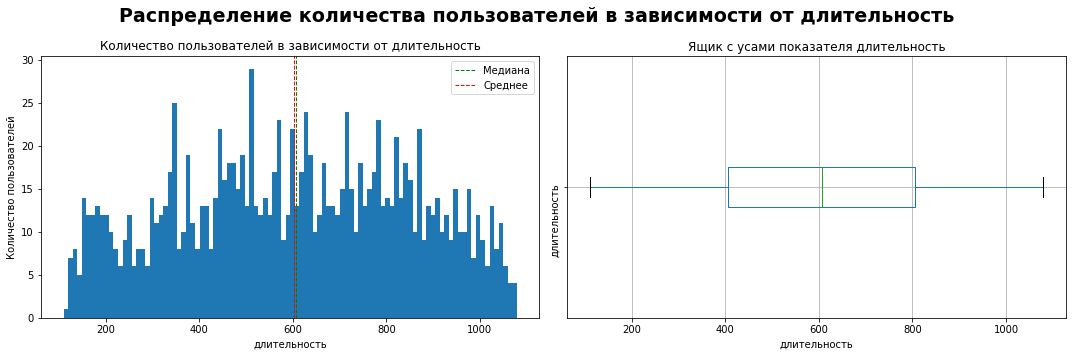


Исследовательский анализ данных показателя акционные_покупки


,акционные_покупки
count,1300.000000
mean,0.319808
std,0.249843
min,0.000000
25%,0.170000
50%,0.240000
75%,0.300000
max,0.990000


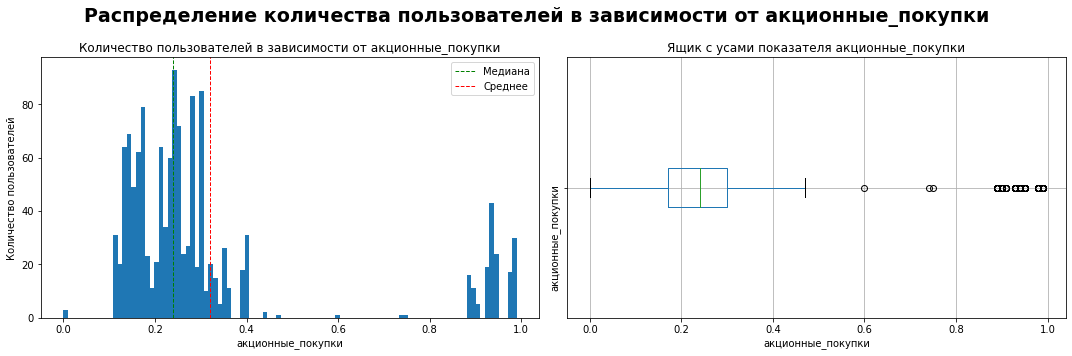

In [69]:
for elem in num_col_names_contin:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    noncat_indicator(market_file[elem], market_file)
    print()

##### В разрезе дискретных величин: 

Исследовательский анализ данных показателя маркет_актив_6_мес


,маркет_актив_6_мес
count,1300.000000
mean,4.253769
std,1.014814
min,0.900000
25%,3.700000
50%,4.200000
75%,4.900000
max,6.600000


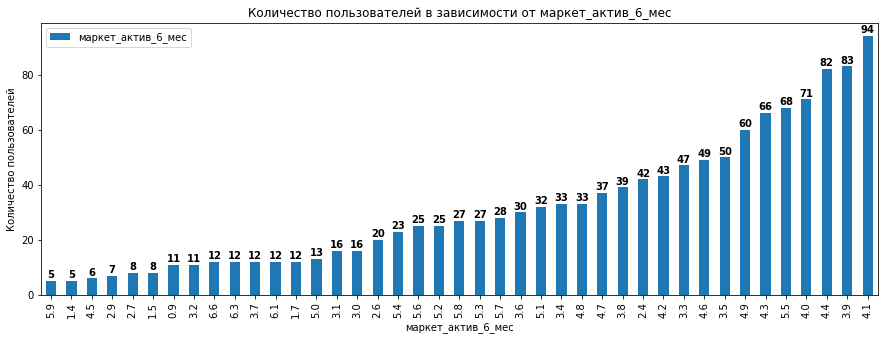


Исследовательский анализ данных показателя маркет_актив_тек_мес


,маркет_актив_тек_мес
count,1300.000000
mean,4.011538
std,0.696868
min,3.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,5.000000


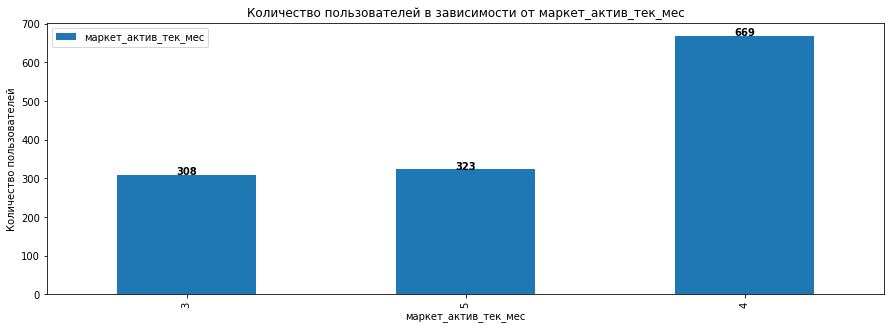


Исследовательский анализ данных показателя средний_просмотр_категорий_за_визит


,средний_просмотр_категорий_за_визит
count,1300.00000
mean,3.27000
std,1.35535
min,1.00000
25%,2.00000
50%,3.00000
75%,4.00000
max,6.00000


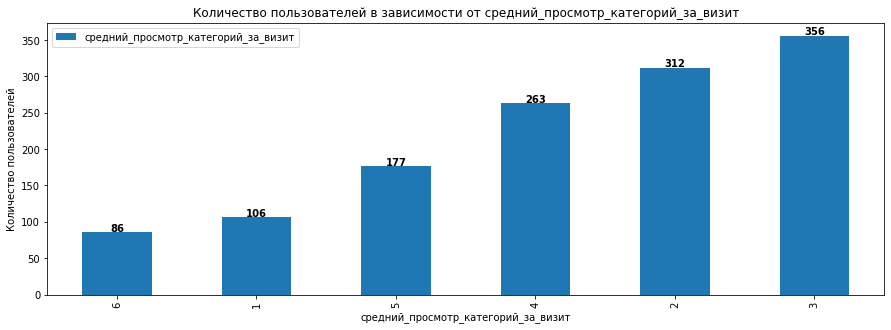


Исследовательский анализ данных показателя неоплаченные_продукты_штук_квартал


,неоплаченные_продукты_штук_квартал
count,1300.000000
mean,2.840000
std,1.971451
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,10.000000


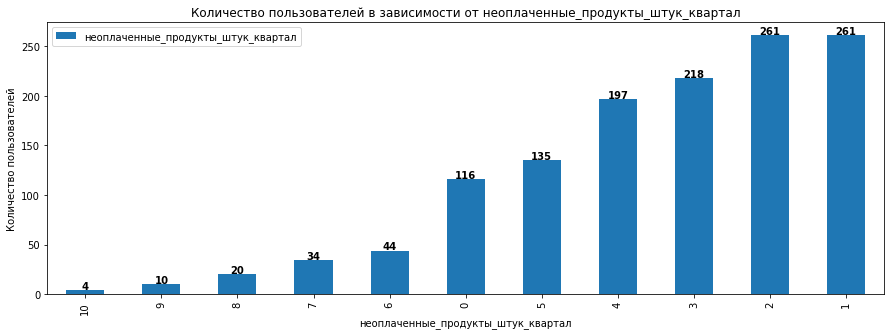


Исследовательский анализ данных показателя ошибка_сервиса


,ошибка_сервиса
count,1300.000000
mean,4.185385
std,1.955298
min,0.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,9.000000


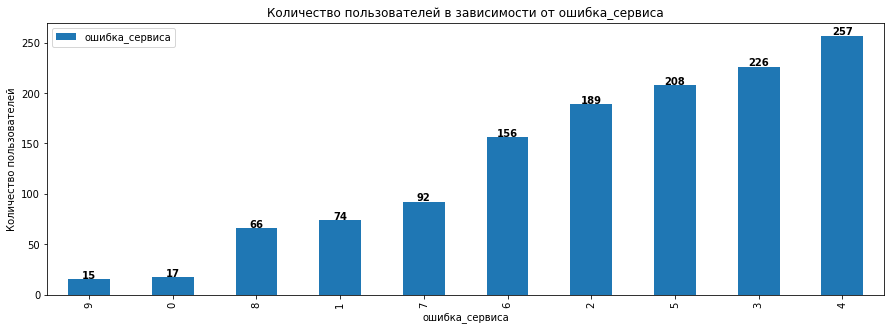


Исследовательский анализ данных показателя страниц_за_визит


,страниц_за_визит
count,1300.000000
mean,8.176923
std,3.978126
min,1.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,20.000000


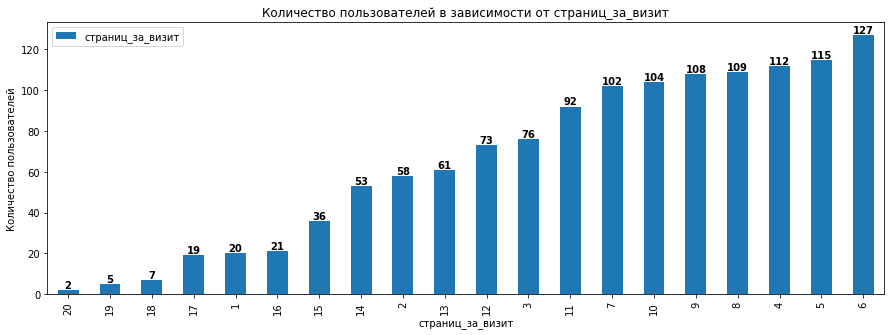

In [70]:
for elem in num_col_names_discr:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    noncat_indicator_discr(market_file[elem])
    print()

#### Выводы по результатам исследовательского анализа  количественных данных: 

**По результатам исследовательского анализа количественных данных датасета "market_file" были проанализированы данные по 1 300 клиентам в разрезе 12 показателей:**

**Согласно анализу показателя "маркет_актив_6_мес" (среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев: это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента):**
- минимальное значение показателя - 0,9 единиц, а максимальное - 6,6 единиц;
- медианное значение показателя - 4,2 единиц, а среднее - 4,25 единиц;
- максимальное среднемесячное значение маркетинговых коммуникаций (от 6,1 до 14) приходилось на относительно небольшое количество клиентов (до 6 клиентов);
- при этом самая многочисленная группа клиентов (94 человека) была охвачена  маркетинговыми коммуникациями в 4,1 единицу (практически на уровне медианного значения).

**Согласно анализу показателя "маркет_актив_тек_мес" (количество маркетинговых коммуникаций в текущем месяце):**
- минимальное значение показателя - 3 единицы, а максимальное - 5 единиц;
- медианное и среднее значения показателя - 4 единиц;
- в отношении 669 клиентов осуществлено 4  маркетинговых коммуникации, в отношении 323 клиентов – 5 и в отношении 308 клиентов – 3.

**Согласно анализу показателя "длительность" (значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте):**
- минимальное значение показателя - 110 дней, а максимальное – 1 079 дней (ресурс продолжает привлекать клиентов);
- медианное значения показателя - 606 дней, а среднее – 602 дня;
- показатель распределен неравномерно: имеется множество "пиков" на разных участках значений показателя – пользователи регистрировалась на сайте в разное время;
- длительность пребывания на сайте для большинства клиентов составляет около 500 дней, далее – около 280 дней (отмечена тенденция по «спаду» активности по привлечению клиентов – количество пользователей, зарегистрировавшихся менее, чем 200 дней назад, сопоставимо с количеством пользователей, зарегистрировавшихся более 1000 дней назад);
- среднее значение находится практически на уровне медианы;
- одновременно, выбросы данных не выявлены.

**Согласно анализу показателя "акционные_покупки" (среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев):**
- минимальное значение показателя – 0%, а максимальное – 99%;
- медианное значения показателя – 24%, а среднее – 32%;
- показатель распределен неравномерно: имеется множество "пиков" на разных участках значений показателя;
- доля аукционных покупок для большинства клиентов находится на уровне медианного значения – 32% от общего объема покупок, одновременно выявлен «разрыв» данных (вторая группа данных в диапазоне от 90% до 99%): имеется группа клиентов, для которых решение о покупки зависит от наличии акций;
- среднее значение находится справа от медианы (распределение признака смещено право) из-за наличия высоких значений (выявлены множественные "пики");
- одновременно, выявлены выбросы данных в диапазоне от 60% до 99%.

**Согласно анализу показателя "средний_просмотр_категорий_за_визит" (показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца):**
- минимальное значение показателя – 1 категория, а максимальное – 6 категорий;
- медианное значения показателя – 3 категории, а среднее – 3,3 категории;
- за рассматриваемый период 106 клиентов просмотрели 1 категорию, по две-три категории рассматривали большинство клиентов (312 и 356 клиентов соответственно), 4 категории рассмотрели 263 клиента, и  пять-шесть только 177 и 86 клиентов соответсвенно.

**Согласно анализу показателя "неоплаченные_продукты_штук_квартал" (общее число неоплаченных товаров в корзине за последние 3 месяца):**
- минимальное значение показателя – 0 единиц товара, а максимальное – 10;
- медианное значения показателя – 3 товара, а среднее – 2,8;
- больше всего склонны не оплачивать товары клиенты, положившие в корзину один-три товара (740 клиентов – более половины всех клиентов из выборки), далее выявлена тенденция по сокращению количества клиентов, не выкупающих товары, с ростов количества товаров, положенных в корзину.

**Согласно анализу показателя "ошибка_сервиса" (число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца):**
- минимальное значение показателя – 0 сбоев, а максимальное – 9;
- большинство клиентов (691 человек – половина всех клиентов из выборки) столкнулись с 3-5 ошибками во время посещения сайта, еще 329 клиентов (около четверти) столкнулись с 6-9 ошибками.

**Согласно анализу показателя "страниц_за_визит" (среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца):**
- минимальное значение показателя – 1 страница, а максимальное – 20;
- медианное значения показателя – 8 страниц, а среднее – 8,2;
- 423 клиента просмотрели по 7-10 страниц, 354 клиента просмотрели по 4-6 страниц, 226 клиентов – по 11-13 страниц, оставшаяся четверть клиентов просматривает или очень небольшое количество страниц (до 3) или интересуется большим количеством страниц (до 20).

---

#### Исследовательский анализ  категориальных данных: 

Исследовательский анализ данных показателя покупательская_активность


,"доля,%"
Снизилась,38.31
Прежний уровень,61.69


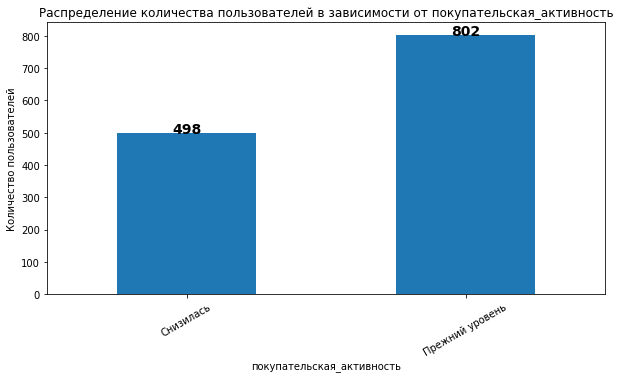


Исследовательский анализ данных показателя тип_сервиса


,"доля,%"
премиум,28.92
стандарт,71.08


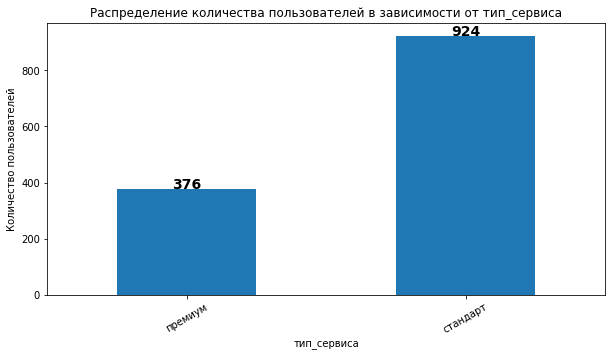


Исследовательский анализ данных показателя разрешить_сообщать


,"доля,%"
нет,26.0
да,74.0


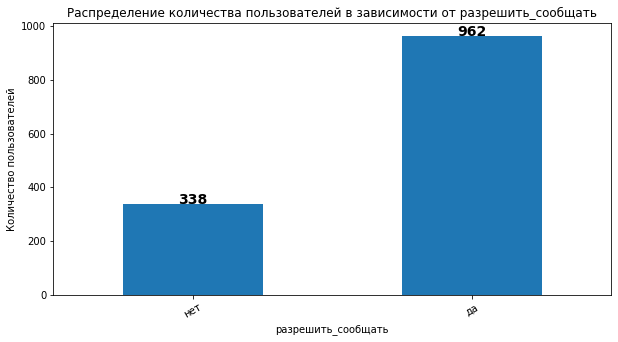


Исследовательский анализ данных показателя популярная_категория


,"доля,%"
Кухонная посуда,10.62
Мелкая бытовая техника и электроника,13.38
Техника для красоты и здоровья,14.15
Косметика и аксессуары,17.15
Домашний текстиль,19.31
Товары для детей,25.38


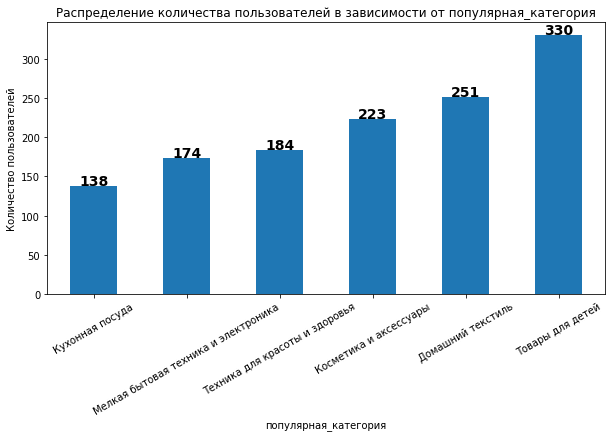

In [71]:
for elem in cat_col_names:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    cat_indicator(market_file[elem], market_file)
    print()

#### Выводы по результатам исследовательского анализа  категориальных данных: 

**По результатам исследовательского анализа категориальных данных датасета "market_file" были проанализированы данные по 1 300 клиентам в разрезе 4 показателей:**

**Согласно анализу показателя "покупательская_активность" (рассчитанный класс покупательской активности <span style='color: red;'>(целевой признак)</span>: «снизилась» или «прежний уровень»):**
- 62% клиентов (802 человека): сохраняют покупательскую активность на прежнем уровне;
- 38% клиентов (498 человек): имеют тенденцию по снижению покупательской активности.<br>
<span style='color: red;'>**Таким образом, можно говорить о дисбалансе классов целевого признака, что необходимо учитывать на этапе моделирования, ведь существуют риски, что модель будет лучше предсказывать мажорный класс (сохранение покупательской активности) и игнорировать второй класс, таким образом клиенты со снижающейся покупательской активностью не будут выявлены.**</span>

**Согласно анализу показателя "тип_сервиса" (уровень сервиса, например «премиум» и «стандарт», в зависит от наличия определенной подписки у пользователя):**
- 71% клиентов (924 человека): осуществляют покупки на сайте без офрмления подписки - на условиях "стандарта";
- 29% клиентов (376 человек): имеют оформленную подписку.

**Согласно анализу показателя "разрешить_сообщать" (информация о том, можно ли присылать покупателю дополнительные предложения о товаре, - согласие на это даёт покупатель):**
- 74% клиентов (962 человека): согласны на получение дополнительных предложений о товарах;
- 26% клиентов (338 человек): отказались от получения дополнительных предложений.

**Согласно анализу показателя "популярная_категория" (самая популярная категория товаров у покупателя за последние 6 месяцев):**
- у 25,4% клиентов (330 человек): самая популярная категория товаров - это товары для детей;
- у 19,3%  и 17,2% клиентов (251 и 223 человек соответсвенно): отдают предпочтения товарам из категорий "Домашний текстиль" и "Косметика и аксесуары" соответсвенно;
- 10,6% клиентов (138 человек): отдают предпочтения товарам из категории "кухонная посуда" - самая невостребованная категория товаров.

---

### Исследовательский анализ данных показателей датасета "market_money": 

In [72]:
# Отбор информации о клиентах для целей анализа:
print('Общее количество записей о клиентах:', len(market_money['id']))
print('Количество записей о клиентах с покупательской активностью не менее трёх месяцев:', len(market_money_three_months['id']))

Общее количество записей о клиентах: 3900
Количество записей о клиентах с покупательской активностью не менее трёх месяцев: 3894


По результатам выявления клиентов с покупательской активностью не менее трёх месяцев определено, что подавляющее большинство клиентов (3 894 из 3 900), информация о которых содержится в датасете "market_money", что-либо покупали в этот период.

---

In [73]:
# Подготовка данных к анализу - отделение количественных признаков от категориальных:
cat_col_names, num_col_names = separation(market_money_three_months)
num_col_names.remove('id') # исключение показателя "id" из списка количественных показателей
                           # как неинформационного для целей анализа

---

#### Исследовательский анализ  количественных данных: 

Исследовательский анализ данных показателя выручка


,выручка
count,3894.000000
mean,5033.439805
std,1768.082235
min,2758.700000
25%,4592.000000
50%,4959.000000
75%,5363.300000
max,106862.200000


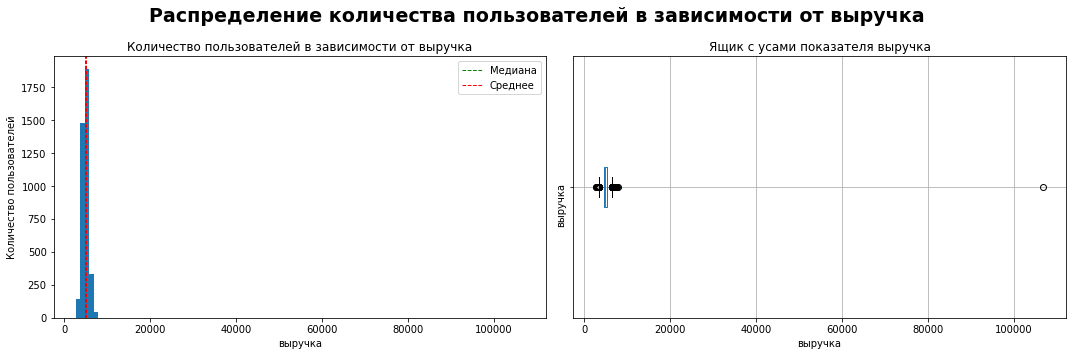

In [74]:
for elem in num_col_names:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    noncat_indicator(market_money_three_months[elem], market_money_three_months)
    print()

Распределение данных выявило один значительный выброс данных - значение выручки в 106 862,2 условных единиц.

In [75]:
# Получение информации по "выбросу" (1):
display(market_money_three_months.loc[market_money_three_months['выручка'] == market_money_three_months['выручка'].max()])

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [76]:
# Получение информации по "выбросу" (2):
display(market_file.loc[market_file['id'] == 215380])

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


Определить природу указанного выброса крайне сложно:
- с отдной стороны значение могло быть неверно записано / подсчитано и т.п. (техническая ошибка);
- с друго стороны, клиент имеет "премиум" подписку, и для него наиболее актуальными являются товары из категории "Техника для красоты и здоровья" - дорогостоящие товары.

Вместе с тем, для целей последующего анализа представляется целесообразным исключить указанное наблюдение.

Исследовательский анализ данных показателя выручка


,выручка
count,3893.000000
mean,5007.282918
std,679.724898
min,2758.700000
25%,4592.000000
50%,4959.000000
75%,5363.000000
max,7799.400000


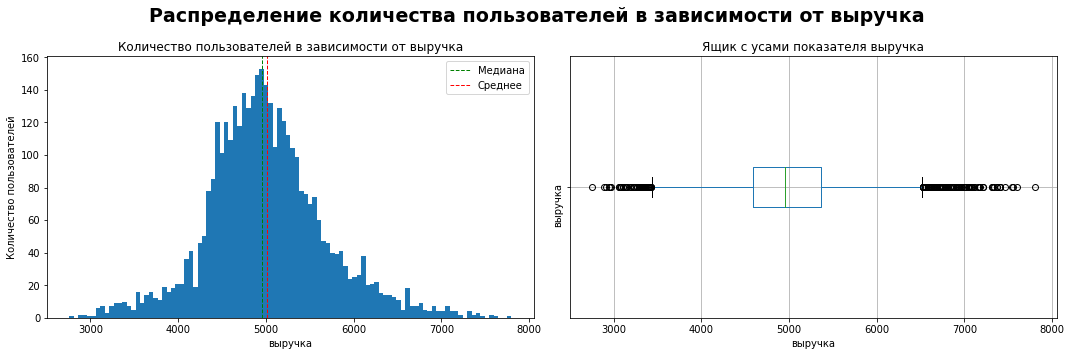

In [77]:
# Удаление "выброса":
market_money_three_months_new = market_money_three_months.loc[market_money_three_months['выручка'] \
                                                            != market_money_three_months['выручка'].max()]

cat_col_names, num_col_names = separation(market_money_three_months_new)
num_col_names.remove('id')

for elem in num_col_names:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    noncat_indicator(market_money_three_months_new[elem], market_money_three_months_new)
    print()

#### Выводы по результатам исследовательского анализа  количественных данных: 

**Согласно анализу показателя "выручка" (сумма выручки за период в условных единицах) без учета одного наблюдения - информация о пользователей с объмом выручки в 106 862,2 условных единиц (выброс данных):**
- минимальное значение показателя – 2 758,7 условных единиц, а максимальное – 7 799,4 условные единицы;
- медианное значение показателя – 4 959 единиц, а среднее – 5 007,3;
- показатель тяготеет к нормальному распределению: значения практически симметрично сгруппированы вокруг среднего (имеется множество слабовыраженных "пиков" данных);
- большинства клиентов "принесли" выручку на уровне медианного значения;
- среднее значение находится справа от медианы (распределение признака смещено вправо);
- одновременно, выявлно множество выбросов данных - очень маленькие и очень большие значения.

---

#### Исследовательский анализ  категориальных данных: 

Исследовательский анализ данных показателя период


,"доля,%"
препредыдущий_месяц,33.32
предыдущий_месяц,33.32
текущий_месяц,33.37


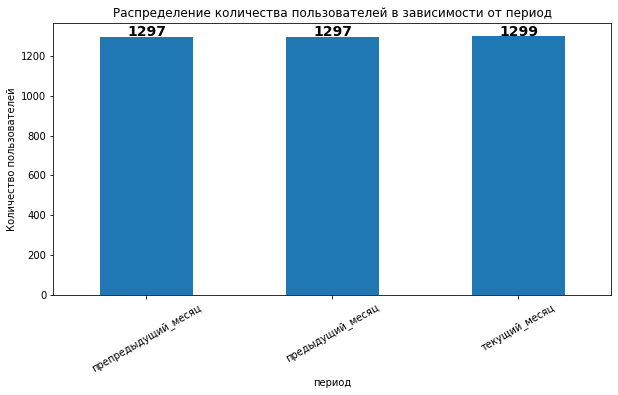

In [78]:
for elem in cat_col_names:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    cat_indicator(market_money_three_months_new[elem], market_money_three_months_new)
    print()

#### Выводы по результатам исследовательского анализа  категориальных данных: 

**Согласно анализу показателя "период" (название периода, во время которого зафиксирована выручка):**
- количество пользователей распределено равномерно: на каждую из категорий ("текущий месяц", "предыдущий месяц" и "препредыдущий") приходится треть клиентов, что свидетельсвует о стабильной покупательской активности клиентов в последние три месяца.

---

### Исследовательский анализ данных показателей датасета "market_time": 

In [79]:
# Отбор информации о клиентах для целей анализа:
market_time_three_months = market_time.loc[market_time['id'].isin(market_money_three_months['id'].tolist())]

print('Общее количество записей о клиентах:', len(market_time['id']))
print('Количество записей о клиентах с покупательской активностью не менее трёх месяцев:', len(market_time_three_months['id']))

Общее количество записей о клиентах: 2600
Количество записей о клиентах с покупательской активностью не менее трёх месяцев: 2600


По результатам выявления клиентов с покупательской активностью не менее трёх месяцев определено, что **все клиенты**, информация о которых содержится в датасете "market_time", что-либо покупали в этот период.

---

In [80]:
# Подготовка данных к анализу - отделение количественных признаков от категориальных:
cat_col_names, num_col_names = separation(market_time)
num_col_names.remove('id') # исключение показателя "id" из списка количественных показателей
                           # как неинформационного для целей анализа

---

#### Исследовательский анализ  количественных данных: 

Исследовательский анализ данных показателя минут


,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


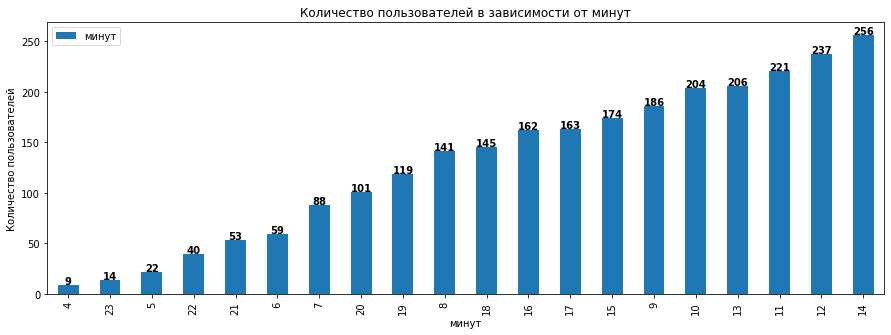

In [81]:
for elem in num_col_names:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    noncat_indicator_discr(market_time[elem])
    print()

#### Выводы по результатам исследовательского анализа  количественных данных: 

**Согласно анализу показателя "минут" (значение времени, проведённого на сайте, в минутах):**
- минимальное значение показателя – 4 минуты, а максимальное – 23;
- медианное значение показателя – 13 минут, а среднее – 13,3;
- 256 клиентов (самая многочисленная группа) проводит на сайте 14 минут, далее - 868 клиентов - 10-13 минут, при этом 971 клиент провел на сайте от 15 до 23 минут.

---

#### Исследовательский анализ  категориальных данных: 

Исследовательский анализ данных показателя период


,"доля,%"
текущий_месяц,50.0
предыдущий_месяц,50.0


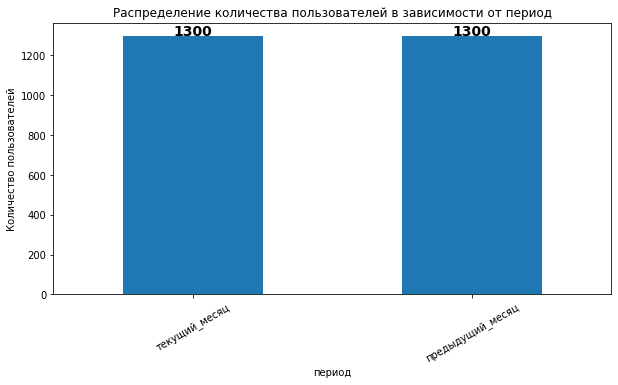

In [82]:
for elem in cat_col_names:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    cat_indicator(market_time[elem], market_time)
    print()

#### Выводы по результатам исследовательского анализа  категориальных данных: 

**Согласно анализу показателя "период" (название периода, во время которого зафиксировано общее время):**
- количество пользователей распределено равномерно: на каждую из категорий ("текущий месяц" и "предыдущий месяц") приходится половина клиентов, что свидетельсвует о стабильной покупательской активности клиентов в последние три месяца.

---

### Исследовательский анализ данных показателей датасета "money": 

In [83]:
# Отбор информации о клиентах для целей анализа:
money_three_months = money.loc[money['id'].isin(market_money_three_months['id'].tolist())]

print('Общее количество записей о клиентах:', len(money['id']))
print('Количество записей о клиентах с покупательской активностью не менее трёх месяцев:', len(money_three_months['id']))

Общее количество записей о клиентах: 1300
Количество записей о клиентах с покупательской активностью не менее трёх месяцев: 1300


По результатам выявления клиентов с покупательской активностью не менее трёх месяцев определено, что **все клиенты**, информация о которых содержится в датасете "money", что-либо покупали в этот период.

---

In [84]:
# Подготовка данных к анализу - отделение количественных признаков от категориальных:
cat_col_names, num_col_names = separation(money)
num_col_names.remove('id') # исключение показателя "id" из списка количественных показателей
                           # как неинформационного для целей анализа

---

#### Исследовательский анализ  количественных данных: 

Исследовательский анализ данных показателя прибыль


,прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


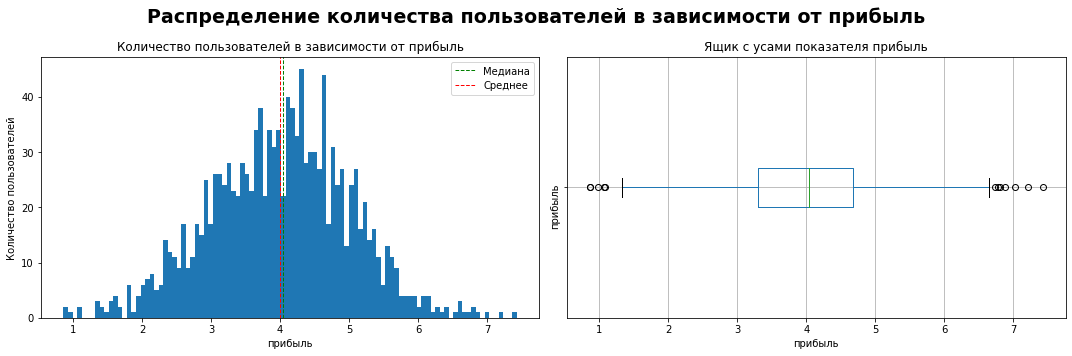

In [85]:
for elem in num_col_names:
    print("\033[1m\033[35m\033[47m{}\033[0m".format('Исследовательский анализ данных показателя ' + elem))
    noncat_indicator(money[elem], money)
    print()

#### Выводы по результатам исследовательского анализа  количественных данных: 

**Согласно анализу показателя "прибыль" (значение прибыли в условных единицах):**
- минимальное значение показателя – 0,86 условных единиц, а максимальное – 7,4 условные единицы;
- медианное значение показателя – 4 единиц, а среднее – 3,99;
- показатель распределен неравномерно: визуализируется множество "пиков" на всем диапазоне значений;
- большинство значений сосредоточено на уровне 4,3 условных единиц и 4,8 условных единиц;
- среднее значение находится практически на уровне медианы;
- одновременно, выявлено множество выбросов данных - очень маленькие и очень большие значения.

---

## Шаг 4. Объединение датасетов - исходников: 

На указанном шаге будет осуществлено объединение следующих датасетов-исходников:
- market_file;
- market_money;
- market_time.

Так как целевой признак "Покупательская активность" содержиться в датасете "market_file", присоединение будет осуществляться к указанному датасету по столбцу "id" - номер покупателя в корпоративной базе данных, содержащимуся во всех трех датасетах.

Вместе с тем, данные о выручке датасета "market_money" и времени на сайте датасета "market_time" находятся в одном столбце для всех периодов, что требует разделения указанных данных для каждого периода в целях обеспечения более качественного выявления влияния показателей (выручка и время на сайте) на целевой признак при моделировании (устранение "запутанности").

---

In [86]:
# Проверка объединяемых датасетов:
print('Количество записей в датасетах:')
print('- market_file:', len(market_file))
print('- market_money:',len(market_money))
print('- market_time:',len(market_time))
print()
print('Наличие "id" датасета "market_file" в датасетах:')
print('- "market_money":', market_file['id'].unique() in market_money['id'].unique())
print('- "market_time":', market_file['id'].unique() in market_time['id'].unique())

Количество записей в датасетах:
- market_file: 1300
- market_money: 3900
- market_time: 2600

Наличие "id" датасета "market_file" в датасетах:
- "market_money": True
- "market_time": True


По всем пользователям ("id") датасета "market_file" имеется информация в датасетах "market_money" и "market_time", таким образом объединение датасетов приведет к статистически значимому и полному наполнению датасета "market_file", что обеспечит более качественное моделирование.

---

In [87]:
# Подготовка данных дадатеса "market_money" к объединению:
market_money_pivot = market_money.pivot_table(index= 'id', columns='период', values= 'выручка', aggfunc= 'sum').reset_index()
market_money_pivot.columns = ['id','выручка_предыдущий_месяц','выручка_препредыдущий_месяц','выручка_текущий_месяц']
display(market_money_pivot.head())

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


---

In [88]:
# Подготовка данных дадатеса "market_time" к объединению:
market_time_pivot = market_time.pivot_table(index= 'id', columns='период', values= 'минут', aggfunc= 'sum').reset_index()
market_time_pivot.columns = ['id','минут_предыдущий_месяц','минут_текущий_месяц']
display(market_time_pivot.head())

,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


---

In [89]:
# Объединение трех датасетов:
market_file_total = market_file.merge(market_money_pivot, on='id', how='left').merge(market_time_pivot, on='id', how='left')
display(market_file_total.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [90]:
# Вывод основной информации об объедененном датасете:
market_file_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [91]:
# Вывод количества пропущенных значений для каждого столбца объединенного датасета:
market_file_total.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

In [92]:
# Поиск количества явных дубликатов в объединенном датасете:
market_file_total.duplicated().sum()

0

**Объединение датасетов прошло успешно:**
- объединенный датасет "market_file_total" содержит 1 300 записей (что соответсвует размеру исходного датасета "market_file");
- данные представлены в разрезе 18 показателей: 13 основных (включая "id") с учетом трех показателей о выручке в разрезе периодов из датасета "market_money" и двух показателей о времени, проведенном на сайте, в разрезе периодов из датасета "market_time";
- пропуски данных и явные дубликаты по результатам объединения не выявлены.

---

Вместе с тем, в объедененный датасет попала информация о клиенте "215380", чье значение выручки на предыдущих этапах было определено как выброс.

In [93]:
# Получение информации о "выбросе":
display(market_file_total.loc[market_file_total['выручка_текущий_месяц'] == market_file_total['выручка_текущий_месяц'].max()])

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7,6077.0,5051.0,106862.2,12,14


Для целей дальнейшего анализа и моделирования представляется целесообразным исключение указанной записи из объединенного датасета.

In [94]:
# Удаление строки с выбросами данным:
market_file_total = market_file_total.loc[market_file_total['выручка_текущий_месяц'] != \
                                          market_file_total['выручка_текущий_месяц'].max()]

In [95]:
# Вывод основной информации об объедененном датасете:
market_file_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1299 non-null   int64  
 1   покупательская_активность            1299 non-null   object 
 2   тип_сервиса                          1299 non-null   object 
 3   разрешить_сообщать                   1299 non-null   object 
 4   маркет_актив_6_мес                   1299 non-null   float64
 5   маркет_актив_тек_мес                 1299 non-null   int64  
 6   длительность                         1299 non-null   int64  
 7   акционные_покупки                    1299 non-null   float64
 8   популярная_категория                 1299 non-null   object 
 9   средний_просмотр_категорий_за_визит  1299 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1299 non-null   int64  
 11  ошибка_сервиса                

**Таким образом, объединенный датасет включает информацию об 1 299 клиентах в разрезе 18 показателей.**

---

## Шаг 5. Корреляционный анализ признаков объединенного датасета: 

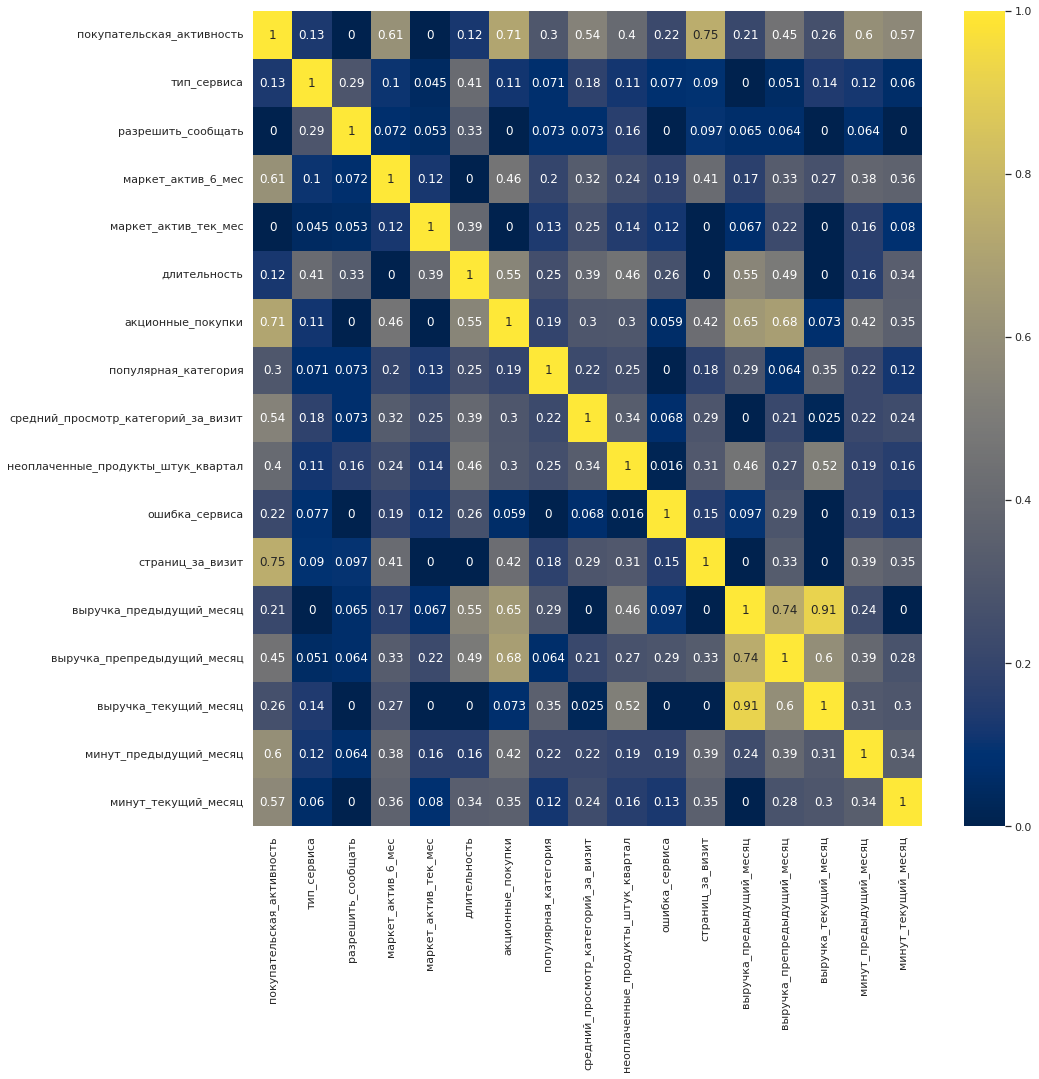

In [96]:
# Создание тепловой карты с матрицей корреляции между всеми показателями датасета:
interval_cols =['длительность', 'акционные_покупки', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц',
                'выручка_текущий_месяц'] 

sns.set(rc={"figure.figsize": (15,15)})
sns.heatmap(market_file_total.drop(['id'], axis=1).phik_matrix(interval_cols=interval_cols, bins=100),
            annot=True, cmap='cividis');

**По результатам корреляционного анализа признаков объединенного датасета, отмечено, что корреляция:**
- показателя "Акционные покупки" и показателей "Выручка за предыдущий месяц" и "Выручка за препредыдущий месяц" составляет 65% и 68% соответсвенно;
- показателя "Выручка за предыдущий месяц" и показателей "Выручка за текущий месяц" и "Выручка за препредыдущий месяц" составляет 91% (выявлена мультиколлинеарность) и 74% соответсвенно.

Вместе стем на этапе исследовательского анализа показателя "Акционные покупки" выявлена группа клиентов, для которых решение о покупки зависит от наличии акций (визуализация отдельного участка распределения признака), что определяет вышеуказанную корреляцию.

Таким образом, в целях снижения взаимного влияния вышеперечисленных показателей, а также исключения мультиколлинеарности, представляется целесообразным:
- исключение показателя "Акционные покупки" из обучения модели ввиду объяснимого влияния указанного показателя на объем выручки в предыдущем и препредыдущем месяце (корреляция указанного показателя с целевым - средняя и составляет 50%, риски удаления минимальны);
- создание двух "искусственных" признаков о выручке на базе имеющихся: прирост выручки за предыдущий месяц относительно препредыдущего и прирос выручки в текущем месяце относительно предыдущего месяца, ведь такая динамика более качественно описывает покупательскую активность клиентов за три месяца, чем обсолютные значения объемов выручки по периодам.

---

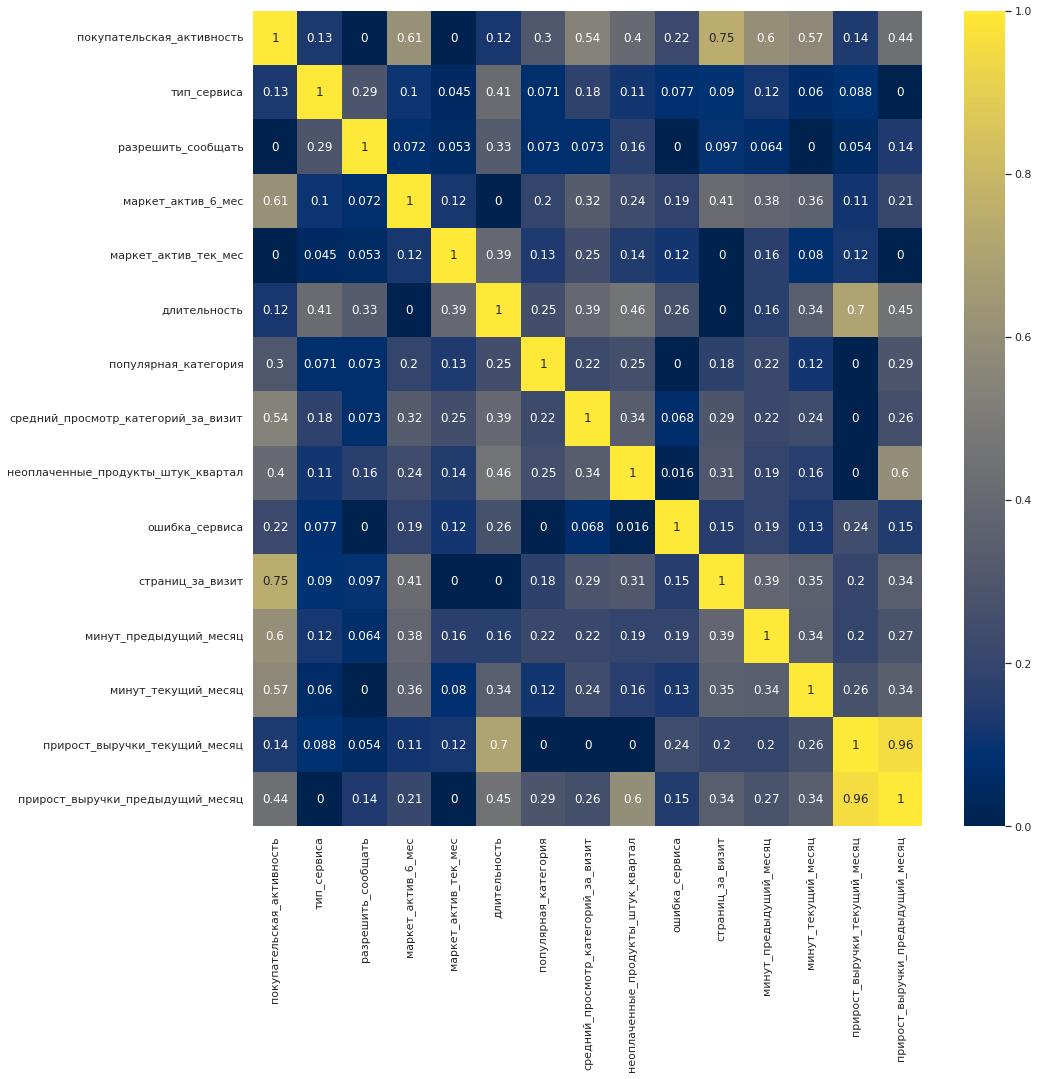

In [97]:
# Преобразование данных:
market_file_total1 = market_file_total.copy()

market_file_total1['прирост_выручки_текущий_месяц'] = \
market_file_total1['выручка_текущий_месяц'] - market_file_total1['выручка_предыдущий_месяц']

market_file_total1['прирост_выручки_предыдущий_месяц'] = \
market_file_total1['выручка_предыдущий_месяц'] - market_file_total1['выручка_препредыдущий_месяц']

market_file_total1 = market_file_total1.drop(['акционные_покупки', 'выручка_текущий_месяц',
                                            'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц'], axis=1)

interval_cols2 =['длительность', 'прирост_выручки_текущий_месяц', 'прирост_выручки_предыдущий_месяц']

sns.heatmap(market_file_total1.drop(['id'], axis=1).phik_matrix(interval_cols=interval_cols2, bins=100),
            annot=True, cmap='cividis');

После преобразований сохраниоась мультиколлинеарность (96%) между новыми показателями "прирост_выручки_предыдущий_месяц" и "прирост_выручки_предыдущий_месяц", - в целях ее исключения создадим новый показатель, который покажет общий прирост выручки за три месяца.

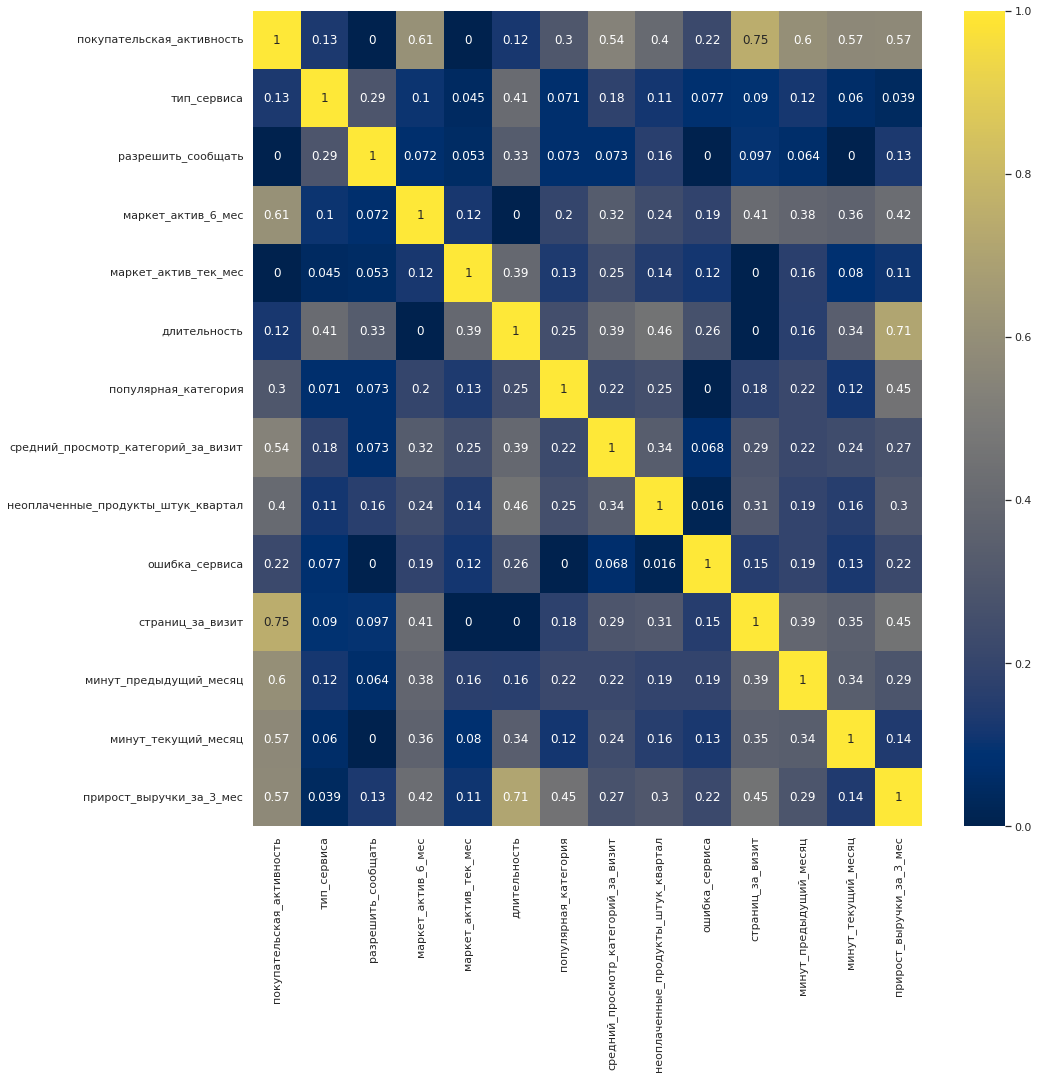

In [98]:
# Преобразование данных:
market_file_total1['прирост_выручки_за_3_мес'] = market_file_total1['прирост_выручки_текущий_месяц'] - \
market_file_total1['прирост_выручки_предыдущий_месяц']

market_file_total1 = market_file_total1.drop(['прирост_выручки_текущий_месяц', 'прирост_выручки_предыдущий_месяц'], axis=1)

interval_cols3 =['длительность', 'прирост_выручки_за_3_мес']

sns.heatmap(market_file_total1.drop(['id'], axis=1).phik_matrix(interval_cols=interval_cols3, bins=100),
            annot=True, cmap='cividis');

**По результатам корреляционного анализа** между всеми признаками датасета "market_file_total" можно сделать следующие выводы с учетом оценки силы связи по коффецентам корреляции в соответствии со школой Чеддока:

**1) По результатам оценки корреляции показателей с целевым показателем "покупательская_активность" выявлено:**
- сильная (высокая) корреляция (в промежутке 70-90%%) с показателем "страниц_за_визит" (75%);
- средняя корреляция (в промежутке 50-70%) с показателями "минут_предыдущий_месяц" (60%), "минут_текущий_месяц" (57%), "маркет_актив_6_мес" (61%), "стедний_просмотр_категорий_за_визит" (54%) и "прирост_выручки_за_3_мес" (57%);
- умеренная корреляция (в промежутке 30-50%) с показателями "неоплаченные_продукты_штук_квартал" (40%) и "популярная_категория" (30%);
- очень слабая корреляция с оставшимися показателями (в промежутке до 30%).

2) Одновременно по результатам корреляционного анализа входных признаков выявлена и устранена **мультиколлинеарность** (значение коэффициента корреляции в промежутке 90-95%), в том числе за счет:
- удаления признака "акционные_покупки";
- создания "искусственного" признака, характерезующего изменение выручки за три месяца.

---

## Шаг 6. Определение лучшей модели и подбор оптимальных значений ее гипперпараметров с использованием пайплайнов, моделирование целевого признака: 

### Подготовка данных для моделирования: 

In [99]:
# Отделение количественных признаков от категориальных:
cat_col_names, num_col_names = separation(market_file_total1.drop(['id', 'покупательская_активность'], axis=1))

print("\033[1m\033[35m\033[47m{}\033[0m".format('КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ДАТАСЕТА:'))

n=1
for elem in cat_col_names:
    print(n, ' Уникальные значения показателя ' + elem)
    print(market_file_total1[elem].unique())
    n+=1
    print()

print("\033[1m\033[35m\033[47m{}\033[0m".format('КОЛИЧЕСТВЕННЫЕ ПРИЗНАКИ ДАТАСЕТА:'))
print(num_col_names)

КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ДАТАСЕТА:
1  Уникальные значения показателя тип_сервиса
['премиум' 'стандарт']

2  Уникальные значения показателя разрешить_сообщать
['да' 'нет']

3  Уникальные значения показателя популярная_категория
['Товары для детей' 'Домашний текстиль' 'Косметика и аксессуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

КОЛИЧЕСТВЕННЫЕ ПРИЗНАКИ ДАТАСЕТА:
['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'прирост_выручки_за_3_мес']


In [100]:
# Преобразование целевой переменной:
label_encoder = LabelEncoder()
market_file_total1['target'] = label_encoder.fit_transform(market_file_total1['покупательская_активность'])

print("\033[1m\033[35m\033[47m{}\033[0m".format('Проверка результата кодирования целевого признака:'))
display(market_file_total1[['покупательская_активность','target']].sample(10))

market_file_total1 = market_file_total1.drop(['покупательская_активность'], axis=1)

Проверка результата кодирования целевого признака:


,покупательская_активность,target
457,Снизилась,1
82,Снизилась,1
1254,Прежний уровень,0
170,Снизилась,1
1288,Прежний уровень,0
505,Прежний уровень,0
354,Снизилась,1
504,Прежний уровень,0
1225,Прежний уровень,0
1050,Прежний уровень,0


1) Для кодирования категориальных признаков будут использованы следующие кодировщики:
- OneHotEncoder для показателя "популярная_категория";
- OrdinalEncoder для показателей "тип_сервиса" и "разрешить_сообщать".

2) Для масштабирования количественных будут использованы следующие скейлеры:
- StandardScaler: масштабирует данные так, чтобы среднее значение было равно 0, а стандартное отклонение — 1; 
- RobustScaler: использует медиану и IQR вместо среднего и стандартного отклонения, устойчив к выбросам.<br>
Использование MinMaxScaler оценивается как нецелесообразным ввиду того, что он не подходит для признаков с выбросами, так как может сжать диапазон большинства данных (на этапе исследовательского анализа были выявлены показатели с выбросами данных).

---

### Настройка пайплайна: 

В рамках настройки пайплайна будут обучены **четыре модели**: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC().<br>
Для каждой из них предусмотрен подбор как **минимум одиного гиперпараметра**.<br> 
В качестве метрики, используемой, в том числе при подборе гиперпараметров, используется **метрика "roc_auc"**, так как указанная метрика - всеохватывающая метрика качества классификации, - она учитывает работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного (испоьзуется, когда объектов с одним значением целевого признака больше, чем с другим).

> Настройка пайплайна последовательно разделена на несколько ячеек кода, так как при запуске всего кода в одной ячейке, код "убивает" ядро, и выполнение кода в ячейке не происходит (символ [*] слева от ячейки).

In [101]:
# Выделяем в отдельные переменные целевой признак и входные признаки:
X = market_file_total1.drop(['id','target'], axis=1)
y = market_file_total1['target']

In [102]:
# Cоздание констант:
RANDOM_STATE = 42
TEST_SIZE = 0.25
    
# Разделение данных на тренировочные и тестовые c учетом стратификации:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify = y
)

In [103]:
# Создаём списки с названиями признаков:
ohe_columns = ['популярная_категория']
ord_columns = ['тип_сервиса', 'разрешить_сообщать']
num_columns = num_col_names

In [104]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
    )

In [105]:
# Создаём пайплайн для подготовки признаков из списка ord_columns:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт'], 
                    ['да', 'нет'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [106]:
# Создаём общий пайплайн для подготовки данных:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [107]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [108]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']  
    },

    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel = 'poly')],
        'models__degree': range(1, 3),
        'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']  
    }
]

---

### Выбор лучшей модели: 

In [109]:
# Запуск автоматического подбора: 
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print()
print ('Метрика ROC-AUC лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent'...
    

По результатам работы пайплайна **лучшей моделью определена модель  логистической регрессии** LogisticRegression (random_state=42) **с использованием L1-регуляризации, с гиперпараметром регуляризации С, равном 3, и с методом масштабирования 'passthrough' — вариант без масштабирования**.

### Проверка работы лучшей модели на тестовой выборке: 

In [110]:
# Рассчет прогноза на тестовых данных:
predictions = randomized_search.predict(X_test)
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.9023030011234153


Таким образом, лучшая модель обучилась и выдала результаты:
- качество модели на тренировочной выборке составила 89,4%;
- качество модели на тестовой выборке составила — 90,3%.

Таким образом, модель хорошо описывает тренировочные данные (низкое смещение), и у нее высокие предсказательные свойства (низкий разброс).

**Задача обучения модели — минимизировать ошибку так, чтобы значения метрики на тренировочных и тестовых данных практически не различались - выполнена.**

---

## Шаг 7. Анализ важности признаков лучшей модели с помощью метода SHAP: 

In [111]:
# Подготовка данных:
# кодирование и масштабирование данных:
X_train_encoded = randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)
X_test_encoded = randomized_search.best_estimator_['preprocessor'].transform(X_test)
# Обучение лучшей модели на подготовленных данных:
best_model = randomized_search.best_estimator_['models'].fit(X_train_encoded, y_train)
# Получение списка новых названий признаков подготовленных данных:
features = randomized_search.best_estimator_['preprocessor'].get_feature_names_out()
# Вывод списка признаков:
print('ПРИЗНАКИ МОДЕЛИ:')
n=1
for elem in features:
    print('Feature', n, elem)
    n+=1

ПРИЗНАКИ МОДЕЛИ:
Feature 1 ohe__популярная_категория_Косметика и аксессуары
Feature 2 ohe__популярная_категория_Кухонная посуда
Feature 3 ohe__популярная_категория_Мелкая бытовая техника и электроника
Feature 4 ohe__популярная_категория_Техника для красоты и здоровья
Feature 5 ohe__популярная_категория_Товары для детей
Feature 6 ord__тип_сервиса
Feature 7 ord__разрешить_сообщать
Feature 8 num__маркет_актив_6_мес
Feature 9 num__маркет_актив_тек_мес
Feature 10 num__длительность
Feature 11 num__средний_просмотр_категорий_за_визит
Feature 12 num__неоплаченные_продукты_штук_квартал
Feature 13 num__ошибка_сервиса
Feature 14 num__страниц_за_визит
Feature 15 num__минут_предыдущий_месяц
Feature 16 num__минут_текущий_месяц
Feature 17 num__прирост_выручки_за_3_мес


### Оценка общего вклада признаков в прогноз модели: 

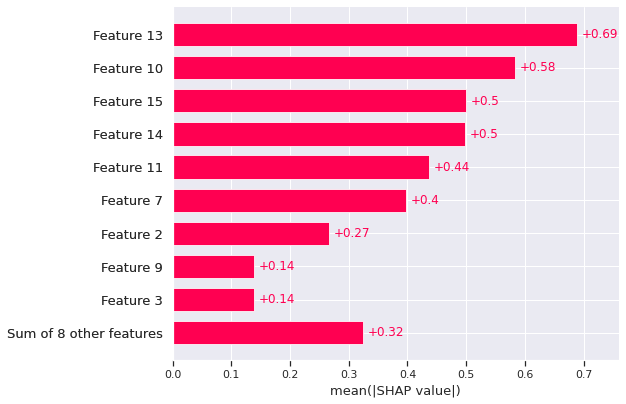

In [112]:
# Расчет средних SHAP‑значений:
explainer = shap.LinearExplainer(best_model, X_train_encoded)
shap_values = explainer(X_test_encoded)
# Построение графика shap.plots.bar с выводом топ-10 признаков: 
shap.plots.bar(shap_values, max_display=10)

Признаки на графике расположены **в порядке убывания** (от большего к меньшему) их вклада в прогноз модели.<br>
Таким образом, **в топ-5 признаков** с самый большим весом у признака входят:
- "ошибка_сервиса" - число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца: он сильнее всего влияет на прогнозы модели;
- "длительность" - значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
- "минут_предыдущий_месяц" - значение времени, проведённого на сайте, в минутах в соответсвующем периоде;
- "страниц_за_визит" - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца;
- "средний_просмотр_категорий_за_визит" - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

---

### Оценка влияния признаков на каждое предсказание в модели: 

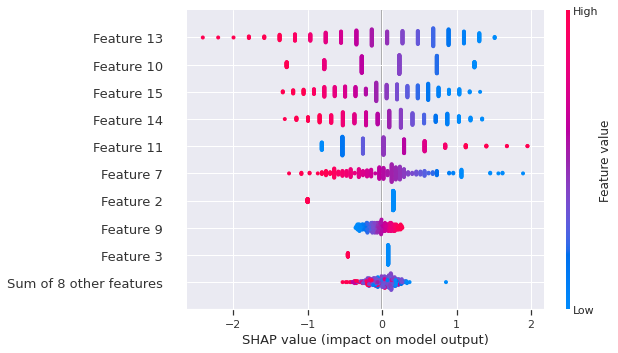

In [113]:
# Построение графика shap.plots.beeswarm с выводом топ-10 признаков: 
shap.plots.beeswarm(shap_values, max_display=10)

Признаки **упорядоченны по их важности** (сверху – самый важный), вместе с тем:
- чем больше значение признака "ошибка_сервиса", тем выше вероятность отнесения наблюдения к классу 0 - прежний уровень покупательской активности;
- чем меньше значение признака "длительность", тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности;
- чем меньше значение признака "минут_предыдущий_месяц", тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности;
- чем меньше значение признака "страниц_за_визит", тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности;
- чем больше значение признака "средний_просмотр_категорий_за_визит", тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности.

---

### Выводы по результатам анализа важности признаков лучшей модели: 

**По результатам анализа признаков лучшей модели можно сделать следующие выводы:**

1) Наибольшее влияние на прогноз модели меют следующие **ТОП-5 признаков**, расположенные по убыванию их значимости:
- "ошибка_сервиса" - число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца _(он сильнее всего влияет на прогнозы модели)_: чем больше значение признака (чем больше сбоев, с которыми столкнулся покупатель), тем выше вероятность отнесения наблюдения к классу 0 - прежний уровень покупательской активности, что может свидетельствовать о высокой лояльности аудитории - покупатели готовы мириться с неудобствами (как мы знаем, о магазине и так знает большая часть целевой аудитории, то есть магазин уже себя зарекомендовал);
- "длительность" - значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте: чем меньше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности, что может быть связано с тем, что новые клиенты паралельно с регистрации на сайте могли регестрировать (находить) другие сервисы, предоставляющие услуги, аналогичные интернет-магазину «В один клик»; 
- "минут_предыдущий_месяц" - значение времени, проведённого на сайте, в минутах в соответсвующем периоде: чем меньше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности (аналогично предыдущему пункту);
- "страниц_за_визит" - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца: чем меньше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности, что может быть связано с несоответствиями ожиданий, плохой навигацией сайта, низкой вовлеченностью клиента (скучные, неинформативные страницы и описание товаров, отсутсвие отзывов и т.п.);
- "средний_просмотр_категорий_за_визит" - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца: чем больше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности, - если пользователь много смотрит, но мало покупает, проблема обычно в перегруженности выбора или плохих триггерах (лучшие способы исправить ситуацию: упростить навигацию (умный поиск, фильтры), снизить когнитивную нагрузку (меньше категорий, но четче ассортимент), добавить триггеры срочности («Остался 1 товар по этой цене») и пр.). 

2) Таким образом, наибольшее значением имеют признаки из следующих групп признаков:
- Коммуникация с клиентом ("длительность");
- Поведение на сайте ("ошибка_сервиса", "минут_предыдущий_месяц", "страниц_за_визит");
- Продуктовое поведение ("средний_просмотр_категорий_за_визит").

3) Оставшиеся 12 признаков (вариации "популярная категория", "тип сервиса", "разрешить сообщать", "маркетинговая активность", "неоплаченные продукты", "минут"), особенно признаки из группы признаков "Финансовое поведение" ("прирост выручки"), имеют низкое влияние на прогноз (ими можно принебречь при моделировании).

4) **Таким образом, интернет-магазину «В один клик» целесообразно при принятии бизнес-решений сосредоточится на принятии мер, которые способны изменить в лучшую сторону ТОП-5 показатели**:
- упростить навигацию (умный поиск, фильтры);
- снизить когнитивную нагрузку (меньше категорий, но четче ассортимент);
- добавить триггеры срочности («Остался 1 товар по этой цене»);
- расширение визульного и информационного наполнения страниц;
- предусмотреть форму обратной связи с клиентами (в том числе возможность оставлять отзыв о товаре и опыте взаимодействия с сайтом);
- оптимизировать работу сайта таким образом, что бы после предусмотренных изменений и расширений количество ошибок, возникающих при работе с платформой, не увеличивалось, и пр.

---

## Шаг 8. Сегментация покупателей: 

Для целей настоящего исследования возьмем две группы клиентов с высокой вероятностью снижения покупательской активности и:
- с максимальной долей покупок по акции;
- наиболее высокой прибыльностью.

### Объединение файлов (добавление информации о прибыльности клиентов): 

In [114]:
market_segment = market_file_total.merge(money, on='id', how='left')
display(market_segment.head(5))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14,0.98
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21


In [115]:
# Вывод основной информации об объединённом датасете:
market_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1299 non-null   int64  
 1   покупательская_активность            1299 non-null   object 
 2   тип_сервиса                          1299 non-null   object 
 3   разрешить_сообщать                   1299 non-null   object 
 4   маркет_актив_6_мес                   1299 non-null   float64
 5   маркет_актив_тек_мес                 1299 non-null   int64  
 6   длительность                         1299 non-null   int64  
 7   акционные_покупки                    1299 non-null   float64
 8   популярная_категория                 1299 non-null   object 
 9   средний_просмотр_категорий_за_визит  1299 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1299 non-null   int64  
 11  ошибка_сервиса                

In [116]:
# Вывод количества пропущенных значений для каждого столбца объединенного датасета:
market_segment.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
прибыль                                0
dtype: int64

In [117]:
# Поиск количества явных дубликатов в объединенном датасете:
market_segment.duplicated().sum()

0

**Объединение датасетов прошло успешно:**
- объединенный датасет "market_segment" содержит 1 299 записей (что соответсвует размеру исходного датасета "market_file_total");
- данные представлены в разрезе 19 показателей: 14 основных (включая "id") и "прибыль" из датасета "money";
- пропуски данных и явные дубликаты по результатам объединения не выявлены.

---

### Присваивание клиенту статуса вероятности снижения покупательской активности с использованием результатов моделирования :

Согласно результатам моделирования, вероятность отнесения наблюдения к классу "покупательская активность снизилась" тем выше, чем:
- ниже значения показателей "ошибка_сервиса", "длительность", "минут_предыдущий_месяц" и "страниц_за_визит";
- выше значение показателя "средний_просмотр_категорий_за_визит".

С учетом выявленных особенностей, необходимо определить пороги значений вышеуказанных показателей для целей последующей сегментации:
- для показателей "ошибка_сервиса", "длительность", "минут_предыдущий_месяц" и "страниц_за_визит" возьмем значения, меьше 25-го квантиял;
- для показателя "средний_просмотр_категорий_за_визит" возьмем значения больше 75-го квантиля.

Исходя из полученных порогов каждому наблюдению будет присвоен промежуточный статус в разрезе каждого из вышеуказанных показателей (1 - соответсвует порогу или 0 - не соответсвует порогу).

Далее получим сумму промежуточных статусов, крайние значение которой: 5 - высокая вероятность снижения покупательской активности, 0 - вероятность снижения покупательской активности практически отсутсвует.

Исходя из полученной сумме каждому наблюдению присвоим итоговй статус вероятности снижения покупательской активности:
- в промежутке от 4 до 5 - "высокая";
- в промежутке от 2 до 3 - "умеренная";
- в промежутке от 0 до 1 - "отсутствует".

In [118]:
# Определение порогов фильтрации:
low = ['ошибка_сервиса','длительность','страниц_за_визит', 'минут_предыдущий_месяц']

print("\033[1m\033[35m\033[47m{}\033[0m".format('Крайние пороги для фильтрации данных:'))
print("\033[1m\033[35m\033[47m{}\033[0m".format('1) НИЖЕ:'))
for elem in low:
    print(market_segment[elem].quantile(0.25), '- для ' + elem)

print("\033[1m\033[35m\033[47m{}\033[0m".format('2) ВЫШЕ:'))
print(market_segment['средний_просмотр_категорий_за_визит'].quantile(0.75), '- для средний_просмотр_категорий_за_визит')

Крайние пороги для фильтрации данных:
1) НИЖЕ:
3.0 - для ошибка_сервиса
405.0 - для длительность
5.0 - для страниц_за_визит
11.0 - для минут_предыдущий_месяц
2) ВЫШЕ:
4.0 - для средний_просмотр_категорий_за_визит


In [119]:
# Присвоение промежуточных статусов:
market_segment['ошибка_сервиса_статус'] = market_segment['ошибка_сервиса']
market_segment.loc[market_segment['ошибка_сервиса_статус']<=3, 'ошибка_сервиса_статус']=1
market_segment.loc[market_segment['ошибка_сервиса_статус']>3, 'ошибка_сервиса_статус']=0

market_segment['длительность_статус'] = market_segment['длительность']
market_segment.loc[market_segment['длительность_статус']<=405, 'длительность_статус']=1
market_segment.loc[market_segment['длительность_статус']>405, 'длительность_статус']=0

market_segment['страниц_за_визит_статус'] = market_segment['страниц_за_визит']
market_segment.loc[market_segment['страниц_за_визит_статус']<=5, 'страниц_за_визит_статус']=1
market_segment.loc[market_segment['страниц_за_визит_статус']>5, 'страниц_за_визит_статус']=0

market_segment['минут_предыдущий_месяц_статус'] = market_segment['минут_предыдущий_месяц']
market_segment.loc[market_segment['минут_предыдущий_месяц_статус']<=11, 'минут_предыдущий_месяц_статус']=1
market_segment.loc[market_segment['минут_предыдущий_месяц_статус']>11, 'минут_предыдущий_месяц_статус']=0

market_segment['средний_просмотр_категорий_за_визит_статус'] = market_segment['средний_просмотр_категорий_за_визит']
market_segment.loc[market_segment['средний_просмотр_категорий_за_визит_статус']>=4, 
                   'средний_просмотр_категорий_за_визит_статус']=1
market_segment.loc[market_segment['средний_просмотр_категорий_за_визит_статус']<4, 
                   'средний_просмотр_категорий_за_визит_статус']=0

# Сумма промежуточных статусов:
market_segment['сумма_статусов'] = market_segment['ошибка_сервиса_статус'] + market_segment['длительность_статус'] + \
                                   market_segment['страниц_за_визит_статус'] + \
                                   market_segment['минут_предыдущий_месяц_статус'] + \
                                   market_segment['средний_просмотр_категорий_за_визит_статус']

# Присвоение итогового статуса:
market_segment['вероятность_снижения'] = market_segment['сумма_статусов']
market_segment.loc[market_segment['сумма_статусов']<=5, 'вероятность_снижения']='высокая'
market_segment.loc[market_segment['сумма_статусов']<=3, 'вероятность_снижения']='умеренная'
market_segment.loc[market_segment['сумма_статусов']<=1, 'вероятность_снижения']='отсутствует'


market_segment = market_segment.drop(['ошибка_сервиса_статус','длительность_статус','страниц_за_визит_статус',
                                      'минут_предыдущий_месяц_статус','средний_просмотр_категорий_за_визит_статус',
                                      'сумма_статусов'], axis=1)
display(market_segment.head(10))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль,вероятность_снижения
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14,0.98,умеренная
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16,умеренная
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13,умеренная
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87,умеренная
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21,умеренная
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95,умеренная
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксессуары,2,3,7,2,5685.0,4503.0,5869.6,11,12,3.62,умеренная
7,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10,5.26,умеренная
8,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксессуары,2,2,1,3,4146.5,4433.0,4566.4,6,7,4.93,высокая
9,215357,Снизилась,стандарт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5,0.0,0.0,5986.3,12,6,4.66,умеренная


---

In [120]:
# Адаптирование функций для целей анализа сегментов в зависимости от вероятности снижения покупательской активности:
# Анализ непрерывных количественных признаков:
def seg_noncat_indicator_inter(df, name):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    plt.suptitle('Распределение количества пользователей в зависимости от '+name, fontsize=19, fontweight='bold')
        
    df_high = df.query('вероятность_снижения == "высокая"')
    ax1.hist(df_high[name], bins=100, color='red')
    ax1.set_xlabel(name + '\n для клиентов с \n высокой вероятности снижения')
    ax1.set_ylabel('Количество клиентов')    
    
    df_median = df.query('вероятность_снижения == "умеренная"')
    ax2.hist(df_median[name], bins=100, color='orange')
    ax2.set_xlabel(name + '\n для клиентов с \n умеренной вероятности снижения')
    ax2.set_ylabel('Количество клиентов')
    
    df_low = df.query('вероятность_снижения == "отсутствует"')
    ax3.hist(df_low[name], bins=100, color='green')
    ax3.set_xlabel(name + '\n для клиентов, у которых \n вероятности снижения \n прктически отсутсвует')
    ax3.set_ylabel('Количество клиентов')
    
    plt.tight_layout()
    return plt.show()

# Анализ дискретных количественных  и категориальных признаков признаков:
def seg_noncat_discr_cat_indicator(df, name):
    fig, ax  = plt.subplots(1, 3, figsize=(15,10))
    plt.suptitle('Распределение количества пользователей в зависимости от '+name, fontsize=19, fontweight='bold')
    
    df_high = df.query('вероятность_снижения == "высокая"')
    ax11 = df_high[name].value_counts(ascending=True).reset_index()
    ax[0].bar(ax11.iloc[:,0], ax11.iloc[:,1], color='red')
    ax[0].set_xlabel(name + '\n для клиентов с \n высокой вероятности снижения')
    ax[0].set_ylabel('Количество клиентов')
               
    df_median = df.query('вероятность_снижения == "умеренная"')
    ax22 = df_median[name].value_counts(ascending=True).reset_index()
    ax[1].bar(ax22.iloc[:,0], ax22.iloc[:,1], color='orange')
    ax[1].set_xlabel(name + '\n для клиентов с \n умеренной вероятности снижения')
    ax[1].set_ylabel('Количество клиентов')
            
    df_low = df.query('вероятность_снижения == "отсутствует"')
    ax33 = df_low[name].value_counts(ascending=True).reset_index()
    ax[2].bar(ax33.iloc[:,0], ax33.iloc[:,1], color='green')
    ax[2].set_xlabel(name + '\n для клиентов, у которых \n вероятности снижения \n прктически отсутсвует')
    ax[2].set_ylabel('Количество клиентов')
    
    fig.autofmt_xdate(rotation=65)
    plt.tight_layout()
    return plt.show()

---

### Анализ сегмента по купателей с высокой вероятностью снижения покупательской активности и с максимальной долей покупок по акции:

Согласно распределению показателя "акционные_покупки", осуществленном на третьем шаге "Исследовательский анализ данных", у большинства клиентов доля акционных покупок в общем объем покопок составляет до 30%, далее визуализируются отдельные "пики" с образованием отдельного распределения числа клиентов, у которых доля акционных покупок в общем объем покопок составляет **более 89%, - такие клиенты и образуют сегмент клиентов с максимальной долей покупок по акции**.  

In [121]:
# Формирование выбороки данных:
auction_goods = market_segment.loc[market_segment['акционные_покупки'] >= 0.89]

print(f'Из общего числа анализируемых клиентов ({len(market_segment)} клиентов) \
      только {round((len(auction_goods)/len(market_segment))*100,2)}% \
      клиентов или {len(auction_goods)} клиента \
      имеют максимальную долю покупок по акции, превышающую 89% от общего объема покупок.')

Из общего числа анализируемых клиентов (1299 клиентов)       только 12.63%       клиентов или 164 клиента       имеют максимальную долю покупок по акции, превышающую 89% от общего объема покупок.


In [122]:
# Группировка "целевых" клиентов по статусу риска:
print('Распределение клиентов по статусу риска:')
display(auction_goods.pivot_table(index= 'вероятность_снижения', values= 'id', aggfunc= 'count'))

Распределение клиентов по статусу риска:


,id
вероятность_снижения,
высокая,8
отсутствует,55
умеренная,101


С учетом результатов моделирования в группе риска клиентов с высокой долей аукционных покупок - клиенты с высокой вероятностью снижения покупательской активности - находятся 8 клиентов, 101 клиент находится в "пограничном" статусе" и у 55 клиентов такой риск оценивается как практически отсутсвующий.

In [123]:
noncat_inter_list = ['прибыль', 'длительность']
other_list = ['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес',
              'маркет_актив_тек_мес', 'популярная_категория', 'средний_просмотр_категорий_за_визит',
              'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минут_предыдущий_месяц',
              'минут_текущий_месяц']

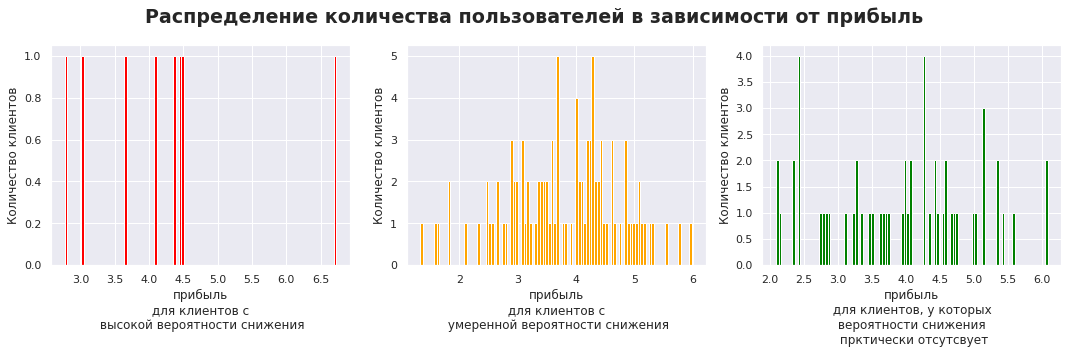

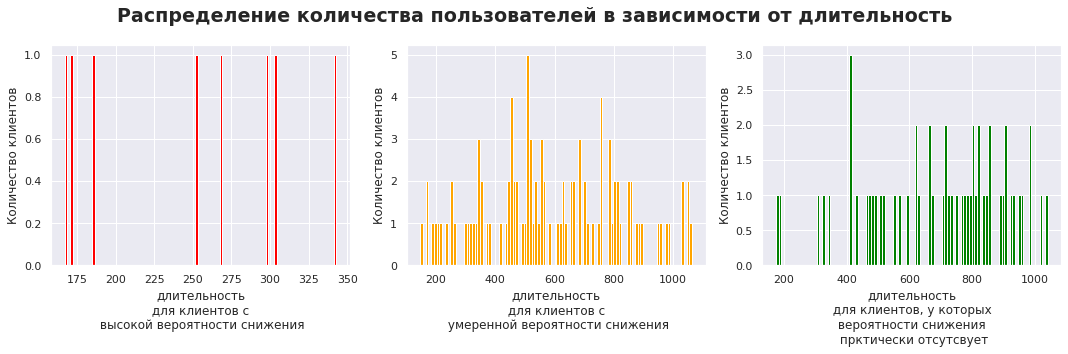

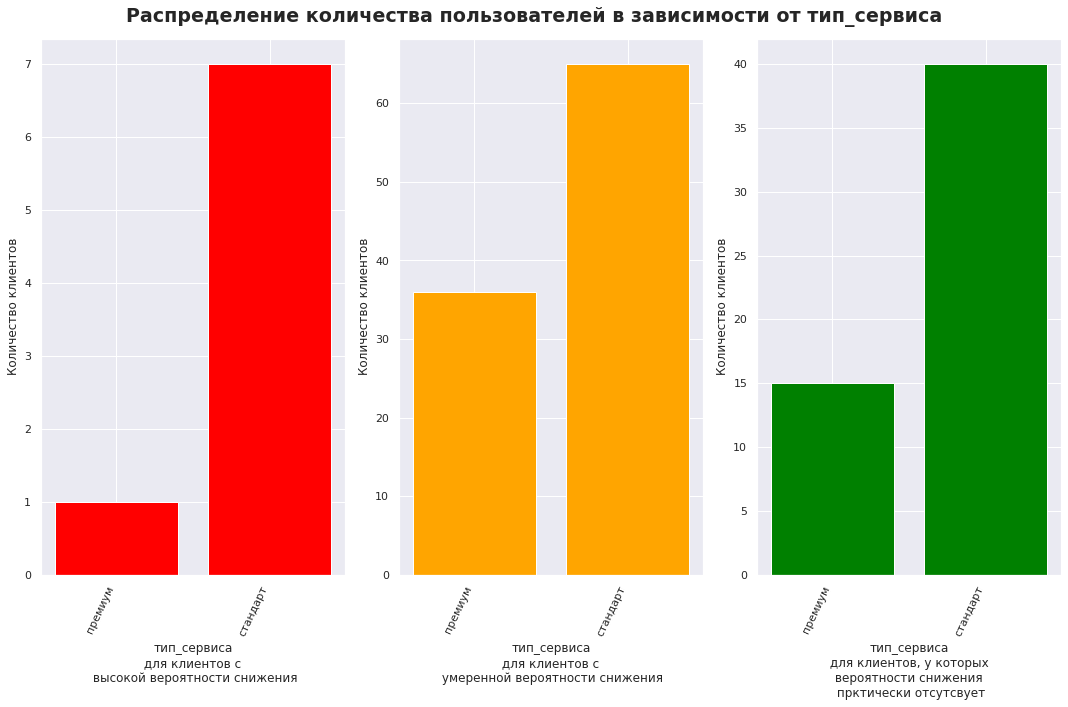

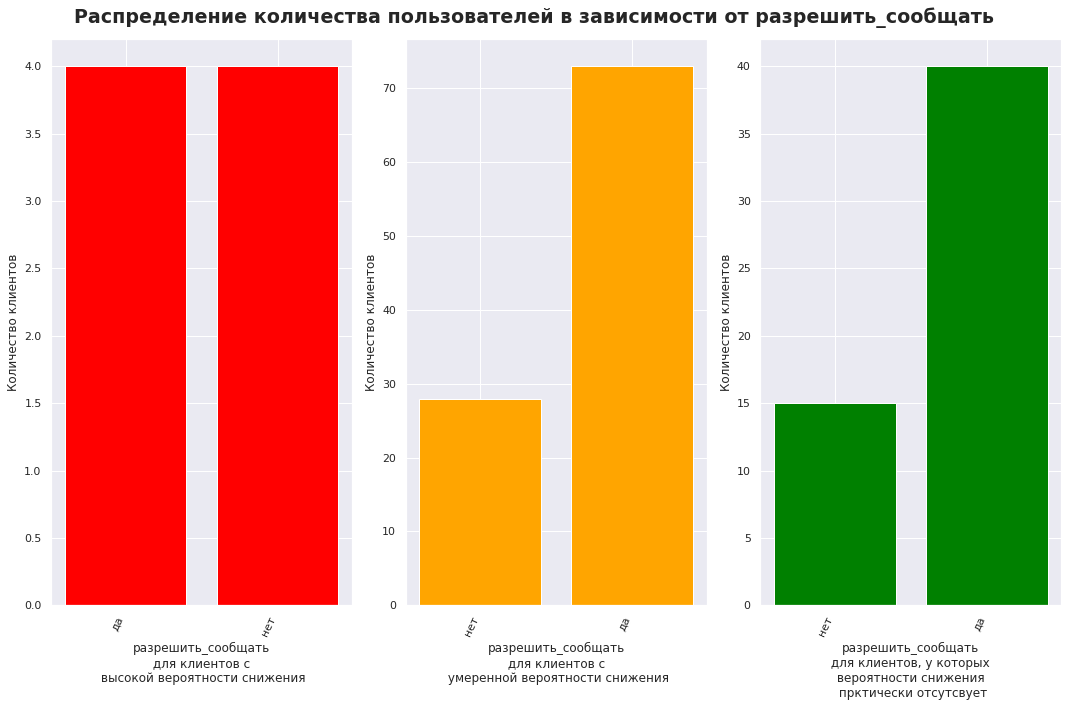

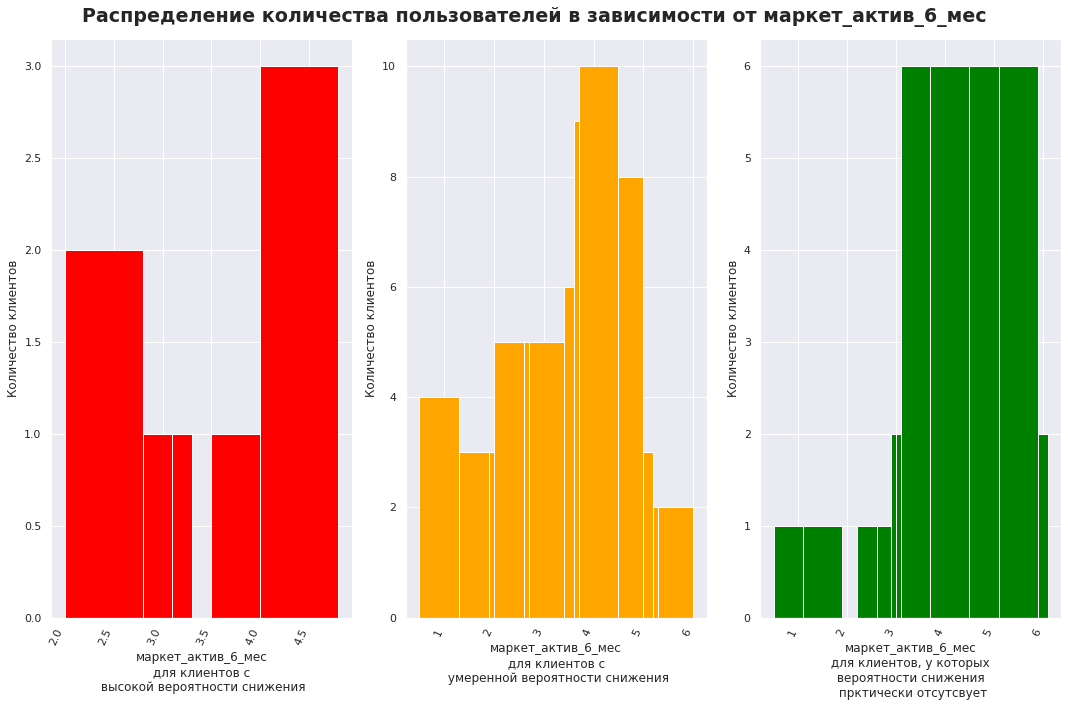

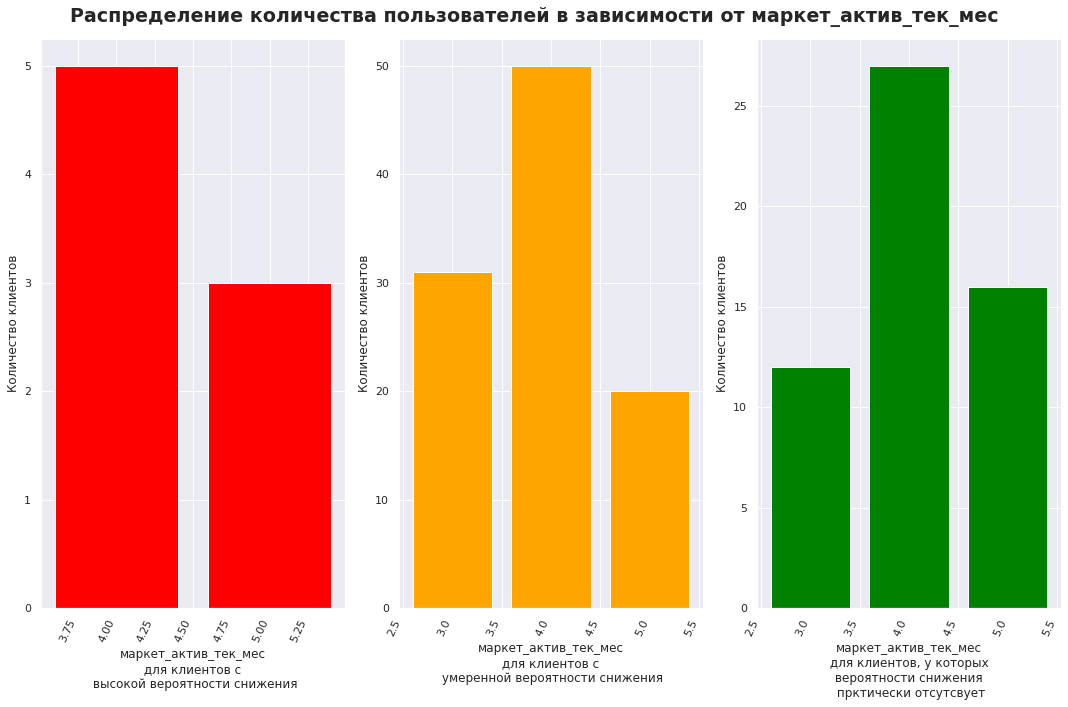

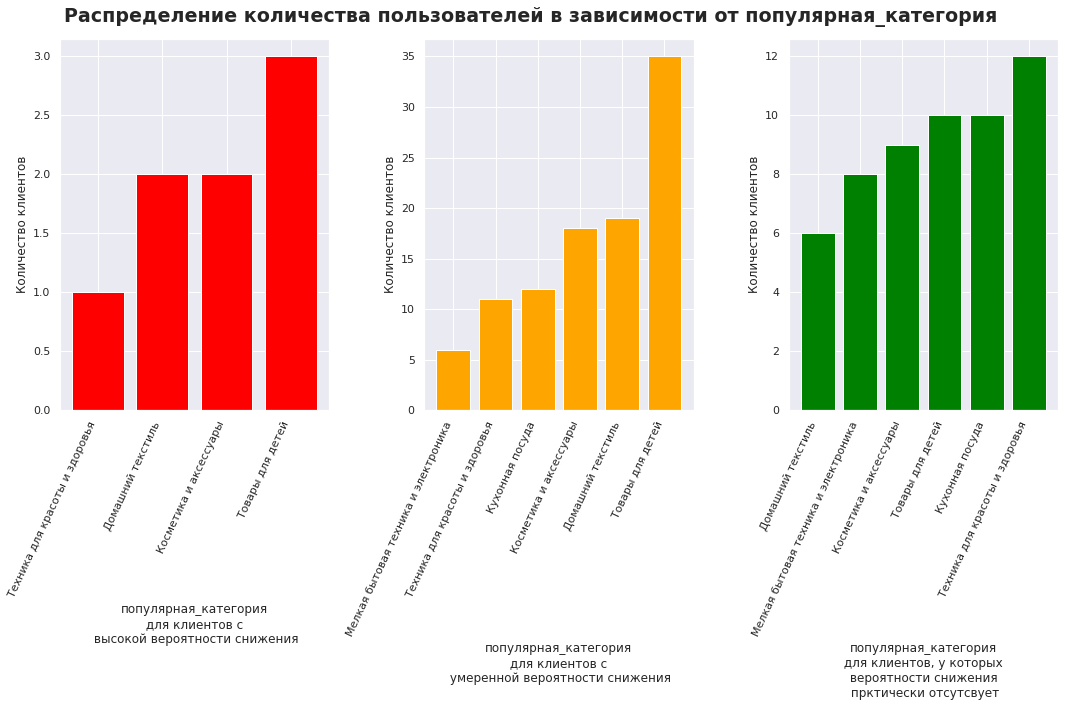

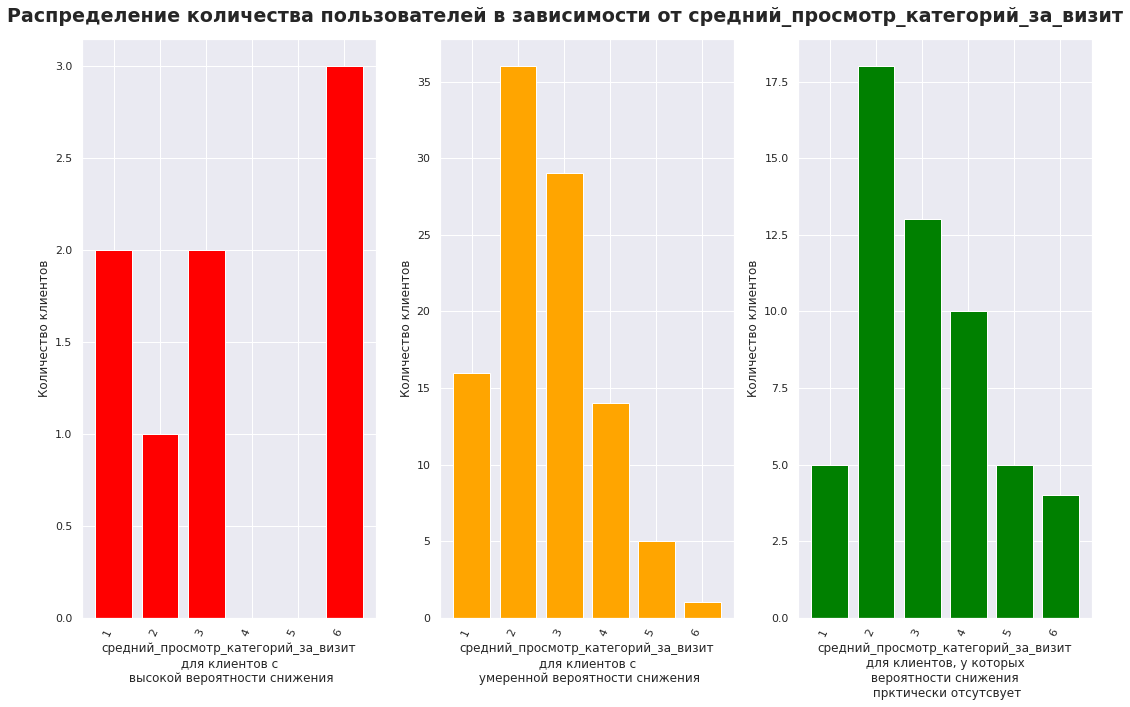

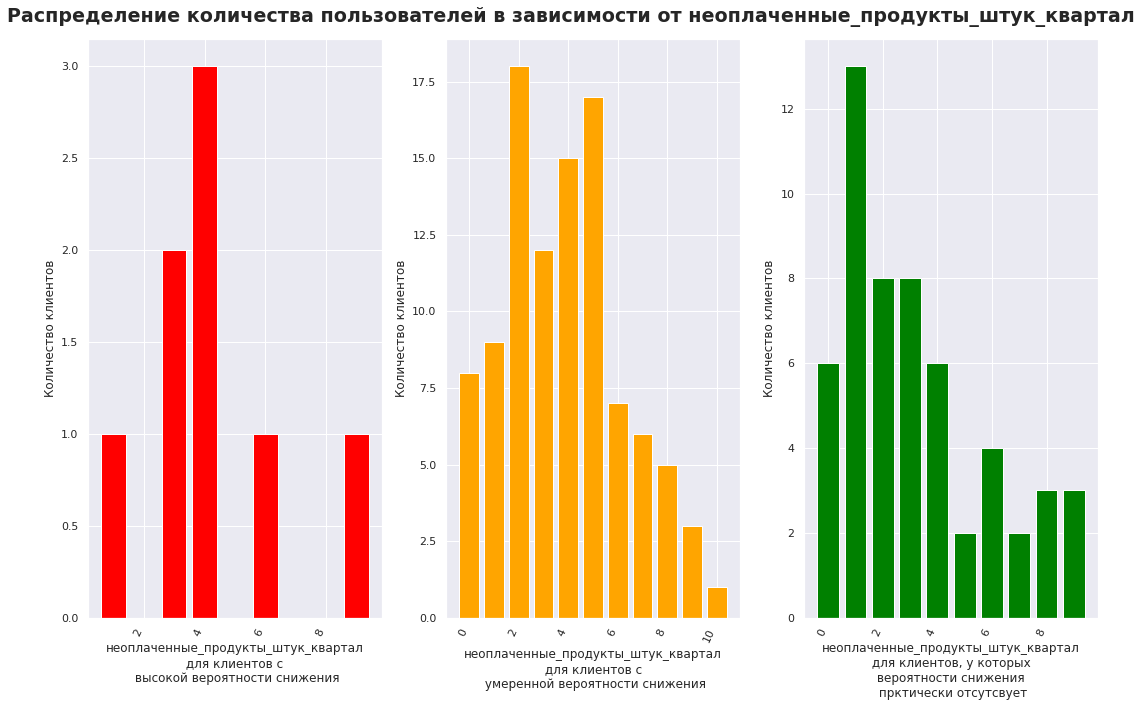

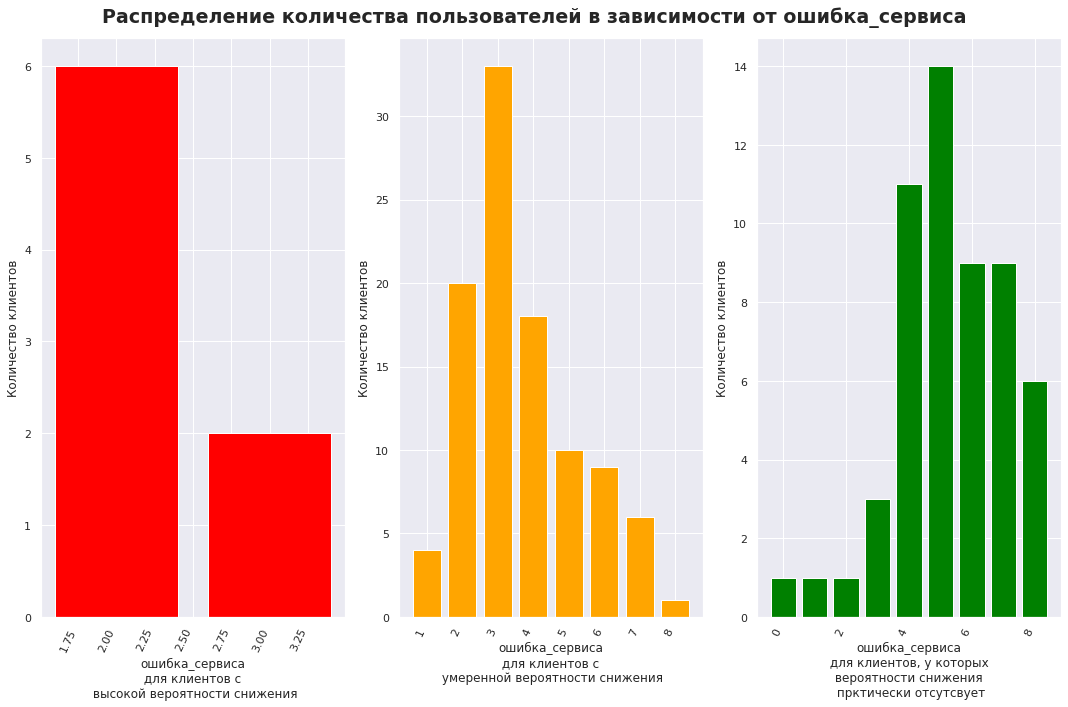

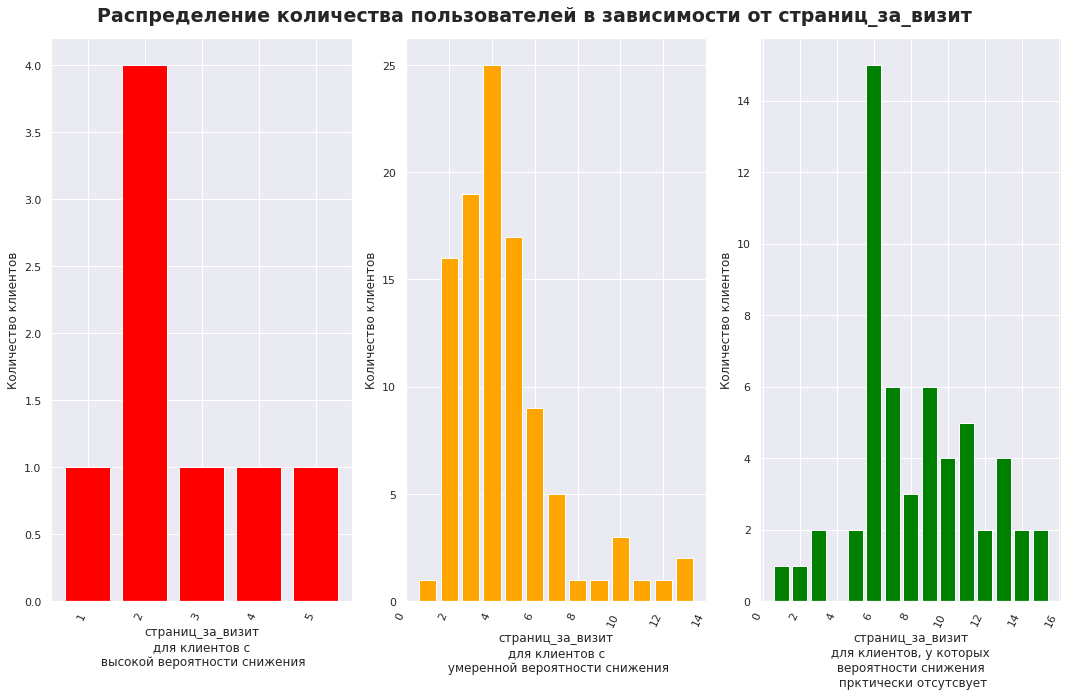

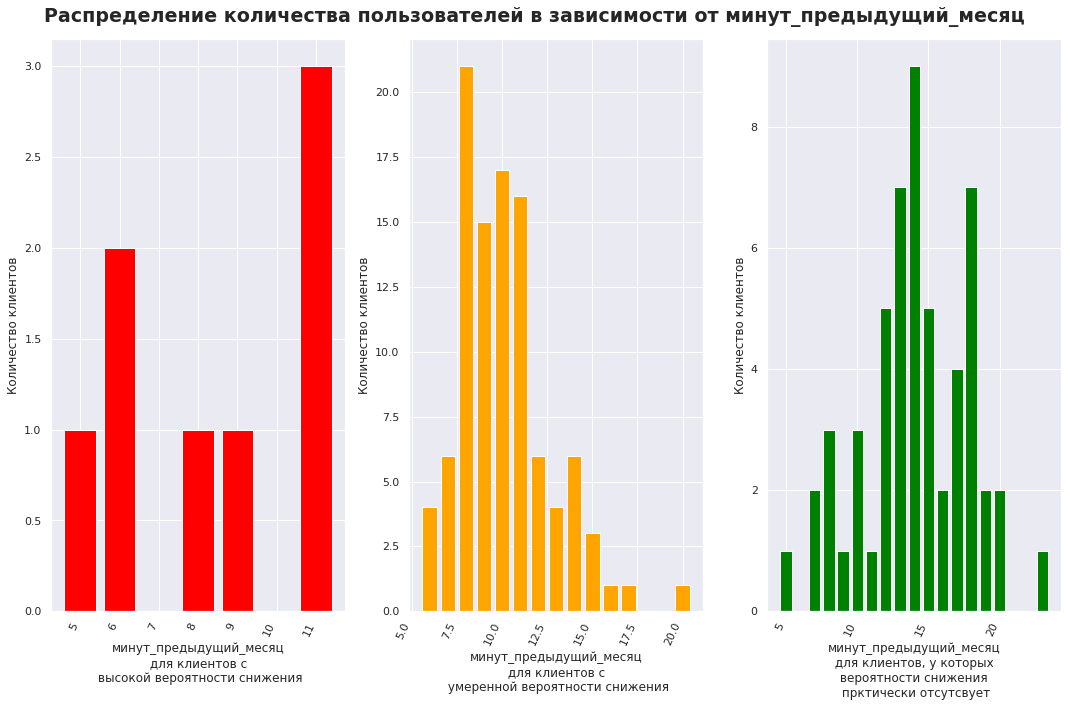

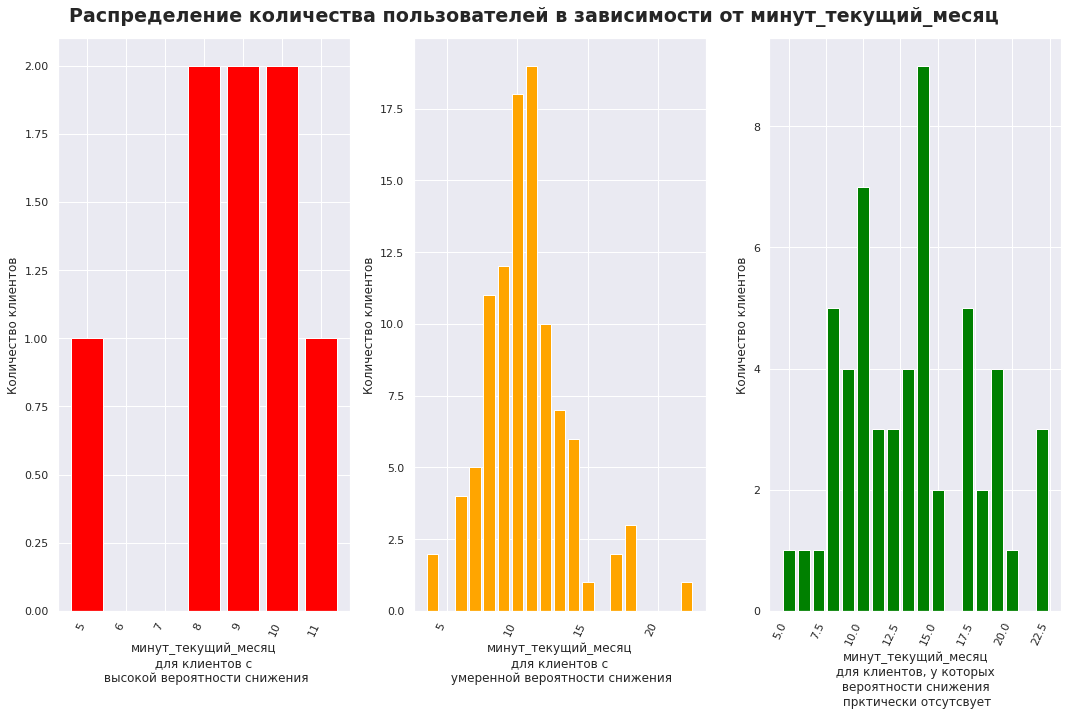

In [124]:
for elem in noncat_inter_list:
    seg_noncat_indicator_inter(auction_goods, elem)

for elem in other_list:
    seg_noncat_discr_cat_indicator(auction_goods, elem)

### Выводы по результату анализа первого сегмента клиентов и рекомендации заказчику:

**По результатам анализа сегмента клиентов с высокой вероятностью снижения покупательской активности и с максимальной долей покупок по акции можно сделать следующие выводы:**

1) Согласно распределению показателя "акционные_покупки", у большинства клиентов доля акционных покупок в общем объем покупок составляет до 30%, одновременно далее визуализируются отдельные "пики" с образованием отдельного распределения числа клиентов, у которых доля акционных покупок в общем объем покупок составляет более **89%, - такие клиенты и образуют сегмент клиентов с максимальной долей покупок по акции**.

2) Таким образом, из общего числа анализируемых клиентов (1 299 клиентов) **только 12,6% клиентов или 164 клиента имеют максимальную долю покупок по акции**, превышающую 89% от общего объема покупок.

3) Вместе с тем, из указанных 164 клиентов, вероятность снижения покупательской активности, оцененная с использованием результатов моделирования целевого признака:
- для 55 клиентов оценивается как практически отсутствующая (то есть с учетом значений признаков для указанных клиентов ожидается, что указанные клиенты с большей вероятностью сохранят свою покупательскую активность на прежнем уровне);
- для 101 клиента оценивается как умеренная (то есть в настоящих условиях их покупательская активность с большей вероятностью сохраниться на прежнем уровне, но вместе с тем, риски ее снижения не исключены);
- для **8 клиентов** оценивается как высокая (то есть указанные клиенты с большей вероятностью сократят свою покупательскую активность): целевая аудитория для рассматриваемого сегмента клиентов.

4) Большинство клиентов из «красной» группы риска (высокая вероятность снижения покупательской активности) приносят продавцам **в среднем 4,5 условные единицы прибыли**, в то время как клиенты из «умеренной» группы – от 3 до 4,5 условных единиц прибыли с «пиками» в 3,8 и в 4,5 условные единицы, а клиенты из «зеленой» группы – практически равномерно распределены на всем диапазоне значений прибыли с явными «пиками» в 2,5, в 4,3 и 5,2 условные единицы прибыли.

5) Клиенты из «красной» группы относительно **недавно зарегистрировались** на сайте (от полугода до 11 месяцев), а большинство клиентов из «умеренной» и «зеленой» групп – зарегистрированы на сайте около 1,5 лет.

6) Большинство клиентов из всех групп риска осуществляют покупки **на условиях «стандарт»**, вместе с тем, у «умеренной» группы 35 клиентов из 101 имеют подписку, а в «зеленой» группе имеют подписку 15 клиентов из 55.

7) Клиенты из «красной» группы риска распределены **поровну в отношении разрешения о направлении дополнительной информации** о товарах, для двух других групп значительно преобладает количество клиентов, давших согласие на рассылку.

8) Большинство клиентов из «красной» группы были **охвачены маркетинговыми коммуникациями в объеме 4,5 единиц в последние 6 месяцев и в объеме до 4-5 единиц в текущем месяце**, клиенты из «умеренной» группы – 4 и 4 соответственно, а клиенты из «зеленой» группы – от 4 до 6 единиц коммуникации в последние 6 месяцев и 4 единицы в текущем месяце.

8) Для большинства клиентов из «красной» группы популярной категорией являются **товары для детей**, из «умеренной» группы – аналогично, из «зеленой» группы – предпочтения практически равномерно распределены между категориями с небольшим преобладанием категории товаров «Техника для красоты и здоровья».

9) Большинство клиентов из «красной» группы просматривали **около 6 категорий товаров**, из «умеренной» - 2-3 категории, а из «зеленой» - 2 категории.

10) Клиенты из «красной» группы гораздо **реже сталкивались с ошибками** при работе сервиса, чем клиенты из других групп.

11) Большинство клиентов из «красной» группы **просматривали 2 страниц за визит**, из «умеренной» - 3-4 страницы, а из «зеленой» - 7 страниц.

12) Большинство клиентов из «красной» группы **не оплачивали 4 товара**, положенных в корзину, из «умеренной» группы – 2,4 или 5, а из «зеленой» группы – 1.

13) Большинство клиентов из «красной» группы **в текущем месяце провели на сайте 8-10 минут, а в предыдущем – 11 минут**,  из «умеренной» группы – 11 минут в текущем месяце и 8 минут в предыдущем, а из «зеленой» группы – по 15 минут в каждый из периодов, при этом некоторые клиенты из указанной группы провели на сайте больше 20 минут.

Таким образом, группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности – это преимущественно недавно зарегистрировавшиеся клиенты, чье продуктовое поведение и поведение на сайте свидетельствует в пользу того, что **указанные клиенты нацелены на приобретение акционных, приемущественно детских, товаров и целенаправленно их ищущие**, одновременно они приносят прибыль в большенстве своем на уровне 4,5 единицы прибыли, что больше медианного значения для указанного показателя.

Учитывая вышеизложенное, а также с учетом того, что на указанную группу клиентов приходиться незначительная доля от общего их числа, **полагается нецелесообразным рассматривать эту категорию как целевую** и предпринимать нацеленные на сохранение их покупательской активности действия, ведь указанное может сопровождаться необоснованными потерями для бизнеса (**затраты с большей долей вероятности не окупят эффект**).

Вместе с тем, можно предложить **универсальные подходы**, которые способны сохранить или даже увеличить покупательскую активность всех клиентов, в том числе и рассматриваемую группу клиентов:
- проводить ограниченные по времени акции (они создают эффект срочности и побуждают клиентов действовать быстро) и добавить триггеры срочности («Остался 1 товар по этой цене»);
- предлагать сопутствующие товары или услуги (кросс-продажи позволяют увеличить средний чек и повысить прибыль, что наиболее актуально в отношении детских товаров);
- организовывать события для вовлечения аудитории (например, запуск новинок с презентациями);
- улучшать позиционирование продукта (нужно выделить уникальные преимущества товара или услуги, показать покупателю ценность);
- упростить навигацию (умный поиск, фильтры);
- расширение визульного и информационного наполнения страниц;
- предусмотреть форму обратной связи с клиентами (в том числе возможность оставлять отзыв о товаре и опыте взаимодействия с сайтом, проводить опросы и собирать обратную связь): это поможет скорректировать стратегию и улучшить процессы;
- оптимизировать работу сайта таким образом, что бы после предусмотренных изменений и расширений количество ошибок, возникающих при работе с платформой, не увеличивалось.

---

### Анализ сегмента по купателей с высокой вероятностью снижения покупательской активности и с наиболее высокой прибыльностью:

**Согласно анализу показателя "прибыль" (значение прибыли в условных единицах), осуществленном на третьем шаге "Исследовательский анализ данных":**
- минимальное значение показателя – 0,86 условных единиц, а **максимальное – 7,4 условные единицы**;
- медианное значение показателя – 4 единиц, а среднее – 3,99;
- большинство значений сосредоточено на уровне 4,3 условных единиц и 4,8 условных единиц;
- одновременно, выявлено множество выбросов данных, в том числе большие значения в диапазоне **от 6,5 условных единиц и выше: такие клиенты и образуют сегмент клиентов с наиболее высокой прибыльностью**.

Вместе с тем, в целях избежания сильной потери данных, для целей последующего анализа **представляется целесообраным отобрать клиентов с прибыльностью более 5 условных единиц**, что значительно выше как среднего, так и медианного значения. 

In [125]:
# Формирование выбороки данных:
profit_client = market_segment.loc[market_segment['прибыль'] >= 5]

print(f'Из общего числа анализируемых клиентов ({len(market_segment)} клиентов) \
      только {round((len(profit_client)/len(market_segment))*100,2)}% \
      клиентов или {len(profit_client)} клиентов \
      имеют наиболее высокую прибыльность.')

Из общего числа анализируемых клиентов (1299 клиентов)       только 16.32%       клиентов или 212 клиентов       имеют наиболее высокую прибыльность.


In [126]:
# Группировка "целевых" клиентов по статусу риска:
print('Распределение клиентов по статусу риска:')
display(profit_client.pivot_table(index= 'вероятность_снижения', values= 'id', aggfunc= 'count'))

Распределение клиентов по статусу риска:


,id
вероятность_снижения,
высокая,10
отсутствует,134
умеренная,68


С утом результатов моделирования в группе риска клиентов с наиболее высокой прибыльностью - клиенты с высокой вероятностью снижения покупательской активности - находятся 10 клиентов, 68 клиентов находится в "пограничном" статусе" и у 134 клиентов такой риск оценивается как практически отсутсвующий.

In [127]:
noncat_inter_list = ['прибыль', 'длительность', 'акционные_покупки']
other_list = ['тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес',
              'маркет_актив_тек_мес', 'популярная_категория', 'средний_просмотр_категорий_за_визит',
              'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минут_предыдущий_месяц',
              'минут_текущий_месяц']

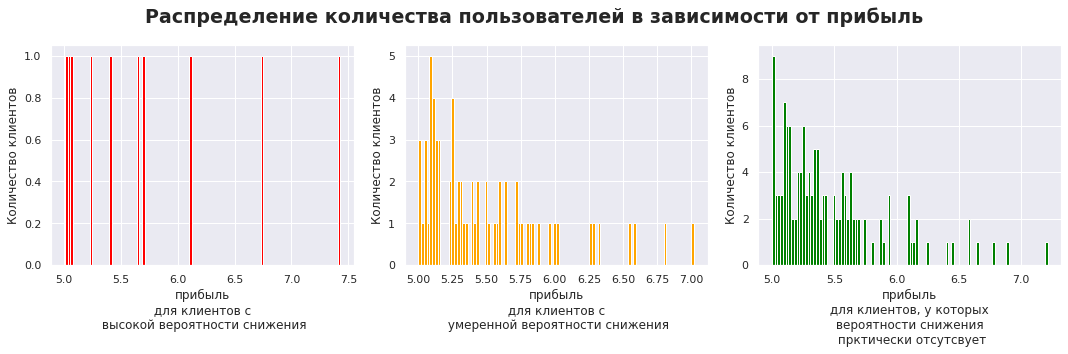

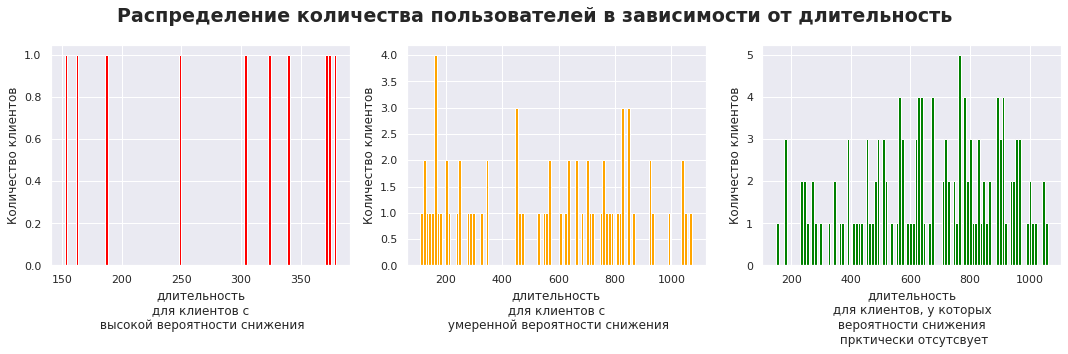

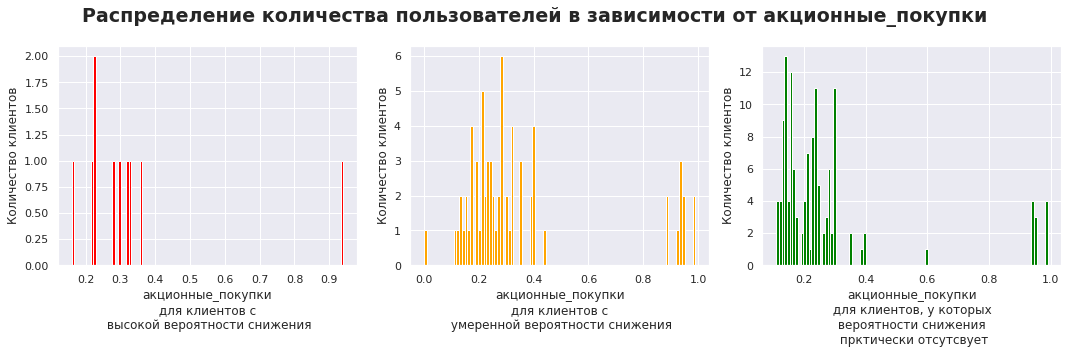

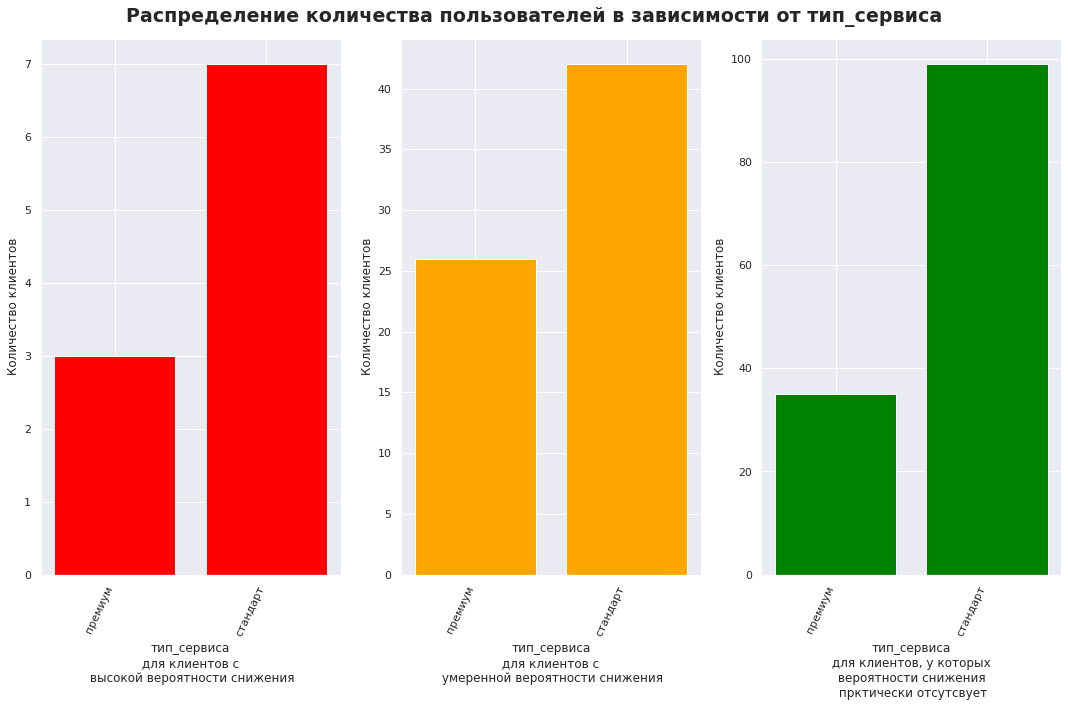

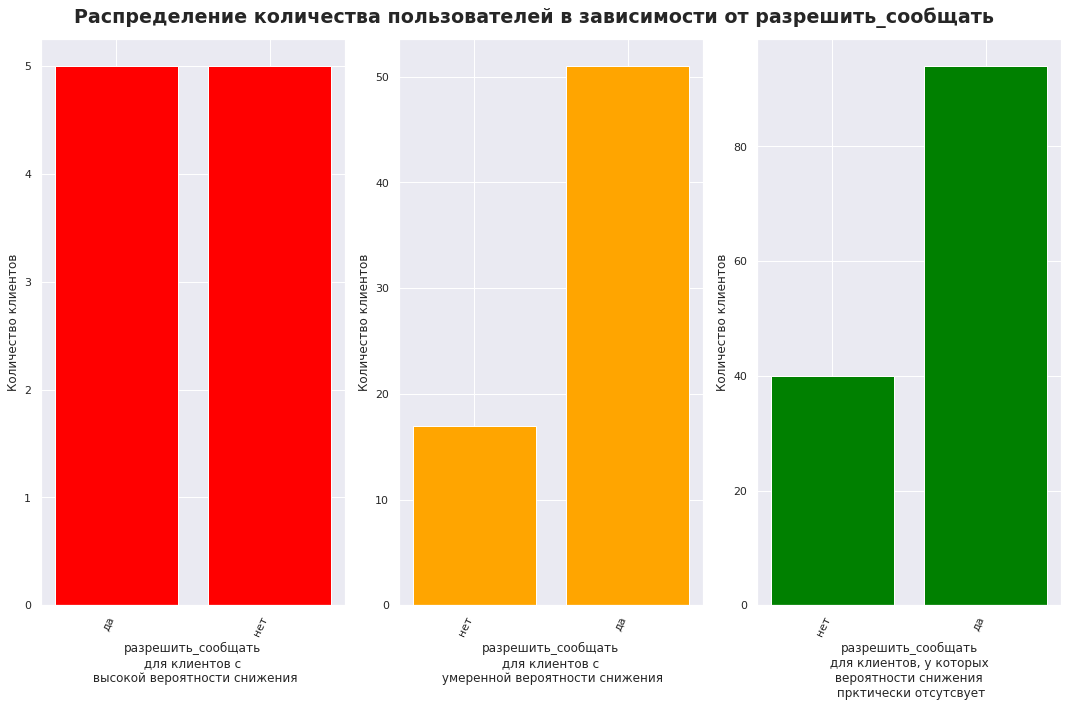

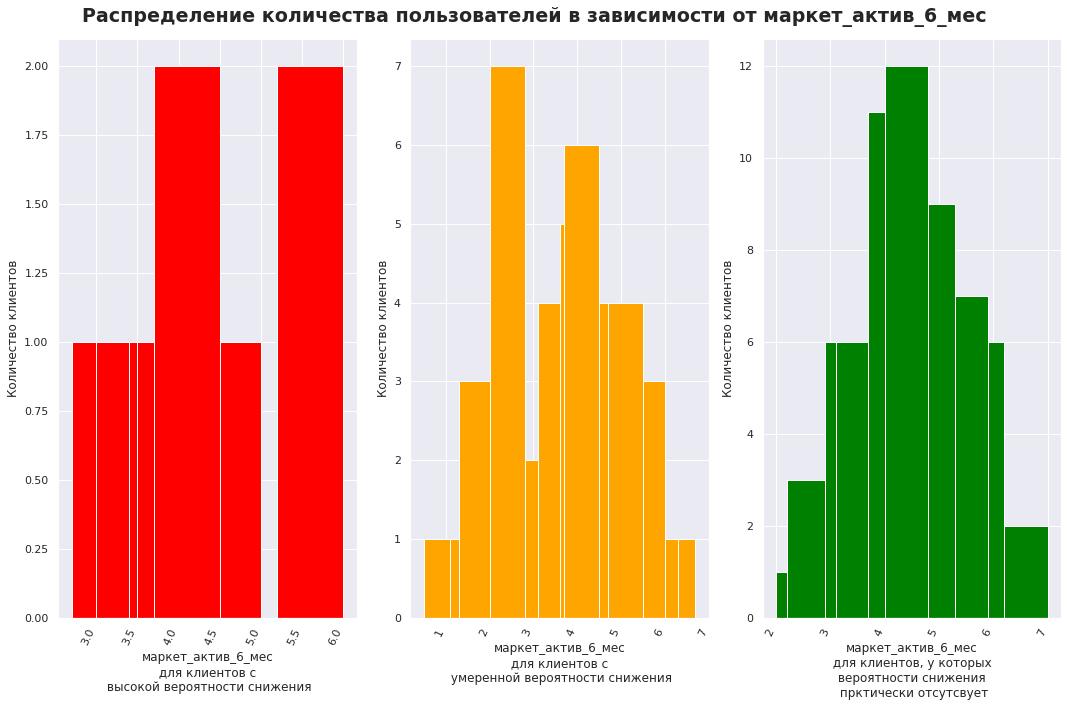

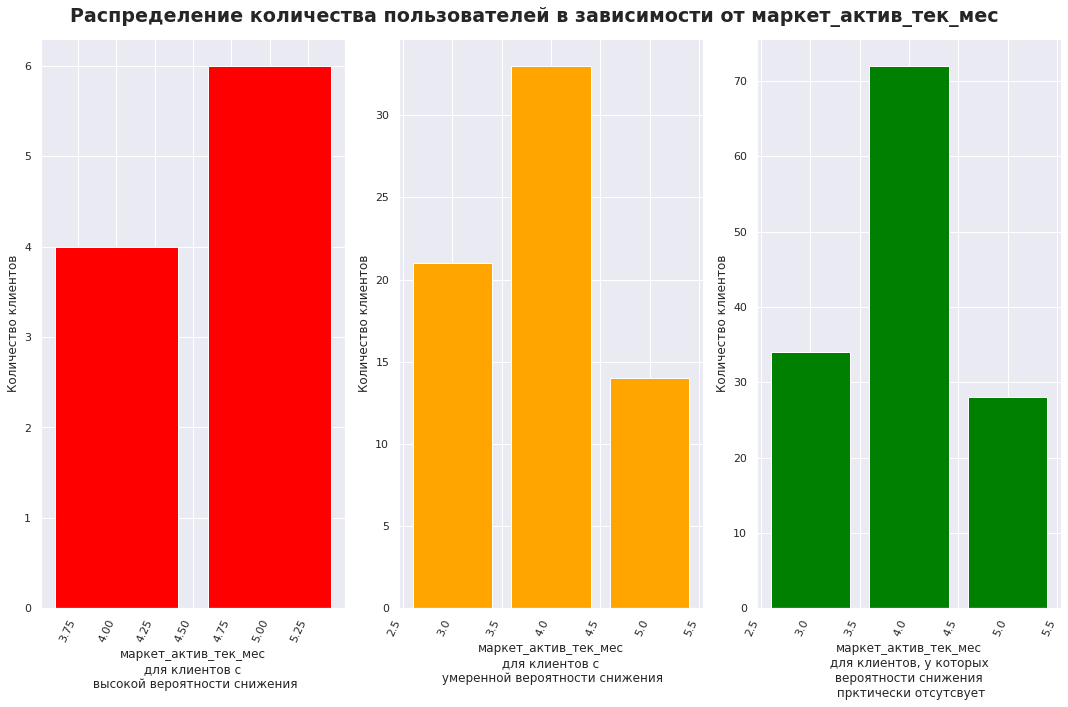

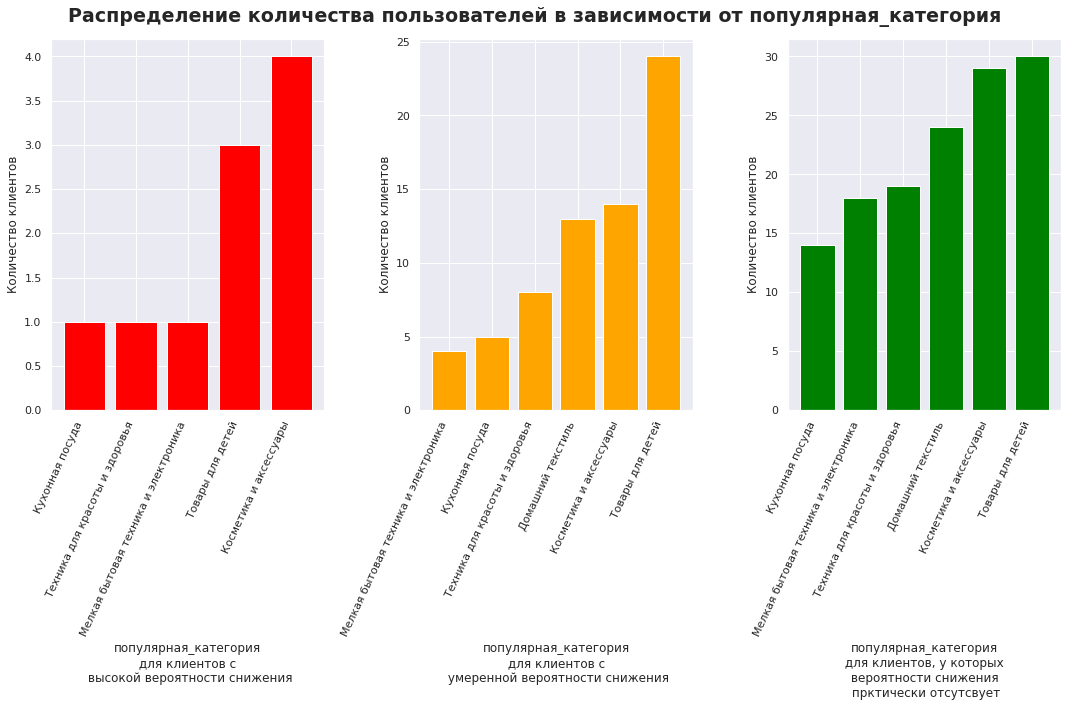

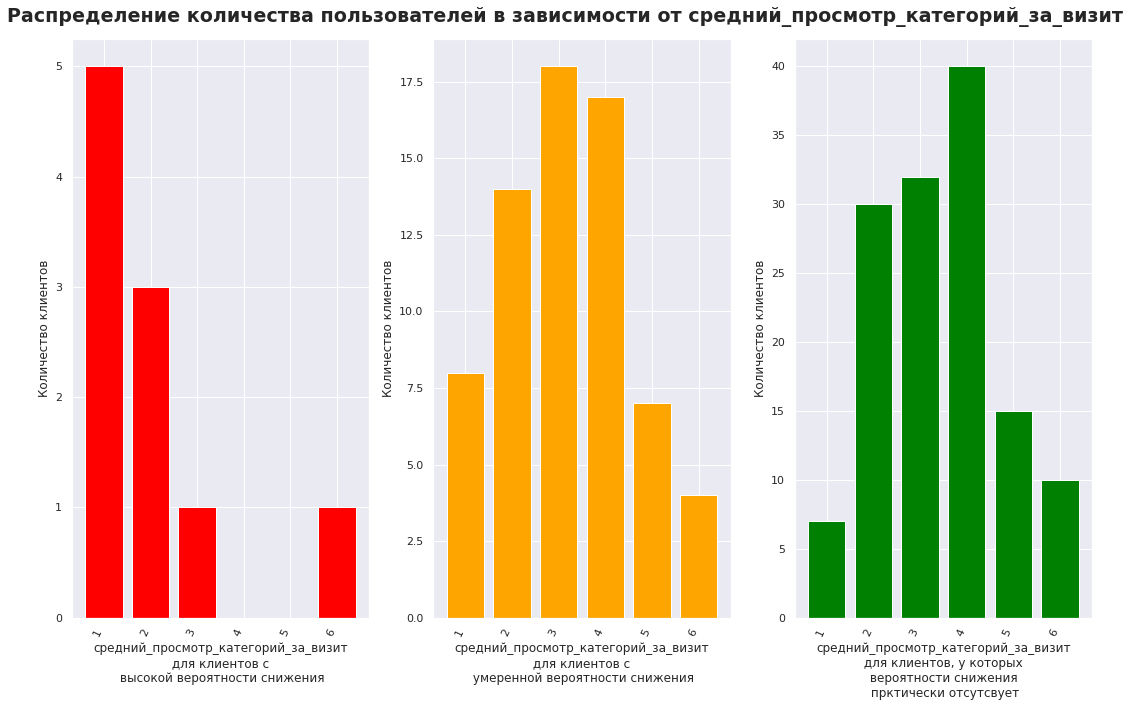

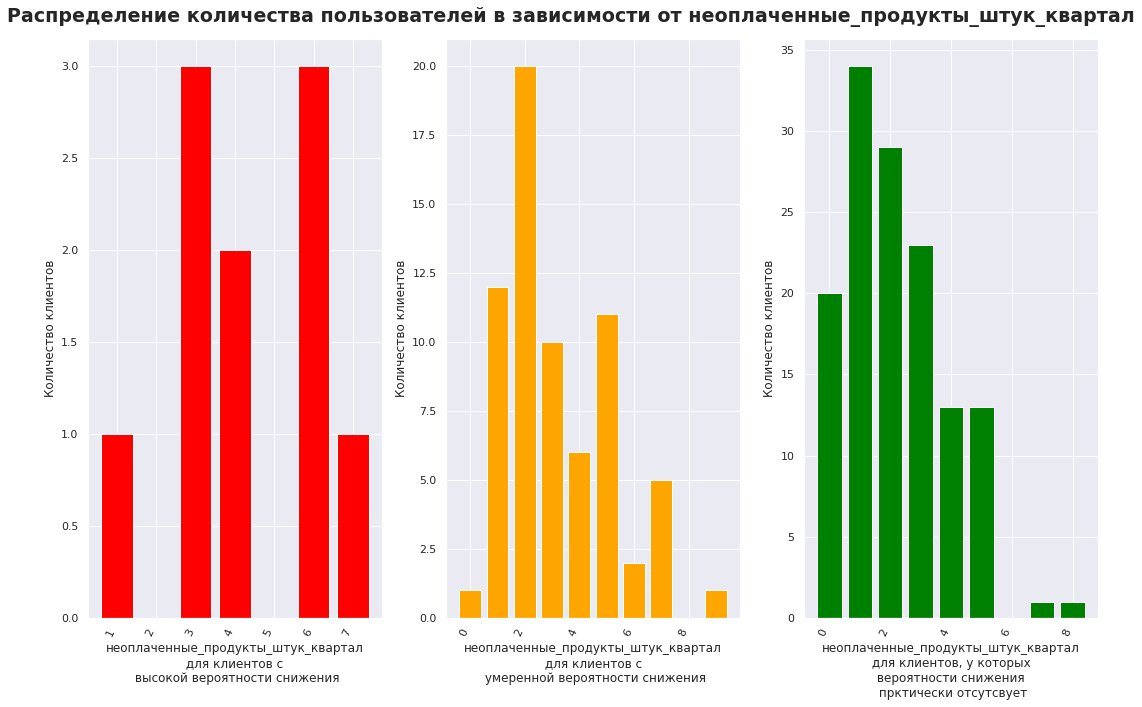

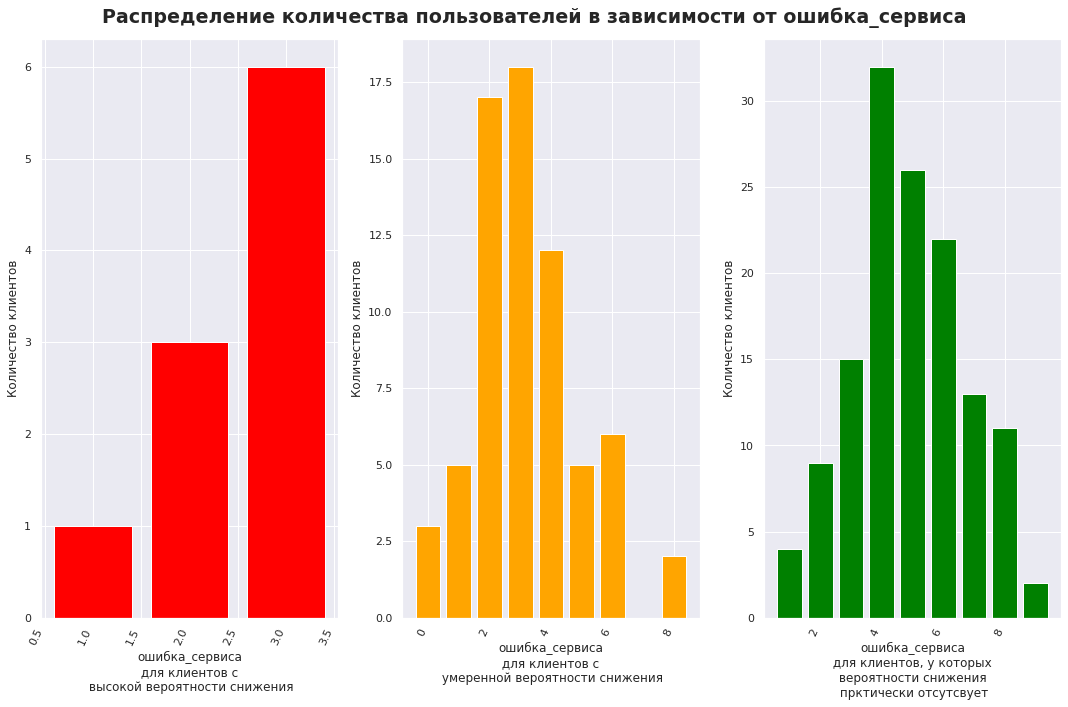

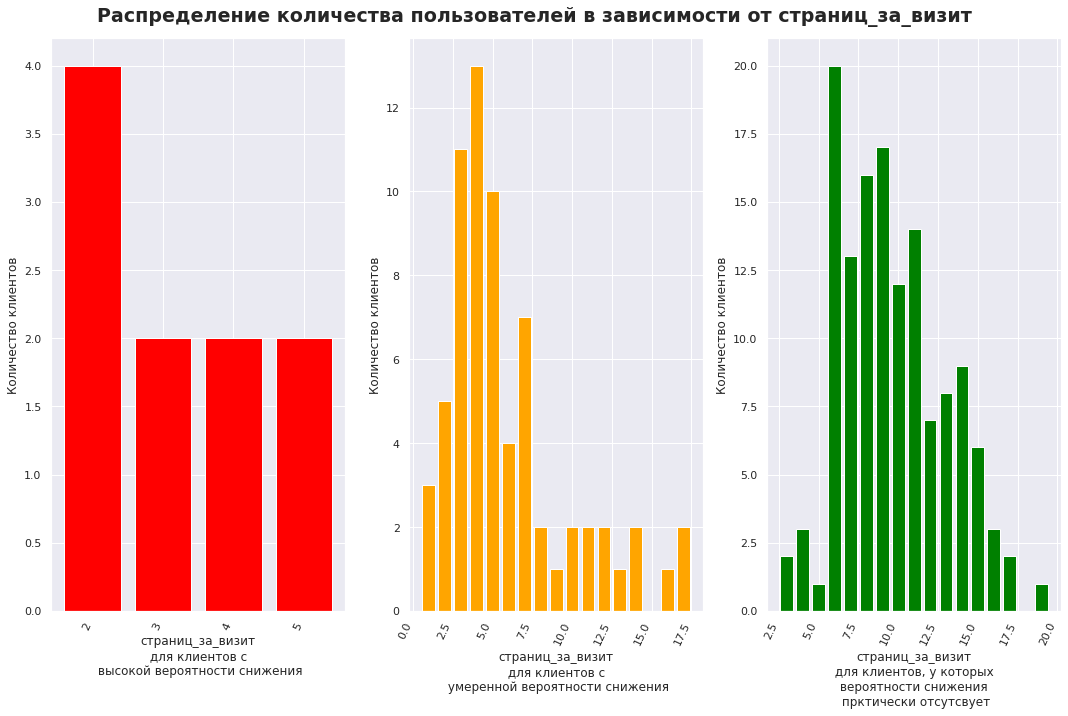

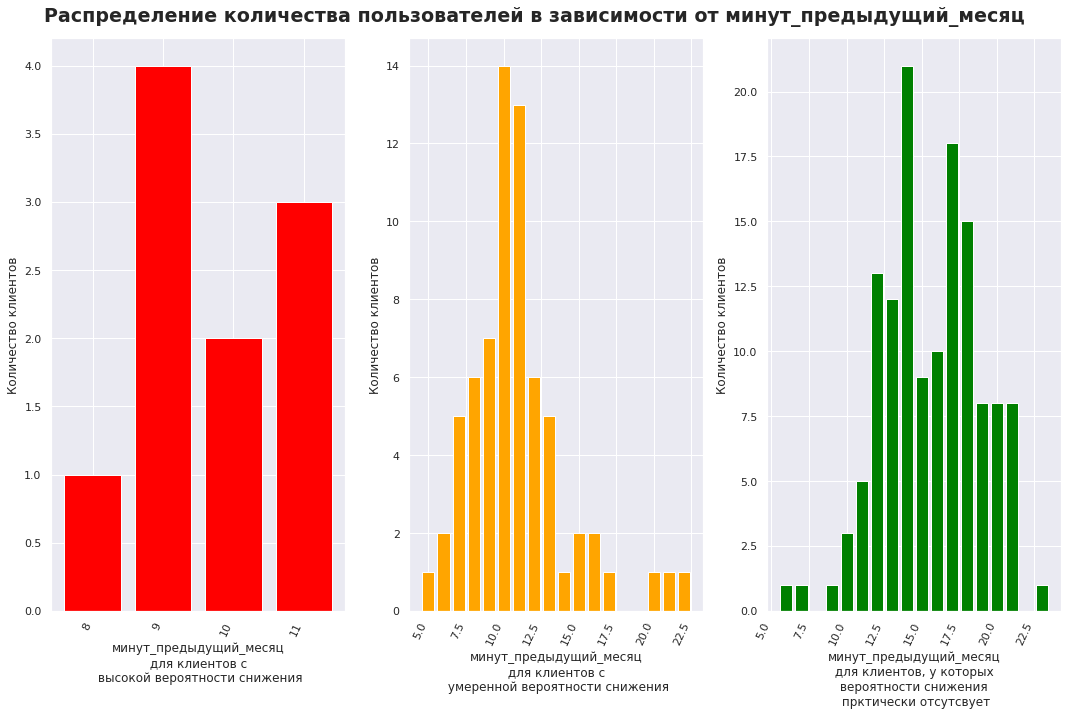

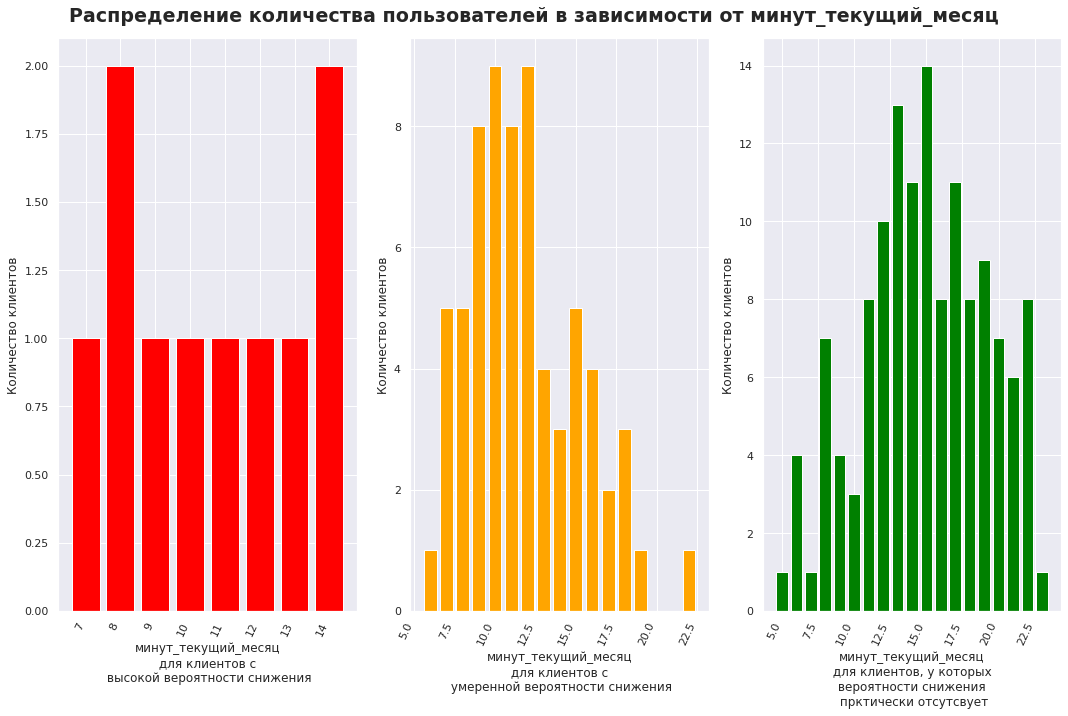

In [128]:
for elem in noncat_inter_list:
    seg_noncat_indicator_inter(profit_client, elem)

for elem in other_list:
    seg_noncat_discr_cat_indicator(profit_client, elem)

### Выводы по результату анализа второго сегмента клиентов и рекомендации заказчику:

**По результатам анализа сегмента клиентов с высокой вероятностью снижения покупательской активности и с  наиболее высокой прибыльностью можно сделать следующие выводы:**

1) Согласно анализу показателя "прибыль": максимальное значение показателя – 7,4 условные единицы прибыли; медианное значение показателя – 4 единицы, а среднее – 3,99 единиц; большинство значений сосредоточено на уровне 4,3 условных единиц и 4,8 условных единиц; одновременно, выявлено множество выбросов данных, в том числе большие значения в диапазоне **от 6,5 условных единиц и выше: такие клиенты и образуют сегмент клиентов с наиболее высокой прибыльностью**.<br>
Вместе с тем, в целях избежания сильной потери данных, для целей последующего анализа представляется **целесообраным отобрать клиентов с прибыльностью более 5 условных единиц**, что значительно выше как среднего, так и медианного значения.

2) Таким образом, из общего числа анализируемых клиентов (1 299 клиентов) **только 16,3% клиентов или 212 клиентов имеют наиболее высокую прибыльность (более 5 условных единицы)**.

3) Вместе с тем, из указанных 212 клиентов, вероятность снижения покупательской активности, оцененная с использованием результатов моделирования целевого признака:
- для 134 клиентов оценивается как практически отсутствующая (то есть с учетом значений признаков для указанных клиентов ожидается, что указанные клиенты с большей вероятностью сохранят свою покупательскую активность на прежнем уровне);
- для 68 клиентов оценивается как умеренная (то есть в настоящих условиях их покупательская активность с большей вероятностью сохраниться на прежнем уровне, но вместе с тем, риски ее снижения не исключены);
- для **10 клиентов оценивается как высокая** (то есть указанные клиенты с большей вероятностью сократят свою покупательскую активность): целевая аудитория для рассматриваемого сегмента клиентов.

4) Вместе с тем распределение клиентов из «красной» группы риска по показателю **«прибыль» весьма неравномерна** и визуализируется на всем диапазоне значений от 5 до 7,4 условных единиц прибыли (то есть максимальное значение показателя попало в указанную группу клиентов), большинство клиентов из «умеренной» и «зеленой» групп клиентов приносят около 5-5,2 условных единиц прибыли.

5) Клиенты из «красной» группы **зарегистрированы на сайте от 5 месяцев до 1,5 лет**, большинство клиентов из «умеренной»  зарегистрированы на сайте от полугода до 2,2 лет, а из «зеленой» группы – от 2-х до почти трех лет. 

6) Для большинства клиентов из всех групп характерны покупки **с незначительных объемом акционных товаров** (до 30% от общего объема покупок).

7) Большинство клиентов из всех групп риска осуществляют покупки **на условиях «стандарт»**, вместе с тем, у «красной» группы 3 клиента из 10 имеют подписку, у «умеренной» группы 26 клиентов из 68 имеют подписку, а в «зеленой» группе имеют подписку 38 клиентов из 134.

8) Клиенты из «красной» группы риска распределены **поровну в отношении разрешения о направлении дополнительной информации о товарах**, для двух других групп значительно преобладает количество клиентов, давших согласие на рассылку.

9) Большинство клиентов из «красной» группы были охвачены **маркетинговыми коммуникациями в объеме 4 - 5,5 единиц в последние 6 месяцев и в объеме 5 единиц в текущем месяце**, клиенты из «умеренной» группы – около 3 и 4 соответственно, а клиенты из «зеленой» группы –до 5 единиц коммуникации в последние 6 месяцев и 4 единицы в текущем месяце.

10) Для большинства клиентов из «красной» группы популярной категорией товаров являются **косметика и аксессуары**, из «умеренной» группы – товары для детей, из «зеленой» группы – товары для детей и косметика и аксессуары.

11) Большинство клиентов из «красной» группы просматривали **1 категорию товаров**, из «умеренной» - 3-4 категории, а из «зеленой» - 4 категории.

12) Клиенты из «красной» группы сталкивались с **ошибками при работе сервиса в большинстве случаев 3 раза**, из «умеренной» - 2-3 раза, а из «зеленой» - 4 раза.

13) Большинство клиентов из «красной» группы просматривали **2 страницы за визит**, из «умеренной» - 3 страницы, а из «зеленой» - 6 страниц.

14) Большинство клиентов из «красной» группы **не оплачивали 3 или 6 товаров**, положенных в корзину, из «умеренной» группы – 2 товара , а из «зеленой» группы – 1 товар.

15) Большинство клиентов из «красной» группы **в текущем месяце провели на сайте 14 или 8 минут, а в предыдущем – 9 минут**,  из «умеренной» группы – 10-12 минут в обоих периодах, а из «зеленой» группы – по 14-15 минут в каждый из периодов.

Таким образом, несмотря на относительно небольшую долю клиентов с высокой вероятностью снижения покупательской активности и с  наиболее высокой прибыльностью в общем объеме анализируемых клиентов, "развитие" указанной группы клиентов **имеет большой потенциал для сервиса**.

Для такой категории клиентов эффект от реализации предложений, предложенных ранее в рамках анализа первого сегмента клиентов, может оказаться существенным.

Вместе с тем, в целях сокранения / увеличения покупательской активности рассматриваемой группы клиентов предлагается рассмотреть возможность **внедрения программы лояльности**, так вознаграждения могут включать накопительные баллы, скидку на следующую покупку или эксклюзивный доступ к специальным предложениям, что будет стимулировать повторные покупки и укрепление привязанности клиента к сервису.

---

## Шаг 9. Общий вывод по результатам исследования: 

**В рамках анализа покупательской активности клиентов интернет-магазина «В один клик» в целях определения рекомендаций сервису в части персонализации предложений постоянным клиентам для увеличения их покупательской активности:**

<span style="background-color:#E8D3E3">1) Осуществлены загрузка и чтение исходных данных, их первичная предобработка и анализ:</span>

Предметная область исследования представлена **четырьмя датасетами-исходниками**:
- market_file.csv - **данные о поведении покупателя** на сайте, о коммуникациях с покупателем и его продуктовом поведении: датасет содержит 1 300 записей в разрезе 13 показателей;
- market_money.csv - **данные о выручке**, которую получает магазин с покупателя (то есть сколько покупатель всего потратил за период взаимодействия с сайтом): датасет содержит 3 900 записей в разрезе 3 показателей;
- market_time.csv - **данные о времени** (в минутах), которое покупатель провёл на сайте в течение периода: датасет содержит 2 600 записей в разрезе 3 показателей;
- money.csv - **данные о среднемесячной прибыли продавца** за последние 3 месяца (какую прибыль получает магазин от продаж каждому покупателю): датасет содержит 1 300 записей в разрезе 2 показателей.

Загрузка и чтение датасетов-исходников **осуществлена успешно**, - к данным датасета "money" применен разделитель значений данных при загрузке.

**Данные в датасетах оцениваются как соответствующие описанию.**

Наименования ряда показателей изменены в целях их приведения в соответствие с наименованиями прочих столбцов _(применен "змеиный регистр")_, а также упрощения восприятия.<br>
Пропуски данных в показателях, а также неявные дубликаты, в датасетах отсутствуют.<br>
Типы данных в показателях оцениваются как соответствующие, при этом тип данных показателя "прибыль" датасета "money" оценивается как не соответствующий.

<span style="background-color:#E8D3E3">2) Осуществлена предобработка данных в датасетах – исходниках:</span>

По результатам предобработки данных датасета **"market_file"** можно сделать следующие выводы:
- во всех 13-ти показателях датасета отсутствуют пропуски данных;
- типы данных показателей оцениваются как соответствующие описываемым данным;
- выявлен и обработан неявный дубликат: значение "стандартт" показателя "тип_сервиса" заменен на "стандарт", во всех остальных случаях - неявные дубликаты и аномальные значения не выявлены.<br>
Таким образом, данные датасета "market_file" оцениваются как статистически значимые для целей последующего анализа.

По результатам предобработки данных датасета **"market_money"** можно сделать следующие выводы:
- во всех 3-х показателях датасета отсутствуют пропуски данных;
- типы данных показателей оцениваются как соответствующие описываемым данным;
- неявные дубликаты и аномальные значения не выявлены.<br>
Таким образом, данные датасета "market_money" оцениваются как статистически значимые для целей последующего анализа.

По результатам предобработки данных датасета **"market_time"** можно сделать следующие выводы:
- во всех 3-х показателях датасета отсутсвуют пропуски данных;
- типы данных показателей оцениваются как соответствующие описываемым данным;
- неявные дубликаты и аномальные значения не выявлены, вместе с тем выявлена и устранены орфографические ошибки при написании данных в показателе "период": "предыдцщий_месяц" заменен на "предыдущий_месяц", а также в написании слова "аксессуары" категории "Косметика и аксессуары" (было "аксесуары") в показателе "популярная_категория".<br>
Таким образом, данные датасета "market_time" оцениваются как статистически значимые для целей последующего анализа.

По результатам предобработки данных датасета **"money"** можно сделать следующие выводы:
- во всех 2-х показателях датасета отсутствуют пропуски данных;
- тип данных показателя "прибыль" изменен на вещественное значение (так как данные представлены числом со значением после запятой);
- неявные дубликаты и аномальные значения не выявлены.<br>
Таким образом, данные датасета "money" оцениваются как статистически значимые для целей последующего анализа.

<span style="background-color:#E8D3E3">3) Осуществлен исследовательский анализ данных всех показателей датасетов-исходников с учетом отбора клиентов (пользователей) с покупательской активностью не менее трёх месяцев:</span>

По результатам исследовательского анализа количественных данных датасета **"market_file"** были проанализированы данные по 1 300 клиентам в разрезе 12 показателей.

**Согласно анализу показателя "маркет_актив6мес" (среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев: это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента):**
- минимальное значение показателя - 0,9 единиц, а максимальное - 6,6 единиц;
- медианное значение показателя - 4,2 единиц, а среднее - 4,25 единиц;
- максимальное среднемесячное значение маркетинговых коммуникаций (от 6,1 до 14) приходилось на относительно небольшое количество клиентов (до 6 клиентов);
- при этом самая многочисленная группа клиентов (94 человека) была охвачена маркетинговыми коммуникациями в 4,1 единицу (практически на уровне медианного значения).

**Согласно анализу показателя "маркет_актив_тек_мес" (количество маркетинговых коммуникаций в текущем месяце):**
- минимальное значение показателя - 3 единицы, а максимальное - 5 единиц;
- медианное и среднее значения показателя - 4 единиц;
- в отношении 669 клиентов осуществлено 4 маркетинговых коммуникации, в отношении 323 клиентов – 5 и в отношении 308 клиентов – 3;

**Согласно анализу показателя "длительность" (значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте):**
- минимальное значение показателя - 110 дней, а максимальное – 1 079 дней (ресурс продолжает привлекать клиентов);
- медианное значения показателя - 606 дней, а среднее – 602 дня;
- показатель распределен неравномерно: имеется множество "пиков" на разных участках значений показателя – пользователи регистрировалась на сайте в разное время;
- длительность пребывания на сайте для большинства клиентов составляет около 500 дней, далее – около 280 дней (отмечена тенденция по «спаду» активности по привлечению клиентов – количество пользователей, зарегистрировавшихся менее, чем 200 дней назад, сопоставимо с количеством пользователей, зарегистрировавшихся более 1000 дней назад);
- среднее значение находится практически на уровне медианы;
- одновременно, выбросы данных не выявлены.

**Согласно анализу показателя "акционные_покупки" (среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев):**
- минимальное значение показателя – 0%, а максимальное – 99%;
- медианное значения показателя – 24%, а среднее – 32%;
- показатель распределен неравномерно: имеется множество "пиков" на разных участках значений показателя;
- доля аукционных покупок для большинства клиентов находится на уровне медианного значения – 32% от общего объема покупок, одновременно выявлен «разрыв» данных (вторая группа данных в диапазоне от 90% до 99%): имеется группа клиентов, для которых решение о покупки зависит от наличии акций;
- среднее значение находится справа от медианы (распределение признака смещено право) из-за наличия высоких значений (выявлены множественные "пики");
- одновременно, выявлены выбросы данных в диапазоне от 60% до 99%.

**Согласно анализу показателя "средний_просмотр_категорий_за_визит" (показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца):**
- минимальное значение показателя – 1 категория, а максимальное – 6 категорий;
- медианное значения показателя – 3 категории, а среднее – 3,3 категории;
- за рассматриваемый период 106 клиентов просмотрели 1 категорию, по две-три категории рассматривали большинство клиентов (312 и 356 клиентов соответственно), 4 категории рассмотрели 263 клиента, и пять-шесть только 177 и 86 клиентов соответсвенно.

**Согласно анализу показателя "неоплаченные_продукты_штук_квартал" (общее число неоплаченных товаров в корзине за последние 3 месяца):**
- минимальное значение показателя – 0 единиц товара, а максимальное – 10;
- медианное значения показателя – 3 товара, а среднее – 2,8;
- больше всего склонны не оплачивать товары клиенты, положившие в корзину один-три товара (740 клиентов – более половины всех клиентов из выборки), далее выявлена тенденция по сокращению количества клиентов, не выкупающих товары, с ростов количества товаров, положенных в корзину.

**Согласно анализу показателя "ошибка_сервиса" (число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца):**
- минимальное значение показателя – 0 сбоев, а максимальное – 9;
- большинство клиентов (691 человек – половина всех клиентов из выборки) столкнулись с 3-5 ошибками во время посещения сайта, еще 329 клиентов (около четверти) столкнулись с 6-9 ошибками.

**Согласно анализу показателя "страниц_за_визит" (среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца):**
- минимальное значение показателя – 1 страница, а максимальное – 20;
- медианное значения показателя – 8 страниц, а среднее – 8,2;
- 423 клиента просмотрели по 7-10 страниц, 354 клиента просмотрели по 4-6 страниц, 226 клиентов – по 11-13 страниц, оставшаяся четверть клиентов просматривает или очень небольшое количество страниц (до 3) или интересуется большим количеством страниц (до 20).

По результатам исследовательского анализа категориальных данных датасета "market_file" были проанализированы данные по 1 300 клиентам в разрезе 4 показателей:

**Согласно анализу показателя "покупательская_активность" (рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»):**
- 62% клиентов (802 человека): сохраняют покупательскую активность на прежнем уровне;
- 38% клиентов (498 человек): имеют тенденцию по снижению покупательской активности.
Таким образом, можно говорить о дисбалансе классов целевого признака, что необходимо учитывать на этапе моделирования, ведь существуют риски, что модель будет лучше предсказывать мажорный класс (сохранение покупательской активности) и игнорировать второй класс, таким образом клиенты со снижающейся покупательской активностью не будут выявлены.

**Согласно анализу показателя "тип_сервиса" (уровень сервиса, например «премиум» и «стандарт», в зависит от наличия определенной подписки у пользователя):**
- 71% клиентов (924 человека): осуществляют покупки на сайте без офрмления подписки - на условиях "стандарта";
- 29% клиентов (376 человек): имеют оформленную подписку.

**Согласно анализу показателя "разрешить_сообщать" (информация о том, можно ли присылать покупателю дополнительные предложения о товаре, - согласие на это даёт покупатель):**
- 74% клиентов (962 человека): согласны на получение дополнительных предложений о товарах;
- 26% клиентов (338 человек): отказались от получения дополнительных предложений.

**Согласно анализу показателя "популярная_категория" (самая популярная категория товаров у покупателя за последние 6 месяцев):**
- у 25,4% клиентов (330 человек): самая популярная категория товаров - это товары для детей;
- у 19,3% и 17,2% клиентов (251 и 223 человек соответсвенно): отдают предпочтения товарам из категорий "Домашний текстиль" и "Косметика и аксесуары" соответсвенно;
- 10,6% клиентов (138 человек): отдают предпочтения товарам из категории "кухонная посуда" - самая невостребованная категория товаров.

По результатам анализ данных показателей датасета **"market_money"**:

**Согласно анализу показателя "выручка" (сумма выручки за период в условных единицах) без учета одного наблюдения - информация о пользователей с объемом выручки в 106 862,2 условных единиц (выброс данных):**
- минимальное значение показателя – 2 758,7 условных единиц, а максимальное – 7 799,4 условные единицы;
- медианное значение показателя – 4 959 единиц, а среднее – 5 007,3;
- показатель тяготеет к нормальному распределению: значения практически симметрично сгруппированы вокруг среднего (имеется множество слабовыраженных "пиков" данных);
- большинства клиентов "принесли" выручку на уровне медианного значения;
- среднее значение находится справа от медианы (распределение признака смещено вправо);
- одновременно, выявлено множество выбросов данных - очень маленькие и очень большие значения.

**Согласно анализу показателя "период" (название периода, во время которого зафиксирована выручка):**
- количество пользователей распределено равномерно: на каждую из категорий ("текущий месяц", "предыдущий месяц" и "препредыдущий") приходится треть клиентов, что свидетельствует о стабильной покупательской активности клиентов в последние три месяца.

По результатам анализ данных показателей датасета **"market_time"**:

**Согласно анализу показателя "минут" (значение времени, проведённого на сайте, в минутах):**
- минимальное значение показателя – 4 минуты, а максимальное – 23;
- медианное значение показателя – 13 минут, а среднее – 13,3;
- 256 клиентов (самая многочисленная группа) проводит на сайте 14 минут, далее - 868 клиентов - 10-13 минут, при этом 971 клиент провел на сайте от 15 до 23 минут.

**Согласно анализу показателя "период" (название периода, во время которого зафиксировано общее время):**
- количество пользователей распределено равномерно: на каждую из категорий ("текущий месяц" и "предыдущий месяц") приходится половина клиентов, что свидетельствует о стабильной покупательской активности клиентов в последние три месяца.

По результатам анализ данных показателей датасета **"money"**:

**Согласно анализу показателя "прибыль" (значение прибыли в условных единицах):**
- минимальное значение показателя – 0,86 условных единиц, а максимальное – 7,4 условные единицы;
- медианное значение показателя – 4 единиц, а среднее – 3,99;
- показатель распределен неравномерно: визуализируется множество "пиков" на всем диапазоне значений;
- большинство значений сосредоточено на уровне 4,3 условных единиц и 4,8 условных единиц;
- среднее значение находится практически на уровне медианы;
- одновременно, выявлено множество выбросов данных - очень маленькие и очень большие значения.

<span style="background-color:#E8D3E3">4) Для целей последующего корреляционного анализа данных и моделирования целевого показателя осуществлено объединения датасетов:</span>
- market_file;
- market_money;
- market_time.

Так как целевой признак "Покупательская активность" содержится в датасете "market_file", присоединение было осуществлено к указанному датасету по столбцу "id" - номер покупателя в корпоративной базе данных, содержащимуся во всех трех датасетах.

Вместе с тем, данные о выручке датасета "market_money" и времени на сайте датасета "market_time" находятся в одном столбце для всех периодов, что потребовало разделения указанных данных для каждого периода в целях обеспечения более качественного выявления влияния показателей (выручка и время на сайте) на целевой признак при моделировании (устранение "запутанности").

**Объединение датасетов прошло успешно:**
- объединенный датасет "market_file_total" содержит 1 300 записей (что соответсвует размеру исходного датасета "market_file");
- данные представлены в разрезе 18 показателей: 13 основных (включая "id") с учетом трех показателей о выручке в разрезе периодов из датасета "market_money" и двух показателей о времени, проведенном на сайте, в разрезе периодов из датасета "market_time";
- пропуски данных и явные дубликаты по результатам объединения не выявлены.

Вместе с тем, в объединённый датасет попала информация о клиенте "215380", чье значение выручки на предыдущих этапах было определено как выброс, в связи с чем для целей последующего анализа и моделирования указанная запись исключения из объединенного датасета.

Таким образом, **объединенный датасет включает информацию об 1 299 клиентах в разрезе 18 показателей.**

<span style="background-color:#E8D3E3">5) Осуществлен коррекционный анализ признаков объединенного датасета:</span>

По результатам первичного корреляционного анализа признаков объединенного датасета, отмечено, что корреляция:
- показателя "Акционные покупки" и показателей "Выручка за предыдущий месяц" и "Выручка за препредыдущий месяц" составляет 65% и 68% соответсвенно;
- показателя "Выручка за предыдущий месяц" и показателей "Выручка за текущий месяц" и "Выручка за препредыдущий месяц" составляет 91% (выявлена мультиколлинеарность) и 74% соответственно.

Вместе с тем, на этапе исследовательского анализа показателя "Акционные покупки" выявлена группа клиентов, для которых решение о покупки зависит от наличии акций (визуализация отдельного участка распределения признака), что определяет вышеуказанную корреляцию.

Таким образом, в целях снижения взаимного влияния вышеперечисленных показателей, а также исключения мультиколлинеарности:
- исключен показатель "Акционные покупки" из обучения модели ввиду объяснимого влияния указанного показателя на объем выручки в предыдущем и препредыдущем месяце (корреляция указанного показателя с целевым - средняя и составляет 50%, риски удаления минимальны);
- созданы два "искусственных" признаков о выручке на базе имеющихся: прирост выручки за предыдущий месяц относительно препредыдущего и прирос выручки в текущем месяце относительно предыдущего месяца, ведь такая динамика более качественно описывает покупательскую активность клиентов за три месяца, чем абсолютные значения объемов выручки по периодам.

Однако, после преобразований сохранилась мультиколлинеарность (96%) между новыми показателями "прирост_выручки_предыдущий_месяц" и "прирост_выручки_предыдущий_месяц", - в целях ее исключения создан новый показатель, который покажет общий прирост выручки за три месяца.

По результатам **итогового корреляционного анализа** между всеми признаками датасета "market_file_total" можно сделать следующие выводы с учетом оценки силы связи по коффецентам корреляции в соответствии со школой Чеддока:

1) По результатам оценки корреляции показателей с целевым показателем "покупательская_активность" выявлено:
- сильная (высокая) корреляция (в промежутке 70-90%%) с показателем "страниц_за_визит" (75%);
- средняя корреляция (в промежутке 50-70%) с показателями "минут_предыдущий_месяц" (60%), "минут_текущий_месяц" (57%), "маркет_актив6мес" (61%), "стедний_просмотр_категорий_за_визит" (54%) и "прирост_выручки_за3мес" (57%);
- умеренная корреляция (в промежутке 30-50%) с показателями "неоплаченные_продукты_штук_квартал" (40%) и "популярная_категория" (30%);
- очень слабая корреляция с оставшимися показателями (в промежутке до 30%).

2) Одновременно по результатам корреляционного анализа входных признаков выявлена и устранена мультиколлинеарность (значение коэффициента корреляции в промежутке 90-95%), в том числе за счет:
- удаления признака "акционные_покупки";
- создания "искусственного" признака, характерезующего изменение выручки за три месяца.

<span style="background-color:#E8D3E3">6) На обработанных данных настроена и обучена модель, предсказывающая значения целевого показателя:</span>

Был разработан единый пайплан в котором:
- для кодирования категориальных признаков использованы: OneHotEncoder для показателя "популярная_категория" и OrdinalEncoder для показателей "тип_сервиса" и "разрешить_сообщать".
- для масштабирования количественных признаков использованы следующие скейлеры: StandardScaler (масштабирует данные так, чтобы среднее значение было равно 0, а стандартное отклонение — 1) и RobustScaler (использует медиану и IQR вместо среднего и стандартного отклонения, устойчив к выбросам);
- в рамках настройки обучены четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC();
- для каждой из них предусмотрен подбор как минимум одного гиперпараметра;
- в качестве метрики, используемой, в том числе при подборе гиперпараметров, используется метрика "roc_auc", так как указанная метрика - всеохватывающая метрика качества классификации, - она учитывает работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного (используется, когда объектов с одним значением целевого признака больше, чем с другим).

**По результатам работы пайплайна лучшей моделью определена модель логистической регрессии LogisticRegression (random_state=42) с использованием L1-регуляризации, с гиперпараметром регуляризации С, равном 3, и с методом масштабирования 'passthrough' — вариант без масштабирования.**

Таким образом, лучшая модель обучилась и выдала результаты:
- лучшее качество модели на тренировочной выборке при кросс-валидации составила 89,4%;
- **качество модели на тестовой выборке составила — 90,3%**.

Таким образом, модель хорошо описывает тренировочные данные (низкое смещение), и у нее высокие предсказательные свойства (низкий разброс).

**Задача обучения модели — минимизировать ошибку так, чтобы значения метрики на тренировочных и тестовых данных практически не различались - выполнена.**

<span style="background-color:#E8D3E3">7) Далее осуществлен анализ важности признаков лучшей модели с помощью метода SHAP:</span>

Наибольшее влияние на прогноз модели меют следующие **ТОП-5 признаков**, расположенные по убыванию их значимости:
- **"ошибкасервиса"** - число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца _(он сильнее всего влияет на прогнозы модели): чем больше значение признака (чем больше сбоев, с которыми столкнулся покупатель), тем выше вероятность отнесения наблюдения к классу 0 - прежний уровень покупательской активности, что может свидетельствовать о высокой лояльности аудитории - покупатели готовы мириться с неудобствами (как мы знаем, о магазине и так знает большая часть целевой аудитории, то есть магазин уже себя зарекомендовал);
- **"длительность"** - значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте: чем меньше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности, что может быть связано с тем, что новые клиенты паралельно с регистрации на сайте могли регестрировать (находить) другие сервисы, предоставляющие услуги, аналогичные интернет-магазину «В один клик»;
- **"минут_предыдущий_месяц"** - значение времени, проведённого на сайте, в минутах в соответсвующем периоде: чем меньше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности (аналогично предыдущему пункту);
- **"страниц_за_визит"** - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца: чем меньше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности, что может быть связано с несоответствиями ожиданий, плохой навигацией сайта, низкой вовлеченностью клиента (скучные, неинформативные страницы и описание товаров, отсутсвие отзывов и т.п.);
- **"средний_просмотр_категорий_за_визит"** - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца: чем больше значение признака, тем выше вероятность отнесения наблюдения к классу 1 - снижение покупательской активности, - если пользователь много смотрит, но мало покупает, проблема обычно в перегруженности выбора или плохих триггерах (лучшие способы исправить ситуацию: упростить навигацию (умный поиск, фильтры), снизить когнитивную нагрузку (меньше категорий, но четче ассортимент), добавить триггеры срочности («Остался 1 товар по этой цене») и пр.).

Таким образом, наибольшее значением имеют признаки из следующих групп признаков:
- коммуникация с клиентом ("длительность");
- поведение на сайте ("ошибка_сервиса", "минут_предыдущий_месяц", "страниц_за_визит");
- продуктовое поведение ("средний_просмотр_категорий_за_визит").

Оставшиеся 12 признаков (вариации "популярная категория", "тип сервиса", "разрешить сообщать", "маркетинговая активность", "неоплаченные продукты", "минут"), особенно признаки из группы признаков "Финансовое поведение" ("прирост выручки"), имеют низкое влияние на прогноз (ими можно принебречь при моделировании).

Таким образом, интернет-магазину «В один клик» целесообразно при принятии бизнес-решений сосредоточится на принятии мер, которые способны изменить в лучшую сторону ТОП-5 показатели:
- упростить навигацию (умный поиск, фильтры);
- снизить когнитивную нагрузку (меньше категорий, но четче ассортимент);
- добавить триггеры срочности («Остался 1 товар по этой цене»);
- расширение визульного и информационного наполнения страниц;
- предусмотреть форму обратной связи с клиентами (в том числе возможность оставлять отзыв о товаре и опыте взаимодействия с сайтом);
- оптимизировать работу сайта таким образом, что бы после предусмотренных изменений и расширений количество ошибок, возникающих при работе с платформой, не увеличивалось, и пр.

<span style="background-color:#E8D3E3">8) С использованием результатов моделирования были дополнительно исследованы две группы клиентов</span> с высокой вероятностью снижения покупательской активности и:
- с максимальной долей покупок по акции;
- наиболее высокой прибыльностью.

Согласно результатам моделирования, вероятность отнесения наблюдения к классу "покупательская активность снизилась" тем выше, чем:
- ниже значения показателей "ошибка_сервиса", "длительность", "минут_предыдущий_месяц" и "страниц_за_визит";
- выше значение показателя "средний_просмотр_категорий_за_визит".

С учетом выявленных особенностей, были определены пороги значений вышеуказанных показателей для целей последующей сегментации:
- для показателей "ошибка_сервиса", "длительность", "минут_предыдущий_месяц" и "страниц_за_визит" возьмем значения, меьше 25-го квантиял;
- для показателя "средний_просмотр_категорий_за_визит" возьмем значения больше 75-го квантиля.

Крайние пороги для фильтрации данных составили - ниже: 3 - для ошибка_сервиса, 405 - для длительность, 5 - для страниц_за_визит, 11 - для минут_предыдущий_месяц и выше 4 - для средний_просмотр_категорий_за_визит.

Исходя из полученных порогов каждому наблюдению был присвоен промежуточный статус в разрезе каждого из вышеуказанных показателей (1 - соответствует порогу или 0 - не соответствует порогу).

Далее была получена сумма промежуточных статусов, крайние значение которой: 5 - высокая вероятность снижения покупательской активности, 0 - вероятность снижения покупательской активности практически отсутствует.

Исходя из полученной суммы каждому наблюдению был присвоен итоговой статус вероятности снижения покупательской активности:
- в промежутке от 4 до 5 - "высокая";
- в промежутке от 2 до 3 - "умеренная";
- в промежутке от 0 до 1 - "отсутствует".

**По результатам анализа сегмента клиентов с высокой вероятностью снижения покупательской активности и с максимальной долей покупок по акции можно сделать следующие выводы:**

1) Согласно распределению показателя "акционные_покупки", у большинства клиентов доля акционных покупок в общем объем покупок составляет до 30%, одновременно далее визуализируются отдельные "пики" с образованием отдельного распределения числа клиентов, у которых доля акционных покупок в общем объем покупок составляет более **89%, - такие клиенты и образуют сегмент клиентов с максимальной долей покупок по акции**.

2) Таким образом, из общего числа анализируемых клиентов (1 299 клиентов) **только 12,6% клиентов или 164 клиента имеют максимальную долю покупок по акции**, превышающую 89% от общего объема покупок.

3) Вместе с тем, из указанных 164 клиентов, вероятность снижения покупательской активности, оцененная с использованием результатов моделирования целевого признака:
- для 55 клиентов оценивается как практически отсутствующая (то есть с учетом значений признаков для указанных клиентов ожидается, что указанные клиенты с большей вероятностью сохранят свою покупательскую активность на прежнем уровне);
- для 101 клиента оценивается как умеренная (то есть в настоящих условиях их покупательская активность с большей вероятностью сохраниться на прежнем уровне, но вместе с тем, риски ее снижения не исключены);
- для **8 клиентов** оценивается как высокая (то есть указанные клиенты с большей вероятностью сократят свою покупательскую активность): целевая аудитория для рассматриваемого сегмента клиентов.

4) Большинство клиентов из «красной» группы риска (высокая вероятность снижения покупательской активности) приносят продавцам **в среднем 4,5 условные единицы прибыли**, в то время как клиенты из «умеренной» группы – от 3 до 4,5 условных единиц прибыли с «пиками» в 3,8 и в 4,5 условные единицы, а клиенты из «зеленой» группы – практически равномерно распределены на всем диапазоне значений прибыли с явными «пиками» в 2,5, в 4,3 и 5,2 условные единицы прибыли.

5) Клиенты из «красной» группы относительно **недавно зарегистрировались** на сайте (от полугода до 11 месяцев), а большинство клиентов из «умеренной» и «зеленой» групп – зарегистрированы на сайте около 1,5 лет.

6) Большинство клиентов из всех групп риска осуществляют покупки **на условиях «стандарт»**, вместе с тем, у «умеренной» группы 35 клиентов из 101 имеют подписку, а в «зеленой» группе имеют подписку 15 клиентов из 55.

7) Клиенты из «красной» группы риска распределены **поровну в отношении разрешения о направлении дополнительной информации** о товарах, для двух других групп значительно преобладает количество клиентов, давших согласие на рассылку.

8) Большинство клиентов из «красной» группы были **охвачены маркетинговыми коммуникациями в объеме 4,5 единиц в последние 6 месяцев и в объеме до 4-5 единиц в текущем месяце**, клиенты из «умеренной» группы – 4 и 4 соответственно, а клиенты из «зеленой» группы – от 4 до 6 единиц коммуникации в последние 6 месяцев и 4 единицы в текущем месяце.

8) Для большинства клиентов из «красной» группы популярной категорией являются **товары для детей**, из «умеренной» группы – аналогично, из «зеленой» группы – предпочтения практически равномерно распределены между категориями с небольшим преобладанием категории товаров «Техника для красоты и здоровья».

9) Большинство клиентов из «красной» группы просматривали **около 6 категорий товаров**, из «умеренной» - 2-3 категории, а из «зеленой» - 2 категории.

10) Клиенты из «красной» группы гораздо **реже сталкивались с ошибками** при работе сервиса, чем клиенты из других групп.

11) Большинство клиентов из «красной» группы **просматривали 2 страниц за визит**, из «умеренной» - 3-4 страницы, а из «зеленой» - 7 страниц.

12) Большинство клиентов из «красной» группы **не оплачивали 4 товара**, положенных в корзину, из «умеренной» группы – 2,4 или 5, а из «зеленой» группы – 1.

13) Большинство клиентов из «красной» группы **в текущем месяце провели на сайте 8-10 минут, а в предыдущем – 11 минут**,  из «умеренной» группы – 11 минут в текущем месяце и 8 минут в предыдущем, а из «зеленой» группы – по 15 минут в каждый из периодов, при этом некоторые клиенты из указанной группы провели на сайте больше 20 минут.

Таким образом, группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности – это преимущественно недавно зарегистрировавшиеся клиенты, чье продуктовое поведение и поведение на сайте свидетельствует в пользу того, что **указанные клиенты нацелены на приобретение акционных, приемущественно детских, товаров и целенаправленно их ищущие**, одновременно они приносят прибыль в большенстве своем на уровне 4,5 единицы прибыли, что больше медианного значения для указанного показателя.

Учитывая вышеизложенное, а также с учетом того, что на указанную группу клиентов приходиться незначительная доля от общего их числа, **полагается нецелесообразным рассматривать эту категорию как целевую** и предпринимать нацеленные на сохранение их покупательской активности действия, ведь указанное может сопровождаться необоснованными потерями для бизнеса (**затраты с большей долей вероятности не окупят эффект**).

Вместе с тем, можно предложить **универсальные подходы**, которые способны сохранить или даже увеличить покупательскую активность всех клиентов, в том числе и рассматриваемую группу клиентов:
- проводить ограниченные по времени акции (они создают эффект срочности и побуждают клиентов действовать быстро) и добавить триггеры срочности («Остался 1 товар по этой цене»);
- предлагать сопутствующие товары или услуги (кросс-продажи позволяют увеличить средний чек и повысить прибыль, что наиболее актуально в отношении детских товаров);
- организовывать события для вовлечения аудитории (например, запуск новинок с презентациями);
- улучшать позиционирование продукта (нужно выделить уникальные преимущества товара или услуги, показать покупателю ценность);
- упростить навигацию (умный поиск, фильтры);
- расширение визульного и информационного наполнения страниц;
- предусмотреть форму обратной связи с клиентами (в том числе возможность оставлять отзыв о товаре и опыте взаимодействия с сайтом, проводить опросы и собирать обратную связь): это поможет скорректировать стратегию и улучшить процессы;
- оптимизировать работу сайта таким образом, что бы после предусмотренных изменений и расширений количество ошибок, возникающих при работе с платформой, не увеличивалось.

**По результатам анализа сегмента клиентов с высокой вероятностью снижения покупательской активности и с  наиболее высокой прибыльностью можно сделать следующие выводы:**

1) Согласно анализу показателя "прибыль": максимальное значение показателя – 7,4 условные единицы прибыли; медианное значение показателя – 4 единицы, а среднее – 3,99 единиц; большинство значений сосредоточено на уровне 4,3 условных единиц и 4,8 условных единиц; одновременно, выявлено множество выбросов данных, в том числе большие значения в диапазоне **от 6,5 условных единиц и выше: такие клиенты и образуют сегмент клиентов с наиболее высокой прибыльностью**.<br>
Вместе с тем, в целях избежания сильной потери данных, для целей последующего анализа представляется **целесообраным отобрать клиентов с прибыльностью более 5 условных единиц**, что значительно выше как среднего, так и медианного значения.

2) Таким образом, из общего числа анализируемых клиентов (1 299 клиентов) **только 16,3% клиентов или 212 клиентов имеют наиболее высокую прибыльность (более 5 условных единицы)**.

3) Вместе с тем, из указанных 212 клиентов, вероятность снижения покупательской активности, оцененная с использованием результатов моделирования целевого признака:
- для 134 клиентов оценивается как практически отсутствующая (то есть с учетом значений признаков для указанных клиентов ожидается, что указанные клиенты с большей вероятностью сохранят свою покупательскую активность на прежнем уровне);
- для 68 клиентов оценивается как умеренная (то есть в настоящих условиях их покупательская активность с большей вероятностью сохраниться на прежнем уровне, но вместе с тем, риски ее снижения не исключены);
- для **10 клиентов оценивается как высокая** (то есть указанные клиенты с большей вероятностью сократят свою покупательскую активность): целевая аудитория для рассматриваемого сегмента клиентов.

4) Вместе с тем распределение клиентов из «красной» группы риска по показателю **«прибыль» весьма неравномерна** и визуализируется на всем диапазоне значений от 5 до 7,4 условных единиц прибыли (то есть максимальное значение показателя попало в указанную группу клиентов), большинство клиентов из «умеренной» и «зеленой» групп клиентов приносят около 5-5,2 условных единиц прибыли.

5) Клиенты из «красной» группы **зарегистрированы на сайте от 5 месяцев до 1,5 лет**, большинство клиентов из «умеренной»  зарегистрированы на сайте от полугода до 2,2 лет, а из «зеленой» группы – от 2-х до почти трех лет. 

6) Для большинства клиентов из всех групп характерны покупки **с незначительных объемом акционных товаров** (до 30% от общего объема покупок).

7) Большинство клиентов из всех групп риска осуществляют покупки **на условиях «стандарт»**, вместе с тем, у «красной» группы 3 клиента из 10 имеют подписку, у «умеренной» группы 26 клиентов из 68 имеют подписку, а в «зеленой» группе имеют подписку 38 клиентов из 134.

8) Клиенты из «красной» группы риска распределены **поровну в отношении разрешения о направлении дополнительной информации о товарах**, для двух других групп значительно преобладает количество клиентов, давших согласие на рассылку.

9) Большинство клиентов из «красной» группы были охвачены **маркетинговыми коммуникациями в объеме 4 - 5,5 единиц в последние 6 месяцев и в объеме 5 единиц в текущем месяце**, клиенты из «умеренной» группы – около 3 и 4 соответственно, а клиенты из «зеленой» группы –до 5 единиц коммуникации в последние 6 месяцев и 4 единицы в текущем месяце.

10) Для большинства клиентов из «красной» группы популярной категорией товаров являются **косметика и аксессуары**, из «умеренной» группы – товары для детей, из «зеленой» группы – товары для детей и косметика и аксессуары.

11) Большинство клиентов из «красной» группы просматривали **1 категорию товаров**, из «умеренной» - 3-4 категории, а из «зеленой» - 4 категории.

12) Клиенты из «красной» группы сталкивались с **ошибками при работе сервиса в большинстве случаев 3 раза**, из «умеренной» - 2-3 раза, а из «зеленой» - 4 раза.

13) Большинство клиентов из «красной» группы просматривали **2 страницы за визит**, из «умеренной» - 3 страницы, а из «зеленой» - 6 страниц.

14) Большинство клиентов из «красной» группы **не оплачивали 3 или 6 товаров**, положенных в корзину, из «умеренной» группы – 2 товара , а из «зеленой» группы – 1 товар.

15) Большинство клиентов из «красной» группы **в текущем месяце провели на сайте 14 или 8 минут, а в предыдущем – 9 минут**,  из «умеренной» группы – 10-12 минут в обоих периодах, а из «зеленой» группы – по 14-15 минут в каждый из периодов.

Таким образом, несмотря на относительно небольшую долю клиентов с высокой вероятностью снижения покупательской активности и с  наиболее высокой прибыльностью в общем объеме анализируемых клиентов, "развитие" указанной группы клиентов **имеет большой потенциал для сервиса**.

Для такой категории клиентов эффект от реализации предложений, предложенных ранее в рамках анализа первого сегмента клиентов, может оказаться существенным.

Вместе с тем, в целях сокранения / увеличения покупательской активности рассматриваемой группы клиентов предлагается рассмотреть возможность **внедрения программы лояльности**, так вознаграждения могут включать накопительные баллы, скидку на следующую покупку или эксклюзивный доступ к специальным предложениям, что будет стимулировать повторные покупки и укрепление привязанности клиента к сервису.

---